In [1]:
from IPython.core.magic import register_cell_magic
@register_cell_magic
def skip(line, cell):
    # 実行されないようにセルの内容を無視する
    print(f"Skipping cell:\n{cell}")

In [2]:
%%skip
from google.colab import drive
drive.mount('/content/drive')

Skipping cell:
from google.colab import drive
drive.mount('/content/drive')



In [3]:
%%skip
import subprocess

try:
    import japanize_matplotlib
    print("japanize_matplotlib is already installed.")
except ImportError:
    !pip install japanize_matplotlib
    print("japanize_matplotlib has been installed.")

try:
    import jpholiday
    print("jpholiday is already installed.")
except ImportError:
    !pip install jpholiday
    print("jpholiday has been installed.")

try:
    import qreki
    print("qreki is already installed.")
except ImportError:
    !pip install git+https://github.com/fgshun/qreki_py.git@v0.6.1#egg=qreki
    print("qreki has been installed.")

try:
    import category_encoders
    print("category_encoders is already installed.")
except ImportError:
    !pip install category_encoders
    print("category_encoders has been installed.")

try:
    import deap
    print("deap is already installed.")
except ImportError:
    !pip install deap
    print("deap has been installed.")

try:
    import sktime
    print("sktime is already installed.")
except ImportError:
    !pip install sktime
    print("sktime has been installed.")

try:
    import colorama
    print("colorama is already installed.")
except ImportError:
    !pip install colorama
    print("colorama has been installed.")


try:
    import catboost
    print("catboost is already installed.")
except ImportError:
    !pip install catboost
    print("catboost has been installed.")

try:
    import optuna
    print("optuna is already installed.")
except ImportError:
    !pip install optuna
    print("optuna has been installed.")

try:
    import geolib
    print("geolib is already installed.")
except ImportError:
    !pip install geolib
    print("geolib has been installed.")

# mkdirとechoコマンドの実行
try:
    subprocess.check_call('mkdir -p /etc/OpenCL/vendors && echo "libnvidia-opencl.so.1" > /etc/OpenCL/vendors/nvidia.icd', shell=True)
    print('Directory and file for OpenCL vendors have been created.')
except subprocess.CalledProcessError as e:
    print(f"Error running mkdir and echo command: {e}")

Skipping cell:
import subprocess

try:
    import japanize_matplotlib
    print("japanize_matplotlib is already installed.")
except ImportError:
    !pip install japanize_matplotlib
    print("japanize_matplotlib has been installed.")

try:
    import jpholiday
    print("jpholiday is already installed.")
except ImportError:
    !pip install jpholiday
    print("jpholiday has been installed.")

try:
    import qreki
    print("qreki is already installed.")
except ImportError:
    !pip install git+https://github.com/fgshun/qreki_py.git@v0.6.1#egg=qreki
    print("qreki has been installed.")

try:
    import category_encoders
    print("category_encoders is already installed.")
except ImportError:
    !pip install category_encoders
    print("category_encoders has been installed.")

try:
    import deap
    print("deap is already installed.")
except ImportError:
    !pip install deap
    print("deap has been installed.")

try:
    import sktime
    print("sktime is already installed.")
e

In [4]:
import os
import glob
import pandas
import pandas_datareader.data as web
import numpy
import math
from collections import defaultdict
from statistics import mean,pstdev
from datetime import datetime,timedelta
import jpholiday
from qreki import Kyureki
import matplotlib.pyplot as plt
import plotly
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

from statsmodels.tsa.seasonal import seasonal_decompose,STL
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf,pacf
import japanize_matplotlib
import seaborn
import lightgbm
import catboost
from catboost import cv
from catboost.text_processing import Dictionary
import category_encoders
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,TimeSeriesSplit,cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

from deap import creator,base,tools,algorithms

from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.split import (
    CutoffSplitter,#これ使うかも
    ExpandingWindowSplitter,
    SingleWindowSplitter,
    SlidingWindowSplitter,
    temporal_train_test_split,
)
from sktime.utils.plotting import plot_series

from prophet import Prophet
from prophet.diagnostics import performance_metrics,cross_validation
from prophet.plot import add_changepoints_to_plot
#from neuralprophet import NeuralProphet
import optuna
#from optuna.integration import OptunaSearchCV
import webbrowser
from geopy.geocoders import Nominatim,Photon
from geopy.extra.rate_limiter import RateLimiter
import tqdm

from colorama import Fore, Style


try:
    # 通常のスクリプト環境
    script_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Jupyter NotebookやIPython環境
    script_dir = os.getcwd()
print(script_dir)

# ベースフォルダのパスを作成
base_dir = os.path.abspath(os.path.join(script_dir, r".."))
print(base_dir)  # 実際のフルパスが表示されます
#c:\Users\yuto2\projects\Signate\Moving_demand_forecast\code
#c:\Users\yuto2\projects\Signate\Moving_demand_forecast

df_train=pandas.read_csv(os.path.join(base_dir,r"data/train.csv"))
df_test=pandas.read_csv(os.path.join(base_dir,r"data/test.csv"))
df_submisson=pandas.read_csv(os.path.join(base_dir,r"data/sample_submit.csv"))

#グラフ関連
class Multiple_Charts:
    def __init__(self,df):
        self.df=df
        self.cols=None

    #日付情報をdatetimeで扱えるようにデータを修正
    def datetime_change(self):
        self.df=self.df.rename(columns={"datetime":"ds","y":"y"})
        self.df["ds"]=pandas.to_datetime(self.df["ds"],format="%Y-%m-%d")
        self.cols=[i for i in self.df.columns if i not in "ds"]
        print(self.cols)

    def graph(self):
        for col in self.cols:
            plt.figure()#新しいグラフを作成
            plt.plot(self.df["ds"],self.df[f"{col}"])
            plt.title(col)
            plt.xlabel("ds")
            plt.ylabel(f"{col}")

    def graph_test(self):
        for col in self.cols:
            plt.figure()#新しいグラフを作成
            #plt.plot(self.df["price_am"],self.df[f"{col}"])
            plt.plot(self.df[f"{col}"],self.df["y"])
            plt.title(col)
            plt.xlabel("ds")
            plt.ylabel(f"{col}")

    #各野菜の全ての期間の価格の推移をグラフとして表示
    def graph_1(self):
        for kind_name in self.kinds:
            df_kind=self.df.query(f"kind=='{kind_name}'")
            plt.figure()#新しいグラフを作成
            plt.plot(df_kind["date"],df_kind["mode_price"])
            plt.title(kind_name)
            plt.xlabel("date")
            plt.ylabel("mode_price")

    #pandasのscatter_metrixをself.dfに実行する。
    def scatter_matrix_view(self):
        pandas.plotting.scatter_matrix(self.df,figsize=(20,20))
        plt.show()

#目的変数と予測値の比較
class CompareCharts:
    def __init__(self,dfs,df_past=None):
        #self.dfs=dfs
        self.dfs=dfs if isinstance(dfs,list) else [dfs]
        self.df_past=df_past

    def compare_submissons_graph(self):
        plt.figure(figsize=(30,12))
        for i,df in enumerate(self.dfs):
            plt.plot(df["ds"],df["y"],label=i,alpha=0.7)
            plt.legend()

    def compare_graph(self):
        for df in self.dfs:
            plt.figure(figsize=(20,5))
            plt.plot(df["ds"],df["y"],label="y")

            if "y_pred" in df.columns:
                plt.plot(df["ds"],df["y_pred"],label="y_pred")

            #if self.df_past is not None:
            #    plt.plot(self.df_past["ds"],self.df_past["y"],label="y_past")
            plt.legend()
            plt.ylim(bottom=0)
            #plt.show()

#時系列モデルの作成
class ProphetExecution:
    def __init__(self,df):
        self.df=df

        self.forecasts=[]

        self.df_train_bset=[]
        self.df_sub=[]
        self.test_nan=[]
        self.df_mer_nan=[]
        self.best_forecast=[]

    #Prophetお試し
    #Prophet(線形モード,交差検証,説明変数無し)
    def prophet_test1(self):

        self.df["ds"]=pandas.to_datetime(self.df["ds"],format="%Y-%m-%d")

        #df_holiday=jpholiday_(self.df)

        df_test=self.df.query("ds>='2016-04-01'")
        df_train=self.df.query("ds<'2016-04-01'")
        df_all=pandas.concat([df_train,df_test])

        # Prophetのインスタンスを作成
        m = Prophet(
            #holidays=df_holiday,
            seasonality_mode='multiplicative',
            mcmc_samples=300
            )

        # ds以外のカラムを予測因子として追加
        for col in df_train.columns:
            if col != 'ds' and col!="y":
                m.add_regressor(col)

        # 時系列データを学習させる
        m.fit(df_train)

        df_cv=cross_validation(m,horizon="365 days",period="180 days",initial="730 days")
        np_cutoff=numpy.abs(df_cv["y"]-df_cv["yhat"]).groupby(df_cv["cutoff"]).mean().sort_index()
        print(np_cutoff)

        # 予測を行う
        forecast = m.predict(df_all)
        #forecast["yhat"]=forecast["yhat"].clip(lower=0)#yhatを0以上に制限
        #forecast["yhat_lower"]=forecast["yhat_lower"].clip(lower=0)#yhat_lowerを0以上に制限
        #forecast["yhat_upper"]=forecast["yhat_upper"].clip(lower=0)#yhat_upperを0以上に制限

        #m.plot(forecast)
        fig = m.plot(forecast)
        a = add_changepoints_to_plot(fig.gca(), m, forecast)
        m.plot_components(forecast)

        #check_dataframe_elements(forecast)
        #forecast["cutoff"]=forecast["ds"].dt.date-pandas.Timedelta(days=365)
        df_p=performance_metrics(df_cv)

        df_result=forecast

        #closeのデータフレームを作成
        df_close_day=df_all[["ds","close"]]
        df_close_day=df_close_day.rename(columns={"close":"close_day"})
        #予測結果にcloseの情報を結合
        #df_result=pandas.merge(df_result,df_close_day,on="ds")
        #df_result=lower_limit_value_prophet(df_result)
        #df_result=close_limit_value_prophet(df_result)

        return df_train,df_test,df_result,df_cv,df_p#df_holiday
    #Prophet(線形モード,交差検証,祝日手動作成)
    def prophet_test2(self):

        self.df["ds"]=pandas.to_datetime(self.df["ds"],format="%Y-%m-%d")

        df_holiday=jpholiday_(self.df)

        #for i in range(1,366):
        #    self.df[f"mode_price_{i}prev"]=self.df["mode_price"].shift(i)

        #df_test=self.df.query("ds>='2015-04-01'")
        #df_train=self.df.query("ds<'2015-04-01'")
        df_test=self.df.query("ds>='2016-04-01'")
        df_train=self.df.query("ds<'2016-04-01'")
        df_all=pandas.concat([df_train,df_test])

        # Prophetのインスタンスを作成
        m = Prophet(holidays=df_holiday,seasonality_mode='multiplicative')

        # ds以外のカラムを予測因子として追加
        for col in df_train.columns:
            if col != 'ds' and col!="y":
                m.add_regressor(col)

        #m.add_country_holidays(country_name='JP')
        m.add_seasonality(name="monthly",period=30.5,fourier_order=5)

        # 時系列データを学習させる
        m.fit(df_train)


        df_cv=cross_validation(m,horizon="365 days",period="180 days",initial="730 days")
        np_cutoff=numpy.abs(df_cv["y"]-df_cv["yhat"]).groupby(df_cv["cutoff"]).mean().sort_index()
        print(np_cutoff)

        # 予測を行う
        forecast = m.predict(df_all)
        forecast["yhat"]=forecast["yhat"].clip(lower=0)#yhatを0以上に制限
        forecast["yhat_lower"]=forecast["yhat_lower"].clip(lower=0)#yhat_lowerを0以上に制限
        forecast["yhat_upper"]=forecast["yhat_upper"].clip(lower=0)#yhat_upperを0以上に制限

        #m.plot(forecast)
        fig = m.plot(forecast)
        a = add_changepoints_to_plot(fig.gca(), m, forecast)
        m.plot_components(forecast)

        #check_dataframe_elements(forecast)
        #forecast["cutoff"]=forecast["ds"].dt.date-pandas.Timedelta(days=365)
        #df_p=performance_metrics(forecast)

        df_result=forecast

        #closeのデータフレームを作成
        df_close_day=df_all[["ds","close"]]
        df_close_day=df_close_day.rename(columns={"close":"close_day"})
        #予測結果にcloseの情報を結合
        df_result=pandas.merge(df_result,df_close_day,on="ds")
        df_result=lower_limit_value_prophet(df_result)
        df_result=close_limit_value_prophet(df_result)

        return df_train,df_test,df_result,df_cv,df_holiday
    #Prophet(ロジスティックモード,交差検証,祝日手動作成)
    def prophet_test3(self):
        self.df["ds"]=pandas.to_datetime(self.df["ds"],format="%Y-%m-%d")

        df_holiday=jpholiday_(self.df)

        #for i in range(1,366):
        #    self.df[f"mode_price_{i}prev"]=self.df["mode_price"].shift(i)

        #df_test=self.df.query("ds>='2015-04-01'")
        #df_train=self.df.query("ds<'2015-04-01'")
        df_test=self.df.query("ds>='2016-04-01'")
        df_train=self.df.query("ds<'2016-04-01'")
        df_all=pandas.concat([df_train,df_test])

        df_train["cap"]=115
        df_train["floor"]=0

        # Prophetのインスタンスを作成
        m = Prophet(growth="logistic",holidays=df_holiday,seasonality_mode='multiplicative')

        # ds以外のカラムを予測因子として追加
        for col in df_train.columns:
            if col != 'ds' and col!="y" and col!="floor" and col!="cap":
                m.add_regressor(col)

        #m.add_country_holidays(country_name='JP')
        m.add_seasonality(name="monthly",period=30.5,fourier_order=5)

        # 時系列データを学習させる
        m.fit(df_train)

        df_cv=cross_validation(m,horizon="365 days",period="180 days",initial="730 days")
        np_cutoff=numpy.abs(df_cv["y"]-df_cv["yhat"]).groupby(df_cv["cutoff"]).mean().sort_index()
        print(np_cutoff)

        df_all["cap"]=115
        df_all["floor"]=0
        # 予測を行う
        forecast = m.predict(df_all)
        forecast["yhat"]=forecast["yhat"].clip(lower=0)#yhatを0以上に制限
        forecast["yhat_lower"]=forecast["yhat_lower"].clip(lower=0)#yhat_lowerを0以上に制限
        forecast["yhat_upper"]=forecast["yhat_upper"].clip(lower=0)#yhat_upperを0以上に制限
        #m.plot(forecast)
        fig = m.plot(forecast)
        a = add_changepoints_to_plot(fig.gca(), m, forecast)
        m.plot_components(forecast)

        #check_dataframe_elements(forecast)
        #forecast["cutoff"]=forecast["ds"].dt.date-pandas.Timedelta(days=365)
        #df_p=performance_metrics(forecast)

        df_result=forecast

        return df_train,df_test,df_result,df_cv,df_holiday

    #Prophet(線形モード,交差検証,祝日手動作成,Optuna)
    def prophet_test4(self):

        self.df["ds"]=pandas.to_datetime(self.df["ds"],format="%Y-%m-%d")

        df_holiday=jpholiday_(self.df)

        #for i in range(1,366):
        #    self.df[f"mode_price_{i}prev"]=self.df["mode_price"].shift(i)

        # objective_variable関数の定義
        def objective_variable(train,valid):
            # trainデータのyの95パーセンタイルと5パーセンタイルを計算し、capとfloorとして保存
            ##cap = int(numpy.percentile(train.y,95))
            ##floor = int(numpy.percentile(train.y,5))

            # objective関数の定義
            def objective(trial):
                # OptunaのtrialオブジェクトからProphetのパラメータをサンプリングする
                params = {
                    'changepoint_range' : trial.suggest_discrete_uniform('changepoint_range',0.8,0.999,0.001),
                    'n_changepoints' : trial.suggest_int('n_changepoints',20,45),
                    'changepoint_prior_scale' : trial.suggest_discrete_uniform('changepoint_prior_scale',0.001,0.65,0.001),#推奨されている範囲は[0.001, 0.5]
                    'seasonality_prior_scale' : trial.suggest_discrete_uniform('seasonality_prior_scale',0.01,15,0.01),#[0.01, 10]
                    'holidays_prior_scale' : trial.suggest_discrete_uniform('holidays_prior_scale',0.01,15,0.01),#[0.01, 10]
                    'yearly_fourier' : trial.suggest_int('yearly_fourier',15,25),#5,15
                    'monthly_fourier' : trial.suggest_int('monthly_fourier',5,20),#15
                    'weekly_fourier' : trial.suggest_int('weekly_fourier',5,20),#15
                    'quaterly_fourier' : trial.suggest_int('quaterly_fourier',5,20),#15
                    'yearly_prior' : trial.suggest_discrete_uniform('yearly_prior',1,25,0.1),
                    'monthly_prior' : trial.suggest_discrete_uniform('monthly_prior',1,25,0.1),
                    'weekly_prior' : trial.suggest_discrete_uniform('weekly_prior',1,25,0.1),
                    'quaterly_prior' : trial.suggest_discrete_uniform('quaterly_prior',1,25,0.1),
                    'seasonality_mode':trial.suggest_categorical('seasonality_mode',[
                                                                                "additive",
                                                                                "multiplicative"
                                                                                ]),
                    'holidays_mode':trial.suggest_categorical('holidays_mode',[
                                                                               "additive",
                                                                               "multiplicative"
                                                                               ])
                    #'mcmc_samples' : trial.suggest_int("mcmc_samples",0,2000)
                }
                #説明変数のリストを作成する。
                regressors=[i for i in train.columns if i not in ["ds","y","cap","floor"]]
                ##print(regressors)
                #説明変数のパラメータを設定する。
                for r in regressors:
                    params[f"{r}_prior_scale"]=trial.suggest_loguniform(f"{r}_prior_scale",0.001,0.99)
                    params[f"{r}_mode"]=trial.suggest_categorical(f"{r}_mode",[
                                                                                "additive",
                                                                                "multiplicative"
                                                                                ])

                # Prophetのインスタンスを作成し、パラメータを設定する
                m=Prophet(
                    changepoint_range = params['changepoint_range'],
                    n_changepoints=params['n_changepoints'],
                    changepoint_prior_scale=params['changepoint_prior_scale'],
                    seasonality_prior_scale = params['seasonality_prior_scale'],
                    holidays_prior_scale=params['holidays_prior_scale'],
                    yearly_seasonality=False,
                    weekly_seasonality=False,
                    daily_seasonality=False,
                    holidays=df_holiday,
                    #growth='logistic',#ロジスティック成長モデル
                    growth="linear",
                    #seasonality_mode='additive'
                    #seasonality_mode="multiplicative",
                    seasonality_mode=params["seasonality_mode"],
                    holidays_mode=params["holidays_mode"],
                    #mcmc_samples=params["mcmc_samples"]
                    )

                for r in regressors:
                    m.add_regressor(r,prior_scale=params[f"{r}_prior_scale"],mode=params[f"{r}_mode"])

                # 年次、月次、週次、四半期ごとの季節性を追加する
                m.add_seasonality(name='yearly', period=365.25, fourier_order=params['yearly_fourier'],prior_scale=params['yearly_prior'])
                m.add_seasonality(name='monthly', period=30.5, fourier_order=params['monthly_fourier'],prior_scale=params['monthly_prior'])
                m.add_seasonality(name='weekly', period=7, fourier_order=params['weekly_fourier'],prior_scale=params['weekly_prior'])
                m.add_seasonality(name='quaterly', period=365.25/4, fourier_order=params['quaterly_fourier'],prior_scale=params['quaterly_prior'])


                ##train['cap']=cap
                ##rain['floor']=floor
                print("--------チェックポイント1")
                #check_dataframe_elements(train)

                # モデルを学習させる
                m.fit(train)
                print("--------チェックポイント2")

                val=valid.drop(columns=["y"])
                future=val
                ##future['cap']=cap
                ##future['floor']=floor
                print("--------チェックポイント3")

                # 予測を行う
                forecast = m.predict(future)
                forecast["yhat"]=forecast["yhat"].clip(lower=0)#yhatを0以上に制限
                forecast["yhat_lower"]=forecast["yhat_lower"].clip(lower=0)#yhat_lowerを0以上に制限
                forecast["yhat_upper"]=forecast["yhat_upper"].clip(lower=0)#yhat_upperを0以上に制限

                print("-----forecast-----")
                print(forecast)
                print("-----forecast-----")

                # 交差検証を行う
                print("-----交差検証-----")
                df_cv=cross_validation(m,horizon="365 days",period="180 days",initial="730 days")

                #closeのデータフレームを作成
                df_close_day=train[["ds","close"]]
                df_close_day=df_close_day.rename(columns={"close":"close_day"})
                #予測結果にcloseの情報を結合
                df_cv=pandas.merge(df_cv,df_close_day,on="ds")
                df_cv=lower_limit_value_prophet(df_cv)
                df_cv=close_limit_value_prophet(df_cv)
                df_cv=df_cv.drop("close_day",axis=1)

                np_cutoff=numpy.abs(df_cv["y"]-df_cv["yhat"]).groupby(df_cv["cutoff"]).mean().sort_index()
                print(np_cutoff)
                print("-----交差検証おわり-----")

                # 予測の精度を評価する
                print("-----評価-----")
                df_p = performance_metrics(df_cv)
                rmse = df_p['mae'].mean()


                #objective関数の最後にモデルを保存する
                trial.set_user_attr("model",m)
                trial.set_user_attr("forecast",forecast)

                # Optunaにmapeを返す
                return rmse

            # objective関数を返す
            return objective

        # optuna_parameter関数の定義
        def optuna_parameter(train,valid):
            # Optunaのstudyオブジェクトを作成する
            #study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=42))
            study=optuna.create_study(direction="minimize")
            # objective_variable関数を使って最適化を行う
            study.optimize(objective_variable(train,valid), n_trials=75)
            # 最適なパラメータを取得する
            optuna_best_params = study.best_params
            #studyからベストモデルの予測結果を取得する
            best_forecast=study.best_trial.user_attrs["forecast"]

            # studyオブジェクトを返す
            return study,best_forecast

        df_test=self.df.query("ds>='2016-04-01'")
        df_train=self.df.query("ds<'2016-04-01'")
        df_all=pandas.concat([df_train,df_test])

        train=df_train
        valid=df_test
        train_ord=df_all
        test=df_test

        study,best_forecast=optuna_parameter(train,valid)

        #未来のデータを予測
        cap = int(numpy.percentile(train_ord[train_ord["y"].notnull()].y,95))
        floor = int(numpy.percentile(train_ord[train_ord["y"].notnull()].y,5))

        # fit_model
        m=Prophet(
                changepoint_range = study.best_params['changepoint_prior_scale'],
                n_changepoints=study.best_params['n_changepoints'],
                seasonality_prior_scale = study.best_params['seasonality_prior_scale'],
                changepoint_prior_scale=study.best_params['changepoint_prior_scale'],
                holidays_prior_scale=study.best_params['holidays_prior_scale'],
                yearly_seasonality=False,
                weekly_seasonality=False,
                daily_seasonality=False,
                holidays=df_holiday,
                #growth='logistic',#ロジスティック成長モデル
                growth="linear",
                #seasonality_mode='additive'
                #seasonality_mode="multiplicative",
                seasonality_mode=study.best_params["seasonality_mode"],
                holidays_mode=study.best_params["holidays_mode"],
                #mcmc_samples=study.best_params['mcmc_samples']
                )

        #説明変数のリストを作成する。
        regressors=[i for i in train_ord.columns if i not in ["ds","y","cap","floor"]]
        # for文で説明変数を追加する
        for r in regressors:
            print(r)
            m.add_regressor(r, prior_scale=study.best_params[f"{r}_prior_scale"], mode=study.best_params[f"{r}_mode"])

        m.add_seasonality(name='yearly', period=365.25, fourier_order=study.best_params['yearly_fourier'],prior_scale=study.best_params['yearly_prior'])
        m.add_seasonality(name='monthly', period=30.5, fourier_order=study.best_params['monthly_fourier'],prior_scale=study.best_params['monthly_prior'])
        m.add_seasonality(name='weekly', period=7, fourier_order=study.best_params['weekly_fourier'],prior_scale=study.best_params['weekly_prior'])
        m.add_seasonality(name='quaterly', period=365.25/4, fourier_order=study.best_params['quaterly_fourier'],prior_scale=study.best_params['quaterly_prior'])

        ##train_ord['cap']=cap
        ##train_ord['floor']=floor

        m.fit(train_ord)

        #val=test
        #future=val
        future=df_all
        ##future['cap']=cap
        ##future['floor']=floor

        #return train_ord,val,df_merged

        forecast = m.predict(future)
        forecast["yhat"]=forecast["yhat"].clip(lower=0)#yhatを0以上に制限
        forecast["yhat_lower"]=forecast["yhat_lower"].clip(lower=0)#yhat_lowerを0以上に制限
        forecast["yhat_upper"]=forecast["yhat_upper"].clip(lower=0)#yhat_upperを0以上に制限


        #forecast_plot = m.plot(forecast)
        fig = m.plot(forecast)
        a = add_changepoints_to_plot(fig.gca(), m, forecast)
        forecast_plot_components=m.plot_components(forecast)

        #forecast_plot = m.plot(pandas.concat([best_forecast,forecast]))

        #closeのデータフレームを作成
        df_close_day=df_all[["ds","close"]]
        df_close_day=df_close_day.rename(columns={"close":"close_day"})
        #予測結果にcloseの情報を結合
        forecast=pandas.merge(forecast,df_close_day,on="ds")
        forecast=lower_limit_value_prophet(forecast)
        forecast=close_limit_value_prophet(forecast)
        #forecast=forecast.drop("close_day",axis=1)

        df_result=pandas.merge(forecast,test,on="ds",how="inner")


        #予測結果にcloseの情報を結合
        #df_result=pandas.merge(df_result,df_close_day,on="ds")
        #df_result=lower_limit_value_prophet(df_result)
        #df_result=close_limit_value_prophet(df_result)
        #df_result=df_result.drop("close_day",axis=1)

        return df_train,df_test,df_result,forecast,fig,study.best_params
    #Prophetロジスティックモード,交差検証,祝日手動作成,Optuna)
    def prophet_test5(self):
        self.df["ds"]=pandas.to_datetime(self.df["ds"],format="%Y-%m-%d")

        df_holiday=jpholiday_(self.df)

        # objective_variable関数の定義
        def objective_variable(train,valid):
            # trainデータのyの95パーセンタイルと5パーセンタイルを計算し、capとfloorとして保存
            ##cap = int(numpy.percentile(train.y,95))
            ##floor = int(numpy.percentile(train.y,5))
            cap=115
            floor=0

            # objective関数の定義
            def objective(trial):
                # OptunaのtrialオブジェクトからProphetのパラメータをサンプリングする
                params = {
                    'changepoint_range' : trial.suggest_discrete_uniform('changepoint_range',0.8,0.95,0.001),
                    'n_changepoints' : trial.suggest_int('n_changepoints',20,35),
                    'changepoint_prior_scale' : trial.suggest_discrete_uniform('changepoint_prior_scale',0.001,0.5,0.001),
                    'seasonality_prior_scale' : trial.suggest_discrete_uniform('seasonality_prior_scale',0.01,10,0.01),
                    'yearly_fourier' : trial.suggest_int('yearly_fourier',5,15),
                    'monthly_fourier' : trial.suggest_int('monthly_fourier',5,15),
                    'weekly_fourier' : trial.suggest_int('weekly_fourier',5,15),
                    'quaterly_fourier' : trial.suggest_int('quaterly_fourier',5,15),
                    'yearly_prior' : trial.suggest_discrete_uniform('yearly_prior',1,25,0.1),
                    'monthly_prior' : trial.suggest_discrete_uniform('monthly_prior',1,25,0.1),
                    'weekly_prior' : trial.suggest_discrete_uniform('weekly_prior',1,25,0.1),
                    'quaterly_prior' : trial.suggest_discrete_uniform('quaterly_prior',1,25,0.1)
                }
                #説明変数のリストを作成する。
                regressors=[i for i in train.columns if i not in ["ds","y","cap","floor"]]
                ##print(regressors)
                #説明変数のパラメータを設定する。
                for r in regressors:
                    params[f"{r}_prior_scale"]=trial.suggest_loguniform(f"{r}_prior_scale",0.001,0.99)
                    params[f"{r}_mode"]=trial.suggest_categorical(f"{r}_mode",["additive", "multiplicative"])

                # Prophetのインスタンスを作成し、パラメータを設定する
                m=Prophet(
                    changepoint_range = params['changepoint_range'],
                    n_changepoints=params['n_changepoints'],
                    changepoint_prior_scale=params['changepoint_prior_scale'],
                    seasonality_prior_scale = params['seasonality_prior_scale'],
                    yearly_seasonality=False,
                    weekly_seasonality=False,
                    daily_seasonality=False,
                    holidays=df_holiday,
                    #growth='logistic',#ロジスティック成長モデル
                    growth="linear",
                    #seasonality_mode='additive'
                    seasonality_mode="multiplicative"
                    )

                for r in regressors:
                    m.add_regressor(r,prior_scale=params[f"{r}_prior_scale"],mode=params[f"{r}_mode"])

                # 年次、月次、週次、四半期ごとの季節性を追加する
                m.add_seasonality(name='yearly', period=365.25, fourier_order=params['yearly_fourier'],prior_scale=params['yearly_prior'])
                m.add_seasonality(name='monthly', period=30.5, fourier_order=params['monthly_fourier'],prior_scale=params['monthly_prior'])
                m.add_seasonality(name='weekly', period=7, fourier_order=params['weekly_fourier'],prior_scale=params['weekly_prior'])
                m.add_seasonality(name='quaterly', period=365.25/4, fourier_order=params['quaterly_fourier'],prior_scale=params['quaterly_prior'])

                train['cap']=cap
                train['floor']=floor

                # モデルを学習させる
                m.fit(train)

                val=valid.drop(columns=["y"])
                future=val
                future['cap']=cap
                future['floor']=floor

                # 予測を行う
                forecast = m.predict(future)
                forecast["yhat"]=forecast["yhat"].clip(lower=0)#yhatを0以上に制限
                forecast["yhat_lower"]=forecast["yhat_lower"].clip(lower=0)#yhat_lowerを0以上に制限
                forecast["yhat_upper"]=forecast["yhat_upper"].clip(lower=0)#yhat_upperを0以上に制限

                print("-----forecast-----")
                print(forecast)
                print("-----forecast-----")

                # 交差検証を行う
                print("-----交差検証-----")
                df_cv=cross_validation(m,horizon="365 days",period="180 days",initial="730 days")
                np_cutoff=numpy.abs(df_cv["y"]-df_cv["yhat"]).groupby(df_cv["cutoff"]).mean().sort_index()
                print(np_cutoff)
                print("-----交差検証おわり-----")

                # 予測の精度を評価する
                print("-----評価-----")
                df_p = performance_metrics(df_cv)
                rmse = df_p['mae'].mean()

                #objective関数の最後にモデルを保存する
                trial.set_user_attr("model",m)
                trial.set_user_attr("forecast",forecast)

                # Optunaにmapeを返す
                return rmse

            # objective関数を返す
            return objective

        # optuna_parameter関数の定義
        def optuna_parameter(train,valid):
            # Optunaのstudyオブジェクトを作成する
            #study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=42))
            study=optuna.create_study(direction="minimize")
            # objective_variable関数を使って最適化を行う
            study.optimize(objective_variable(train,valid), n_trials=50)
            # 最適なパラメータを取得する
            optuna_best_params = study.best_params
            #studyからベストモデルの予測結果を取得する
            best_forecast=study.best_trial.user_attrs["forecast"]

            # studyオブジェクトを返す
            return study,best_forecast

        df_test=self.df.query("ds>='2016-04-01'")
        df_train=self.df.query("ds<'2016-04-01'")
        df_all=pandas.concat([df_train,df_test])

        train=df_train
        valid=df_test
        train_ord=df_all
        test=df_test

        study,best_forecast=optuna_parameter(train,valid)

        #未来のデータを予測
        #cap = int(numpy.percentile(train_ord[train_ord["y"].notnull()].y,95))
        #floor = int(numpy.percentile(train_ord[train_ord["y"].notnull()].y,5))
        cap=115
        floor=0

        # fit_model
        m=Prophet(
                changepoint_range = study.best_params['changepoint_prior_scale'],
                n_changepoints=study.best_params['n_changepoints'],
                seasonality_prior_scale = study.best_params['seasonality_prior_scale'],
                changepoint_prior_scale=study.best_params['changepoint_prior_scale'],
                yearly_seasonality=False,
                weekly_seasonality=False,
                daily_seasonality=False,
                holidays=df_holiday,
                #growth='logistic',#ロジスティック成長モデル
                growth="linear",
                #seasonality_mode='additive'
                seasonality_mode="multiplicative"
                )

        #説明変数のリストを作成する。
        regressors=[i for i in train_ord.columns if i not in ["ds","y","cap","floor"]]
        # for文で説明変数を追加する
        for r in regressors:
            print(r)
            m.add_regressor(r, prior_scale=study.best_params[f"{r}_prior_scale"], mode=study.best_params[f"{r}_mode"])

        m.add_seasonality(name='yearly', period=365.25, fourier_order=study.best_params['yearly_fourier'],prior_scale=study.best_params['yearly_prior'])
        m.add_seasonality(name='monthly', period=30.5, fourier_order=study.best_params['monthly_fourier'],prior_scale=study.best_params['monthly_prior'])
        m.add_seasonality(name='weekly', period=7, fourier_order=study.best_params['weekly_fourier'],prior_scale=study.best_params['weekly_prior'])
        m.add_seasonality(name='quaterly', period=365.25/4, fourier_order=study.best_params['quaterly_fourier'],prior_scale=study.best_params['quaterly_prior'])

        train_ord['cap']=cap
        train_ord['floor']=floor

        m.fit(train_ord)

        #val=test
        #future=val
        future=df_all
        future['cap']=cap
        future['floor']=floor

        #return train_ord,val,df_merged

        forecast = m.predict(future)
        forecast["yhat"]=forecast["yhat"].clip(lower=0)#yhatを0以上に制限
        forecast["yhat_lower"]=forecast["yhat_lower"].clip(lower=0)#yhat_lowerを0以上に制限
        forecast["yhat_upper"]=forecast["yhat_upper"].clip(lower=0)#yhat_upperを0以上に制限
        #forecast_plot = m.plot(forecast)
        fig = m.plot(forecast)
        a = add_changepoints_to_plot(fig.gca(), m, forecast)
        forecast_plot_components=m.plot_components(forecast)

        #forecast_plot = m.plot(pandas.concat([best_forecast,forecast]))

        df_result=pandas.merge(forecast,test,on="ds",how="inner")

        return df_train,df_test,df_result,forecast,fig


    def greykit_test1(self):
        self.df["ds"]=pandas.to_datetime(self.df["ds"],format="%Y-%m-%d")
        self.df=self.df.rename(columns={"ds":"ts"})

        regressors=[i for i in self.df.columns if i not in ["ts","y"]]
        #regressors=[i for i in self.df.columns]
        print("説明変数=>",regressors)

        df_test=self.df.query("ts>='2016-04-01'")
        df_train=self.df.query("ts<'2016-04-01'")
        df_all=pandas.concat([df_train,df_test])

        #self.df = self.df.sort_values(by="ts")


        print(df_all)

        metadata=MetadataParam(time_col="ts",value_col="y",freq="D",train_end_date=df_train["ts"].iloc[-1])

        model_components=ModelComponentsParam(regressors=dict(regressor_cols=regressors))

        forecaster=Forecaster()
        result=forecaster.run_forecast_config(
            self.df,
            config=ForecastConfig(
                model_template=ModelTemplateEnum.SILVERKITE.name,
                #evaluation_metric_param = EvaluationMetricParam(
                #cv_selection_metric="mean_absolute_error",
                #cv_report_metrics=["mean_absolute_error"],
                #agg_periods=1,
                #agg_func=numpy.mean
            #),

                forecast_horizon=365,
                coverage=0.95,
                model_components_param=model_components,
                metadata_param=metadata,

            ))

        ts_=result.timeseries
        print(ts_.time_stats)         # time statistics
        print(ts_.value_stats)        # value statistics
        print(ts_.freq)               # frequency
        print(ts_.regressor_cols)     # available regressors
        #print(ts_.last_date_for_fit)  # last date with value_col
        print(ts_.last_date_for_reg)  # last date for any regressor
        print(ts_.df.head())          # the standardized dataset for forecasting
        print(ts_.fit_df.head())      # the standardized dataset for fitting and historical evaluation

        fig = result.forecast.plot_components()
        plotly.io.show(fig)

        backtest = result.backtest
        fig = backtest.plot()
        plotly.io.show(fig)



        backtest_eval=defaultdict(list)

        for metric,value in backtest.test_evaluation.items():
            backtest_eval[metric].append(value)
            backtest_eval[metric].append(backtest.test_evaluation[metric])
        backtest_metrics=pandas.DataFrame(backtest_eval,index=["train","test"]).T

        forecast = result.forecast
        fig = forecast.plot()
        plotly.io.show(fig)



        df_forecast=forecast.df
        """
        forecast_eval=defaultdict(list)

        for metric,value in forecast.test_evaluation.items():
            forecast_eval[metric].append(value)
            forecast_eval[metric].append(forecast.test_evaluation[metric])
        forecast_metrics=pandas.DataFrame(forecast_eval,index=["train","test"]).T
        #df_result=pandas.DataFrame(result.backtest.test_evaluation, index=["Value"]).transpose()
        """

        return backtest_metrics,df_forecast

    def greykit_test2(self):
        self.df["ds"]=pandas.to_datetime(self.df["ds"],format="%Y-%m-%d")

        regressors=[i for i in self.df.columns if i not in ["ds","y","cap","floor"]]
        #regressors=[i for i in self.df.columns]
        print("説明変数=>",regressors)

        df_test=self.df.query("ds>='2016-04-01'")
        df_train=self.df.query("ds<'2016-04-01'")
        df_all=pandas.concat([df_train,df_test])
        #df_all = df_all.sort_values(by="ds")

        print(df_all)
        #def objective(trial):

        growth={"growth_term":"linear"}

        changepoints = {
            "changepoints_dict": {
                "method": "auto",#変化点の検出方法
                "yearly_seasonality_order": 0,#年周期のモデル化に使うフーリエ級数の次数
                "regularization_strength": 0.5,#変化点の重み付けに使う正則化項の強さを指定。0~1の間の値で、大きく程変化点の影響が小さい
                "resample_freq": "7D",#変化点の検出に使うデータの再サンプリングの頻度を指定
                "potential_changepoint_n": 20,#変化点の候補数を指定
                "yearly_seasonality_change_freq": None,# 年周期の変化点の頻度を指定
                "no_changepoint_distance_from_end": "14D",#データの終点からどのくらいの距離まで変化点を許容しないかを指定
                "actual_changepoint_min_distance": "7D"#実際に変化点として採用する候補の最小間隔を指定
            }
        }

        seasonality={
         "yearly_seasonality": 30,#年周期のフーリエ次数
         "quarterly_seasonality": "auto",#四半期周期のフーリエ次数
         "monthly_seasonality": "auto",#月周期のフーリエ次数
         "weekly_seasonality": "auto",#週周期のフーリエ次数
         "daily_seasonality": "auto",#日周期のフーリエ次数
        }

        events={
         "holidays_to_model_separately": "auto",#個別にモデリングする祝日のリスト
         "holiday_lookup_countries": ['JP'],
         "holiday_pre_num_days": 1,
         "holiday_post_num_days": 1,
         "holiday_pre_post_num_dict": None,
         "daily_event_df_dict": None,
        }

        metadata=MetadataParam(time_col="ds",value_col="y",freq="D"
                               ,train_end_date=df_train["ds"].iloc[-1]
                               )

        model_components=ModelComponentsParam(regressors=dict(regressor_cols=regressors)
                                              ,seasonality=seasonality
                                              ,growth=growth
                                              ,changepoints=changepoints
                                              ,events=events)

        forecaster=Forecaster()
        result=forecaster.run_forecast_config(
            df_all,
            config=ForecastConfig(
                model_template=ModelTemplateEnum.SILVERKITE.name,
                #evaluation_metric_param = EvaluationMetricParam(
                #cv_selection_metric="mean_absolute_error",
                #cv_report_metrics=["mean_absolute_error"],
                #agg_periods=1,
                #agg_func=numpy.mean
            #),

                forecast_horizon=365,
                coverage=0.95,
                model_components_param=model_components,
                metadata_param=metadata,

            ))

        ts_=result.timeseries
        print("時系列データの時間に関する統計量=>",ts_.time_stats)         # 時系列データの時間に関する統計量を表示する
        print("時系列データの値に関する統計量=>",ts_.value_stats)        # 時系列データの値に関する統計量を表示する
        print("時系列データの頻度=>",ts_.freq)               # 時系列データの頻度を表示する
        print("時系列データに含まれる回帰変数の例名",ts_.regressor_cols)     # 時系列データに含まれる回帰変数の例名を表示する
        #print(ts_.last_date_for_fit)  # last date with value_col
        print("時系列データの回帰変数が存在する最後の日付",ts_.last_date_for_reg)  # 時系列データの回帰変数が存在する最後の日付を表示する
        print("時系列データの最初の5行",ts_.df.head())          # を表示する
        print("時系列データの最後の5行",ts_.fit_df.head())      # 時系列データの最後の5行を表示する
        print("=====モデルのパラメータ=====",result.model.get_params)
        print(print(result.model[-1].summary(max_colwidth=50)))

        backtest = result.backtest
        fig = backtest.plot()
        plotly.io.show(fig)


        print(backtest.train_evaluation)  # backtest training set
        print(backtest.test_evaluation)   # hold out test set

        backtest_eval=defaultdict(list)

        for metric,value in backtest.test_evaluation.items():
            backtest_eval[metric].append(value)
            backtest_eval[metric].append(backtest.test_evaluation[metric])
        backtest_metrics=pandas.DataFrame(backtest_eval,index=["train","test"]).T

        forecast = result.forecast
        fig = forecast.plot()
        plotly.io.show(fig)

        df_forecast=forecast.df

        sst = SimpleSilverkiteTemplate()
        model_components = sst.get_model_components_from_model_template("SILVERKITE_EMPTY")
        print(model_components[0])  # `model_components` is a list of length 1.

        # resultはForecasterクラスのインスタンス
        model = result.model # modelはPipelineクラスのインスタンス
        print(model.named_steps.keys()) # Pipelineクラスに渡した各ステップの名前を出力
        silverkite = model.named_steps["silverkite"] # silverkiteはSilverkiteEstimatorクラスのインスタンス
        """
        forecast_eval=defaultdict(list)

        for metric,value in forecast.test_evaluation.items():
            forecast_eval[metric].append(value)
            forecast_eval[metric].append(forecast.test_evaluation[metric])
        forecast_metrics=pandas.DataFrame(forecast_eval,index=["train","test"]).T
        #df_result=pandas.DataFrame(result.backtest.test_evaluation, index=["Value"]).transpose()
        """
        #study=optuna.create_study(direction="minisize")
        #study.optimize(objective,n_trials=3)
        return backtest_metrics,df_forecast

class TreeExecution:
    def __init__(self,df):
        self.df=df
        self.df_copy=self.df
        self.df_compare=[]
        self.train=None
        self.test=None
        self.train_x=None
        self.train_y=None
        self.val_x=None
        self.val_y=None
        self.df_x=None
        self.df_y=None

        self.train_final_index=None
        self.cv_list=None

        self.rfr=None
        self.y_pred_rfr=None

        self.lightgbm_model=None
        self.y_pred=None

        self.catboost_model=None
        self.y_pred_catboost=None

        self.train_valid_x=None
        self.valid_x=None
        self.train_valid_y=None
        self.valid_y=None
    """
    def f1_score(self,y_true,y_pred):
        N_LABELS=3
        y_pred_=y_pred.reshape(N_LABELS,len(y_pred)//N_LABELS).argmax(axis=0)
        score=f1_score(y_true,y_pred_,average="macro")

        return "f1",score,True
    """

    def train_test_split_1(self):

        #data=ProcessData(df_train,df_test)
        #df_train,df_test,df_all=data.return_data()

        #prophet_class=ProphetExecution(df_all)
        #df_train_,df_test_,df_result=prophet_class.prophet_test1()

        self.train,self.test=train_test_split(self.df,shuffle=False,test_size=0.2)
        print("self.df.shape",self.df.shape)
        print("self.train.shape",self.train.shape)
        print("self.test.shape",self.test.shape)



        self.train_x=self.train.drop(["ds","y"],axis=1)
        self.train_y=self.train["y"]
        self.val_x=self.test.drop(["ds","y"],axis=1)
        self.val_y=self.test["y"]

        self.df_x=self.df.drop(["ds","y"],axis=1)
        self.df_y=self.df["y"]

    def train_test_split_2(self):
        self.train=self.df.drop(["ds","y"],axis=1)
        self.test=self.df["y"]

    def train_test_split_3(self):
        self.df=self.df.drop("ds",axis=1)
        #self.df=self.df.drop(["ds"],axis=1)
        self.train=self.df.drop(["y"],axis=1)
        self.test=self.df["y"]

    def train_test_split_4(self):

        self.cv_list,self.train_final_index=train_test_timesplit2(self.df)
        self.df=self.df.drop("ds",axis=1)
        #self.df=self.df.drop(["ds"],axis=1)
        self.train=self.df.drop(["y"],axis=1)
        self.test=self.df["y"]

    def train_test_split_5(self):

        self.cv_list,self.train_final_index=train_test_timesplit2(self.df)
        self.df=self.df.drop("ds",axis=1)
        #self.df=self.df.drop(["ds"],axis=1)
        self.train=self.df.drop(["y_pred_residual"],axis=1)
        self.test=self.df["y_pred_residual"]

    def train_test_split_6(self):

        #data=ProcessData(df_train,df_test)
        #df_train,df_test,df_all=data.return_data()

        #prophet_class=ProphetExecution(df_all)
        #df_train_,df_test_,df_result=prophet_class.prophet_test1()

        self.train,self.test=train_test_split(self.df,shuffle=False,test_size=0.2)
        print("self.df.shape",self.df.shape)
        print("self.train.shape",self.train.shape)
        print("self.test.shape",self.test.shape)



        self.train_x=self.train.drop(["ds","y_pred_residual"],axis=1)
        self.train_y=self.train["y_pred_residual"]
        self.val_x=self.test.drop(["ds","y_pred_residual"],axis=1)
        self.val_y=self.test["y_pred_residual"]

        self.df_x=self.df.drop(["ds","y_pred_residual"],axis=1)
        self.df_y=self.df["y_pred_residual"]

    def train_test_split_prophet_1(self):
        self.train,self.test=train_test_split(self.df,shuffle=False,test_size=0.2)
        print("self.df.shape",self.df.shape)
        print("self.train.shape",self.train.shape)
        print("self.test.shape",self.test.shape)

        self.train_x=self.train.drop(["ds","y"],axis=1)
        self.train_y=self.train["y"]
        self.val_x=self.test.drop(["ds","y"],axis=1)
        self.val_y=self.test["y"]

        self.df_x=self.df.drop(["ds","y"],axis=1)
        self.df_y=self.df["y"]

    def randomforest_test1(self):
        self.rfm=RandomForestRegressor(n_estimators=100,criterion="absolute_error")
        self.rfm.fit(self.train_x,self.train_y)

        self.y_pred_rfr=self.rfm.predict(self.val_x)
        valid_mae=mean_absolute_error(self.val_y, self.y_pred_rfr)
        print(f"Validation MAE score: {valid_mae}")

        #df_copyに予測結果の列を作成して、予測対象の範囲の行を残す
        print(self.train_x.shape)
        df_compare=self.df_copy.iloc[self.train_x.shape[0]:]
        df_compare["y_pred"]=self.y_pred_rfr

        return df_compare,self.rfm


    def lightgbm_test1(self):
        params={
                #"objective":"l1",
                "objective":"regression",
                "metrics":"mae",
                "random_state":42,
                #"metrics":"multi_error",
                "boosting": "gbdt",
                'n_estimators': 10000,
                #'n_estimators': 1074,
                #'early_stopping_round': 100,
                #"device":"gpu",
                #"gpu_device_id":1,
                #'num_leaves': 923,
                #'max_depth': 30
                #'feature_fraction': 0.5550780976534292,
                #'subsample_freq': 5,
                #"bagging_freq": 5, #rfモードの時は必要
                #'bagging_fraction': 0.9257381196775767,
                #'min_data_in_leaf': 22,
                #'lambda_l1': 0.009074027558328245,
                #'lambda_l2': 1.8570479012661552e-08
                }


        self.lightgbm_model=lightgbm.LGBMRegressor(**params)
        self.lightgbm_model.fit(self.train_x
                                ,self.train_y
                                ,eval_set=(self.val_x,self.val_y)
                                #,eval_metric=self.f1_score
                                )

        self.y_pred_lightgbm=self.lightgbm_model.predict(self.val_x)
        #print(self.y_pred_lightgbm)
        valid_mae=mean_absolute_error(self.val_y, self.y_pred_lightgbm)
        print(f"Validation MAE score: {valid_mae}")
        print("")
        print("全ての特徴量が含まれたグラフ")
        lightgbm.plot_importance(self.lightgbm_model,importance_type="gain")
        print("上位20個の特徴量が含まれたグラフ")
        lightgbm.plot_importance(self.lightgbm_model,importance_type="gain",max_num_features=30)
        #print("下位20個の特徴量が含まれたグラフ")
        #lightgbm.plot_importance(self.lightgbm_model,importance_type="gain",max_num_features=20,reverse=True)
        # lgb.feature_importance関数で重要度を配列として取得する
        importance = self.lightgbm_model.feature_importances_

        # 特徴量名と重要度をデータフレームにまとめる
        importance_df = pandas.DataFrame({"feature_name": self.lightgbm_model.feature_name_, "importance": importance})

        # 重要度の昇順でソートする
        importance_df = importance_df.sort_values("importance", ascending=True)

        # 下位20個の特徴量を表示する
        print("下位20個の特徴量")
        print(importance_df.head(20))
        print("下位から順に全ての特徴量")
        print(importance_df)

        #df_copyに予測結果の列を作成して、予測対象の範囲の行を残す
        print(self.train_x.shape)
        df_compare=self.df_copy.iloc[self.train_x.shape[0]:]
        df_compare["y_pred"]=self.y_pred_lightgbm

        lightgbm_final_model=lightgbm.LGBMRegressor(**params)
        lightgbm_final_model.fit(self.df_x,self.df_y,init_model=self.lightgbm_model)

        return df_compare,lightgbm_final_model
        #return df_compare,self.lightgbm_model

    def lightgbm_test2(self):
        params={"objective":"l1",
                "metrics":"mae",
                #"metrics":"multi_error",
                "boosting": "gbdt",
                'n_estimators': 10000,
                #'n_estimators': 1074,
                'early_stopping_round': 100,
                #"device":"gpu",
                #"gpu_device_id":1,
                #'num_leaves': 923,
                'max_depth': 30
                #'feature_fraction': 0.5550780976534292,
                #'subsample_freq': 5,
                #"bagging_freq": 5, #rfモードの時は必要
                #'bagging_fraction': 0.9257381196775767,
                #'min_data_in_leaf': 22,
                #'lambda_l1': 0.009074027558328245,
                #'lambda_l2': 1.8570479012661552e-08
                }
        #kFoldオブジェクトを作成
        kf=KFold(n_splits=5,shuffle=True,random_state=42)

        scores=[]

        for train_index,test_index in kf.split(self.df):
            train_x,train_y=self.train.iloc[train_index],self.test.iloc[train_index]
            val_x,val_y=self.train.iloc[test_index],self.test.iloc[test_index]

            print("第1段階の分割=>","self.train_x",train_x.shape,"self.train_y",train_y.shape,"self.valid_x",val_x.shape,"self.valid_y",val_y.shape)

            lightgbm_model=lightgbm.LGBMRegressor(**params)
            lightgbm_model.fit(train_x,train_y,eval_set=(val_x,val_y)
                               #,eval_metric=self.f1_score
                               )

            y_pred_lightgbm=lightgbm_model.predict(val_x)
            score=mean_absolute_error(val_y,y_pred_lightgbm)
            scores.append(score)
        #得られた精度のリスト
        print(f"Score list: {scores}")

    def lightgbm_test3(self):
        def objective(trial):
            params={
            "objective":"l1",
            #"metrics":"mae",
            "metric":"mae", # metrics から metric に変更
            #"n_estimators":trial.suggest_int('n_estimators',2000,5000,step=100),
            "n_estimators":trial.suggest_int('n_estimators',2000,12500),
            #"num_iterations":trial.suggest_int('num_iterations',2000,12500), # n_estimators から num_iterations に変更
            #"learning_rate":0.01,
            "learning_rate":trial.suggest_uniform('feature_fraction', 0.0001, 0.01),
            #"early_stopping_round":100
            #"early_stopping_round":trial.suggest_int('early_stopping_round',100,200),
            "num_leaves": trial.suggest_int('num_leaves', 2, 1000),
            "max_depth": trial.suggest_int('max_depth', 2, 20),
            "feature_pre_filter": False,  # feature_pre_filterをfalseに設定する
            "feature_fraction": trial.suggest_uniform('feature_fraction', 0.1, 1),
            "subsample_freq": trial.suggest_int('subsample_freq', 1, 10),
            "bagging_fraction": trial.suggest_uniform('bagging_fraction', 0.1, 1),
            "min_data_in_leaf": trial.suggest_int('min_data_in_leaf', 10, 150),
            "boosting": "gbdt",
            #"boosting_type": "gbdt", # boosting から boosting_type に変更
            "lambda_l1": trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
            "lambda_l2": trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
            "importance_type":"gain",
            "verbose": -1,
                }

            ts_in=TimeSeriesSplit(n_splits=5)
            #cv_results=lightgbm.cv(params,train_set=lgb_train,nfold=kf_in,stratified=False,eval_train_metric=True)

            scores=[]
            df_compares=[]
            fitted_models_lgbm = []

            #for j,(train_in_index,test_in_index) in enumerate(kf_in.split(train_index)):
            for train_index,test_index in ts_in.split(self.df):
                train_x,train_y=self.df_x.iloc[train_index],self.df_y.iloc[train_index]
                test_x,test_y=self.df_x.iloc[test_index],self.df_y.iloc[test_index]

                print("第1段階の分割=>","self.train_x",train_x.shape,"self.train_y",train_y.shape,"self.valid_x",test_x.shape,"self.valid_y",test_y.shape)
                #train_x,train_y=self.df.loc[train_in_index],self.test.loc[train_in_index]
                #val_x,val_y=self.df.loc[test_in_index],self.test.loc[test_in_index]

                #print("内側の分割=>","self.train_x",train_x.shape,"self.train_y",train_y.shape,"self.valid_x",val_x.shape,"self.valid_y",val_y.shape)

                lightgbm_in_model=lightgbm.LGBMRegressor(**params)
                lightgbm_in_model.fit(train_x,train_y,
                                      eval_set=[(test_x,test_y)],
                                #,eval_metric=self.f1_score
                                callbacks = [lightgbm.log_evaluation(200), lightgbm.early_stopping(100)]
                                )

                y_pred_in_lightgbm=lightgbm_in_model.predict(test_x)
                score=mean_absolute_error(test_y,y_pred_in_lightgbm)
                scores.append(score)

                df_compare=self.df_copy.iloc[test_index]
                df_compare["y_pred"]=y_pred_in_lightgbm
                df_compares.append(df_compare)
                trial.set_user_attr("df_compares",df_compares)

                fitted_models_lgbm.append(lightgbm_in_model)

            
            # OptunaのTrialに結果を格納
            trial.set_user_attr("df_compares", df_compares)

            print(f"Fold-wise Scores: {scores}")
            mean_score = mean(scores)
            print(f"Mean MAE Score: {mean_score}")

            return mean_score

        study=optuna.create_study(direction="minimize")
        study.optimize(objective,n_trials=75)

        best_params=study.best_params

        lightgbm_final_model=lightgbm.LGBMRegressor(**best_params)
        lightgbm_final_model.fit(self.df_x,self.df_y)

        lightgbm.plot_importance(lightgbm_final_model, importance_type="gain",
                                figsize=(20,20)
                                )
        plt.show()

        best_df_compares=study.best_trial.user_attrs["df_compares"]
        oof_df = pandas.concat(best_df_compares, axis=0).sort_index()  # インデックス順に整列
        print(oof_df.head())

        #----------------------------------------------------------------
        plt.figure(figsize=(10, 6))
        plt.scatter(oof_df["y_pred_residual"], oof_df["y_pred"], alpha=0.5)
        plt.plot([oof_df["y_pred_residual"].min(), oof_df["y_pred_residual"].max()],
                [oof_df["y_pred_residual"].min(), oof_df["y_pred_residual"].max()], color='red')
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title("Actual vs Predicted")
        plt.show()
        #----------------------------------------------------------------
        oof_df["error"] = abs(oof_df["y_pred_residual"] - oof_df["y_pred"])
        print(oof_df.sort_values("error", ascending=False).head(10))

        import seaborn as sns
        sns.histplot(oof_df["error"], bins=50, kde=True)
        plt.xlabel("Absolute Error")
        plt.title("Error Distribution")
        plt.show()

        large_error_df = oof_df[oof_df["error"] > oof_df["error"].quantile(0.95)]
        print(large_error_df.describe())

        




        return oof_df,lightgbm_final_model

    def lightgbm_test4(self):
        def objective(trial):
            params={
            "objective":"l1",
            #"metrics":"mae",
            "metric":"mae", # metrics から metric に変更
            #"n_estimators":trial.suggest_int('n_estimators',2000,5000,step=100),
            "n_estimators":trial.suggest_int('n_estimators',2000,12500),
            #"num_iterations":trial.suggest_int('num_iterations',2000,12500), # n_estimators から num_iterations に変更
            #"learning_rate":0.01,
            "learning_rate":trial.suggest_uniform('feature_fraction', 0.0001, 0.01),
            #"early_stopping_round":100
            #"early_stopping_round":trial.suggest_int('early_stopping_round',100,200),
            "num_leaves": trial.suggest_int('num_leaves', 2, 1000),
            "max_depth": trial.suggest_int('max_depth', 2, 20),
            #"feature_pre_filter": False,  # feature_pre_filterをfalseに設定する
            #"feature_fraction": trial.suggest_uniform('feature_fraction', 0.1, 1),
            "subsample_freq": trial.suggest_int('subsample_freq', 1, 10),
            "bagging_fraction": trial.suggest_uniform('bagging_fraction', 0.1, 1),
            "min_data_in_leaf": trial.suggest_int('min_data_in_leaf', 10, 150),
            "boosting": "gbdt",
            #"boosting_type": "gbdt", # boosting から boosting_type に変更
            "lambda_l1": trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
            "lambda_l2": trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
                }

            #ts_in=TimeSeriesSplit(n_splits=5)
            #cv_results=lightgbm.cv(params,train_set=lgb_train,nfold=kf_in,stratified=False,eval_train_metric=True)

            scores=[]
            df_compares=[]
            #for j,(train_in_index,test_in_index) in enumerate(kf_in.split(train_index)):
            for train_index,test_index in self.cv_list:
                train_x,train_y=self.train.iloc[train_index],self.test.iloc[train_index]
                test_x,test_y=self.train.iloc[test_index],self.test.iloc[test_index]
                print("train_x")
                print(train_x)
                print("train_y")
                print(train_y)

                print("第1段階の分割=>","self.train_x",train_x.shape,"self.train_y",train_y.shape,"self.valid_x",test_x.shape,"self.valid_y",test_y.shape)
                #train_x,train_y=self.df.loc[train_in_index],self.test.loc[train_in_index]
                #val_x,val_y=self.df.loc[test_in_index],self.test.loc[test_in_index]

                #print("内側の分割=>","self.train_x",train_x.shape,"self.train_y",train_y.shape,"self.valid_x",val_x.shape,"self.valid_y",val_y.shape)

                lightgbm_in_model=lightgbm.LGBMRegressor(**params)
                lightgbm_in_model.fit(train_x,train_y,eval_set=(test_x,test_y)
                                #,eval_metric=self.f1_score
                                )

                y_pred_in_lightgbm=lightgbm_in_model.predict(test_x)
                score=mean_absolute_error(test_y,y_pred_in_lightgbm)
                scores.append(score)

                df_compare=self.df_copy.iloc[test_index]
                df_compare["y_pred"]=y_pred_in_lightgbm
                df_compares.append(df_compare)
                trial.set_user_attr("df_compares",df_compares)


            #得られた精度のリスト
            print(f"Score In list: {scores}")

            mean_score=mean(scores)
            std_score=pstdev(scores)

            print(f"Score In Mean: {mean_score}")
            #print(f"Score Std: {std_score}")


            return mean_score

        study=optuna.create_study(direction="minimize")

        study.optimize(objective,n_trials=15)

        best_params=study.best_params

        df_train_final=self.train.iloc[self.train_final_index]
        print("df_train_final")
        print(df_train_final)
        df_test_final=self.test.iloc[self.train_final_index]
        print("df_test_final")
        print(df_test_final)

        lightgbm_final_model=lightgbm.LGBMRegressor(**best_params)
        lightgbm_final_model.fit(df_train_final,df_test_final)
        #lightgbm_final_model.fit(self.train,self.test)
        best_df_compares=study.best_trial.user_attrs["df_compares"]

        return lightgbm_final_model,best_df_compares

    def lightgbm_test5(self):

        #外側のクロスバリデーションのスコアを格納するリスト
        outer_scores=[]
        outer_params=[]
        self.df=self.df.drop(["ds"],axis=1)
        self.test=self.df["y"]
        #kFoldオブジェクトを作成
        ts=TimeSeriesSplit(n_splits=5)
        #外側のクロスバリデーションのループ
        for i,(train_index,test_index) in enumerate(ts.split(self.df)):
            print(Fore.RED+f"Fold outer {i+1}")
            print(Style.RESET_ALL)
            train_out_x,train_out_y=self.df.iloc[train_index],self.test.iloc[train_index]
            test_out_x,test_out_y=self.df.iloc[test_index],self.test.iloc[test_index]
            #学習用データとテスト用データのインデックスを取得
            #train_index=self.df.index[train_index]
            #test_index=self.df.index[test_index]
            #print(train_index)
            #print(test_index)

            def objective(trial):
                params={
                "objective":"l1",
                #"metrics":"mae",
                "metric":"mae", # metrics から metric に変更
                #"n_estimators":trial.suggest_int('n_estimators',2000,5000,step=100),
                "n_estimators":trial.suggest_int('n_estimators',2000,12500),
                #"num_iterations":trial.suggest_int('num_iterations',2000,12500), # n_estimators から num_iterations に変更
                #"learning_rate":0.01,
                "learning_rate":trial.suggest_uniform('feature_fraction', 0.0001, 0.01),
                #"early_stopping_round":100
                #"early_stopping_round":trial.suggest_int('early_stopping_round',100,200),
                "num_leaves": trial.suggest_int('num_leaves', 2, 1000),
                "max_depth": trial.suggest_int('max_depth', 2, 20),
                "feature_pre_filter": False,  # feature_pre_filterをfalseに設定する
                "feature_fraction": trial.suggest_uniform('feature_fraction', 0.1, 1),
                "subsample_freq": trial.suggest_int('subsample_freq', 1, 10),
                "bagging_fraction": trial.suggest_uniform('bagging_fraction', 0.1, 1),
                "min_data_in_leaf": trial.suggest_int('min_data_in_leaf', 10, 150),
                "boosting": "gbdt",
                #"boosting_type": "gbdt", # boosting から boosting_type に変更
                "lambda_l1": trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
                "lambda_l2": trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
                    }

                ts_in=TimeSeriesSplit(n_splits=5)
                #cv_results=lightgbm.cv(params,train_set=lgb_train,nfold=kf_in,stratified=False,eval_train_metric=True)

                scores=[]
                #for j,(train_in_index,test_in_index) in enumerate(kf_in.split(train_index)):
                for j,(train_in_index,test_in_index) in enumerate(ts_in.split(train_out_x)):
                    print(Fore.BLUE+f"Fold in {j+1}")
                    print(Style.RESET_ALL)
                    train_in_x,train_in_y=train_out_x.iloc[train_in_index],train_out_y.iloc[train_in_index]
                    test_in_x,test_in_y=train_out_x.iloc[test_in_index],train_out_y.iloc[test_in_index]
                    #train_x,train_y=self.df.loc[train_in_index],self.test.loc[train_in_index]
                    #val_x,val_y=self.df.loc[test_in_index],self.test.loc[test_in_index]

                    #print("内側の分割=>","self.train_x",train_x.shape,"self.train_y",train_y.shape,"self.valid_x",val_x.shape,"self.valid_y",val_y.shape)

                    lightgbm_in_model=lightgbm.LGBMRegressor(**params)
                    lightgbm_in_model.fit(train_in_x,train_in_y,eval_set=(test_in_x,test_in_y)
                                    #,eval_metric=self.f1_score
                                    )

                    y_pred_in_lightgbm=lightgbm_in_model.predict(test_in_x)
                    score=mean_absolute_error(test_in_y,y_pred_in_lightgbm)
                    scores.append(score)
                #得られた精度のリスト
                print(f"Score In list: {scores}")

                mean_score=mean(scores)
                std_score=pstdev(scores)

                print(f"Score In Mean: {mean_score}")
                #print(f"Score Std: {std_score}")


                return mean_score

            study=optuna.create_study(direction="minimize")

            study.optimize(objective,n_trials=30)

            best_params=study.best_params

            lightgbm_out_model=lightgbm.LGBMRegressor(**best_params)
            lightgbm_out_model.fit(train_out_x,train_out_y,eval_set=(test_out_x,test_out_y))

             #テスト用データの予測
            y_pred_out_lightgbm=lightgbm_out_model.predict(test_out_x)

            #テスト用データのスコアを計算
            score_out=mean_absolute_error(test_out_y, y_pred_out_lightgbm)
            print(f"Score Out Mean: {score_out}")

            #スコアをリストに追加
            outer_scores.append(score_out)
            #テスト用データに使用するハイパーパラメータを記録
            outer_params.append(best_params)

        #外側のクロスバリデーションのスコアのリストを出力
        print(f"Score List Out Mean: {outer_scores}")
        #外側のクロスバリデーションのスコアの平均を出力
        mean_out_score=numpy.mean(outer_scores)
        print(f"Average Out score: {mean_out_score}")

        # 最も小さい値をmin関数で求める
        min_score = min(outer_scores)

        # 最も小さい値のインデックスをindex関数で求める
        min_index = outer_scores.index(min_score)
        print("外側のクロスバリデーションで使用したパラメータの組み合わせのリスト",outer_params)

        best_out_param=outer_params[min_index]

        lightgbm_final_model=lightgbm.LGBMRegressor(**best_out_param)
        lightgbm_final_model.fit(self.train,self.test)

        return lightgbm_final_model

    def lightgbm_prophet_test1(self):

        params={"objective":"l1",
                "metrics":"mae",
                "random_state":42,
                #"metrics":"multi_error",
                "boosting": "gbdt",
                'n_estimators': 10000,
                'early_stopping_round': 1000,
                "device":"gpu",
                "gpu_device_id":1,
                #'num_leaves': 923,
                'max_depth': 18
                #'feature_fraction': 0.5550780976534292,
                #'subsample_freq': 5,
                #"bagging_freq": 5, #rfモードの時は必要
                #'bagging_fraction': 0.9257381196775767,
                #'min_data_in_leaf': 22,
                #'lambda_l1': 0.009074027558328245,
                #'lambda_l2': 1.8570479012661552e-08
                }


        self.lightgbm_model=lightgbm.LGBMRegressor(**params)
        self.lightgbm_model.fit(self.train_x
                                ,self.train_y
                                ,eval_set=(self.val_x,self.val_y)
                                #,eval_metric=self.f1_score
                                )

        self.y_pred_lightgbm=self.lightgbm_model.predict(self.val_x)
        #print(self.y_pred_lightgbm)
        valid_mae=mean_absolute_error(self.val_y, self.y_pred_lightgbm)
        print(f"Validation MAE score: {valid_mae}")
        print("")
        print("全ての特徴量が含まれたグラフ")
        lightgbm.plot_importance(self.lightgbm_model,importance_type="gain")
        print("上位20個の特徴量が含まれたグラフ")
        lightgbm.plot_importance(self.lightgbm_model,importance_type="gain",max_num_features=30)
        #print("下位20個の特徴量が含まれたグラフ")
        #lightgbm.plot_importance(self.lightgbm_model,importance_type="gain",max_num_features=20,reverse=True)
        # lgb.feature_importance関数で重要度を配列として取得する
        importance = self.lightgbm_model.feature_importances_

        # 特徴量名と重要度をデータフレームにまとめる
        importance_df = pandas.DataFrame({"feature_name": self.lightgbm_model.feature_name_, "importance": importance})

        # 重要度の昇順でソートする
        importance_df = importance_df.sort_values("importance", ascending=True)

        # 下位20個の特徴量を表示する
        print("下位20個の特徴量")
        print(importance_df.head(20))
        print("下位から順に全ての特徴量")
        print(importance_df)

        #df_copyに予測結果の列を作成して、予測対象の範囲の行を残す
        print(self.train_x.shape)
        df_compare=self.df_copy.iloc[self.train_x.shape[0]:]
        df_compare["y_pred"]=self.y_pred_lightgbm


        return df_compare,self.lightgbm_model

    def catboost_test1(self):

        #self.exclude_columns=["tree_dbh","log_tree_dbh","health"]
        #cat_features=[i for i in self.df.columns[self.df.dtypes=="object"].to_list() if i not in self.exclude_columns]

        train_pool=catboost.Pool(self.train_x,label=self.train_y
                                 #,cat_features=cat_features
                                 )
        test_pool=catboost.Pool(self.val_x,label=self.val_y
                                #,cat_features=cat_features
                                )


        params={"loss_function":"MAE",
                "eval_metric":"MAE",
                "num_boost_round":1000,
                "early_stopping_rounds":10,
                }

        self.catboost_model=catboost.CatBoostRegressor(**params)
        self.catboost_model.fit(train_pool,eval_set=[test_pool])

        self.y_pred_catboost=self.catboost_model.predict(self.val_x)
        valid_mae=mean_absolute_error(self.val_y, self.y_pred_catboost)
        print(f"Validation MAE: {valid_mae}")

        feature_importances=self.catboost_model.get_feature_importance(train_pool)
        feature_names=self.train_x.columns

        df_feature_importance=pandas.DataFrame({"feature":feature_names,"importance":feature_importances})
        df_feature_importance=df_feature_importance.sort_values(by="importance",ascending=False)


        return self.y_pred_catboost,self.catboost_model

    def catboost_test2(self):
        #self.exclude_columns=["tree_dbh","log_tree_dbh","health"]
        #cat_features=[i for i in self.df.columns.to_list() if i not in self.exclude_columns]

        train_pool=catboost.Pool(self.train_x,label=self.train_y
                                 #,cat_features=cat_features
                                 )
        #train_pool.set_timestamp(self.train_x["days"])
        test_pool=catboost.Pool(self.val_x,label=self.val_y
                                #,cat_features=cat_features
                                )

        all_pool=catboost.Pool(self.df_x,label=self.df_y)
        #test_pool.set_timestamp(self.val_x["days"])

        #metric_evaluator = CatBoostEvalMetricMeanF1()

        def objective(trial):
            params={
                    #"loss_function":"MultiClass",
                    "loss_function":trial.suggest_categorical("loss_function",["MAE"]),
                    "eval_metric":trial.suggest_categorical("eval_metric",["MAE"]),
                    #"eval_metric":[metric_evaluator],
                    "num_boost_round":trial.suggest_int('num_boost_round',2000,10000),
                    "early_stopping_rounds":trial.suggest_int('early_stopping_rounds',50,125),
                    #"sample_weight":trial.suggest_uniform("sample_weight", 0.1, 1.0),
                    "learning_rate": trial.suggest_uniform("learning_rate", 0.0001, 0.1),
                    "l2_leaf_reg":trial.suggest_loguniform("l2_leaf_reg", 1e-8, 100.0),
                    "depth": trial.suggest_int("depth", 1, 10),
                    "random_strength": trial.suggest_int("random_strength", 0, 100),
                    #'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
                    #'od_wait' :trial.suggest_int('od_wait', 10, 50)
                    "min_data_in_leaf":trial.suggest_int('min_data_in_leaf', 1, 300),
                    "border_count":trial.suggest_int("border_count",175,500),
                    "leaf_estimation_iterations":trial.suggest_int("leaf_estimation_iterations",3,20),
                    #"feature_border_type": trial.suggest_categorical("feature_border_type", ["Uniform", "MinEntropy", "Median", "UniformAndQuantiles", "MaxLogSum", "GreedyLogSum"])
                    "one_hot_max_size":trial.suggest_int("one_hot_max_size",1,255),
                    #"has_time":True,
                    #"custom_metric":[metric_evaluator]

                    }



            self.catboost_model=catboost.CatBoostRegressor(**params
                                                            ,task_type="GPU",devices="0:1"
                                                            )
            self.catboost_model.fit(train_pool,eval_set=[test_pool])

            trial.set_user_attr("model",self.catboost_model)

            self.y_pred_catboost=self.catboost_model.predict(self.val_x)
            valid_accuracy=mean_absolute_error(self.val_y, self.y_pred_catboost)
            print(f"Validation Accuracy: {valid_accuracy}")

            return valid_accuracy

        study=optuna.create_study(direction="minimize")
        study.optimize(objective,n_trials=15)

        best_trial=study.best_trial.number # 最適なTrial
        best_params = study.best_params # 最適なパラメータ
        best_value = study.best_value # 最適な評価指標の値
        best_catboost_model=study.best_trial.user_attrs["model"]#最も精度が高いモデルを取得

        print(f"Best trial number: {best_trial}")
        print(f"Best trial params: {best_params}")
        print(f"Best trial value: {best_value}")

        feature_importances=best_catboost_model.get_feature_importance(train_pool)
        feature_names=self.train_x.columns

        df_feature_importance=pandas.DataFrame({"feature":feature_names,"importance":feature_importances})
        df_feature_importance=df_feature_importance.sort_values(by="importance",ascending=False)

        best_params_model=catboost.CatBoostRegressor(**best_params,task_type="GPU",devices="0:1")
        best_params_model.fit(all_pool)#最も精度が高いモデルが使用したパラメータを使用して全データで学習し直したモデル

        return best_params,best_catboost_model,best_params_model,df_feature_importance

    def catboost_test3(self):
        #self.exclude_columns=["tree_dbh","log_tree_dbh","health"]
        #cat_features=[i for i in self.df.columns.to_list() if i not in self.exclude_columns]

        train_pool=catboost.Pool(self.train_x,label=self.train_y
                                 #,cat_features=cat_features
                                 )
        #train_pool.set_timestamp(self.train_x["days"])
        test_pool=catboost.Pool(self.val_x,label=self.val_y
                                #,cat_features=cat_features
                                )

        all_pool=catboost.Pool(self.df_x,label=self.df_y)
        #test_pool.set_timestamp(self.val_x["days"])

        #metric_evaluator = CatBoostEvalMetricMeanF1()

        def objective(trial):
            params={
                    #"loss_function":"MultiClass",
                    "loss_function":trial.suggest_categorical("loss_function",["MAE"]),
                    "eval_metric":trial.suggest_categorical("eval_metric",["MAE"]),
                    #"eval_metric":[metric_evaluator],
                    "num_boost_round":trial.suggest_int('num_boost_round',2000,10000),
                    "early_stopping_rounds":trial.suggest_int('early_stopping_rounds',50,125),
                    #"sample_weight":trial.suggest_uniform("sample_weight", 0.1, 1.0),
                    "learning_rate": trial.suggest_uniform("learning_rate", 0.0001, 0.1),
                    "l2_leaf_reg":trial.suggest_loguniform("l2_leaf_reg", 1e-8, 100.0),
                    "depth": trial.suggest_int("depth", 1, 10),
                    "random_strength": trial.suggest_int("random_strength", 0, 100),
                    #'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
                    #'od_wait' :trial.suggest_int('od_wait', 10, 50)
                    "min_data_in_leaf":trial.suggest_int('min_data_in_leaf', 1, 300),
                    "border_count":trial.suggest_int("border_count",175,500),
                    "leaf_estimation_iterations":trial.suggest_int("leaf_estimation_iterations",3,20),
                    #"feature_border_type": trial.suggest_categorical("feature_border_type", ["Uniform", "MinEntropy", "Median", "UniformAndQuantiles", "MaxLogSum", "GreedyLogSum"])
                    "one_hot_max_size":trial.suggest_int("one_hot_max_size",1,255),
                    #"has_time":True,
                    #"custom_metric":[metric_evaluator]

                    }

            ts_in=TimeSeriesSplit(n_splits=5)

            scores=[]
            df_compares=[]

            for train_index,test_index in ts_in.split(self.df):
                train_x,train_y=self.train.iloc[train_index],self.test.iloc[train_index]
                test_x,test_y=self.train.iloc[test_index],self.test.iloc[test_index]


                self.catboost_model=catboost.CatBoostRegressor(**params
                                                                ,task_type="GPU",devices="0:1"
                                                                )
                self.catboost_model.fit(train_pool,eval_set=[test_pool])

                trial.set_user_attr("model",self.catboost_model)

                self.y_pred_catboost=self.catboost_model.predict(self.val_x)
                valid_accuracy=mean_absolute_error(self.val_y, self.y_pred_catboost)
                print(f"Validation Accuracy: {valid_accuracy}")
                scores.append(valid_accuracy)

            return valid_accuracy

        study=optuna.create_study(direction="minimize")
        study.optimize(objective,n_trials=50)

        best_trial=study.best_trial.number # 最適なTrial
        best_params = study.best_params # 最適なパラメータ
        best_value = study.best_value # 最適な評価指標の値
        best_catboost_model=study.best_trial.user_attrs["model"]#最も精度が高いモデルを取得

        print(f"Best trial number: {best_trial}")
        print(f"Best trial params: {best_params}")
        print(f"Best trial value: {best_value}")

        feature_importances=best_catboost_model.get_feature_importance(train_pool)
        feature_names=self.train_x.columns

        df_feature_importance=pandas.DataFrame({"feature":feature_names,"importance":feature_importances})
        df_feature_importance=df_feature_importance.sort_values(by="importance",ascending=False)

        best_params_model=catboost.CatBoostRegressor(**best_params
                                                     ,task_type="GPU",devices="0:1"
                                                     )
        best_params_model.fit(all_pool)#最も精度が高いモデルが使用したパラメータを使用して全データで学習し直したモデル

        return best_params,best_catboost_model,best_params_model,df_feature_importance

class Ensemble:
    def __init__(self,df_train,df_test):
        self.df_train=df_train
        self.df_test=df_test
        self.df_all=pandas.concat([self.df_train,self.df_test])

        self.prophet_argument=None
        self.lightgbm_argument=None
        self.df_tree_all=None
        self.ensemble_argument=None

        self.df_result_prophet=None
        self.df_result_prophet_all=None
        self.df_result_prophet_train=None
        self.df_result_prophet_test=None
        self.df_trend_adjusted=None

        self.df_ensemble_train=None
        self.df_ensemble_test=None
        self.df_ensemble_all=None

    def process_data_prophet(self):
        data_prophet=ProcessData(self.df_train,self.df_test)
        self.prophet_argument=data_prophet.return_data_class()

    def process_data_lightgbm(self):
        data_lightgbm=ProcessDataTree(self.df_train,self.df_test)
        self.lightgbm_argument=data_lightgbm.return_data_class()
        self.df_tree_all=data_lightgbm.return_data_all()
        #self.lightgbm_argument,df_test_tree,df_all_tree,df_holiday_tree=data_lightgbm.return_data()
        #return self.lightgbm_argument,df_test_tree,df_all_tree,df_holiday_tree

    def prophet_(self):
        prophet_class=ProphetExecution(self.prophet_argument)
        df_train,df_test,self.df_result_prophet,df_cv,df_holiday=prophet_class.prophet_test2()
        self.df_result_prophet_all=self.df_result_prophet.copy()
        self.df_result_prophet_train=self.df_result_prophet_all.iloc[:self.df_train.shape[0]]
        self.df_result_prophet_test=self.df_result_prophet_all.iloc[self.df_train.shape[0]:]

    def prophet_3(self):
        prophet_class=ProphetExecution(self.prophet_argument)
        df_train,df_test,df_result,self.df_result_prophet,fig,best_params=prophet_class.prophet_test3()
        self.df_result_prophet_all=self.df_result_prophet.copy()
        self.df_result_prophet_train=self.df_result_prophet_all.iloc[:self.df_train.shape[0]]
        self.df_result_prophet_test=self.df_result_prophet_all.iloc[self.df_train.shape[0]:]

    def lightgbm_(self):
        lightgbm_class=TreeExecution(self.lightgbm_argument)
        df_compare,lightgbm_model=lightgbm_class.lightgbm_test1()

    def trend_adjusted1(self):
        self.df_trend_adjusted=self.df_result_prophet
        #予測値からトレンド成分を引いて、残差、つまりトレンド調整済の売上を得る
        self.df_trend_adjusted["residual"]=self.df_trend_adjusted["yhat"]-self.df_trend_adjusted["trend"]
        self.df_trend_adjusted["trend_only"]=self.df_trend_adjusted["yhat"]-self.df_trend_adjusted["residual"]
        self.df_trend_adjusted=search(self.df_trend_adjusted,"yhat")

    def trend_adjusted2(self):
        self.df_trend_adjusted=pandas.concat([self.df_result_prophet,self.df_tree_all["y"]],axis=1)
        self.df_trend_adjusted["y_pred_residual"]=self.df_trend_adjusted["y"]-self.df_trend_adjusted["yhat"]
        self.df_tree_all=self.df_tree_all.drop("y",axis=1)#2024/12/24 yを消さずに残す。LightGBMを扱うクラスでドロップしてoof_dfに合流させる
        self.df_trend_adjusted=self.df_trend_adjusted.drop("y",axis=1)
        self.df_trend_adjusted=search(self.df_trend_adjusted,"yhat")

    def features_for_ensemble_data(self):
        self.df_ensemble_all=pandas.merge(self.df_tree_all,self.df_trend_adjusted,left_on="ds",right_on="ds",how="left")
        #self.df_ensemble_all=search(self.df_ensemble_all,"yhat")
        self.df_ensemble_train=self.df_ensemble_all.iloc[:self.df_train.shape[0]]
        self.df_ensemble_test=self.df_ensemble_all.iloc[self.df_train.shape[0]:]

        return self.df_tree_all,self.df_result_prophet,self.df_ensemble_train,self.df_ensemble_test,self.df_ensemble_all

    def lightgbm_prophet(self):
        #df_concat_prophet=self.df_result_prophet.iloc[:self.df_train.shape[0]]
        #self.ensemble_argument=pandas.merge(self.lightgbm_argument,self.df_ensemble_train,left_on="ds",right_on="ds",how="left")
        #return self.ensemble_argument
        lightgbm_class=TreeExecution(self.df_ensemble_train)
        lightgbm_class.train_test_split_5()
        df_compare,lightgbm_model=lightgbm_class.lightgbm_test3()

        return df_compare,lightgbm_model

    def lightgbm_prophet2(self):
        #df_concat_prophet=self.df_result_prophet.iloc[:self.df_train.shape[0]]
        #self.ensemble_argument=pandas.merge(self.lightgbm_argument,self.df_ensemble_train,left_on="ds",right_on="ds",how="left")
        #return self.ensemble_argument
        lightgbm_class=TreeExecution(self.df_ensemble_train)
        lightgbm_class.train_test_split_6()
        df_compare,lightgbm_model=lightgbm_class.lightgbm_test3()
        print(self.df_ensemble_test.shape)
        df_test_lightgbm=self.df_ensemble_test.drop(["ds","y_pred_residual"],axis=1)
        print(df_test_lightgbm.shape)
        df_test_lightgbm["y_pred_residual"]=lightgbm_model.predict(df_test_lightgbm)

        df=pandas.concat([self.df_result_prophet_test,df_test_lightgbm["y_pred_residual"]],axis=1)
        df["y_pred"]=df["yhat"]+df["y_pred_residual"]

        # 2024/12/17
        df_prophet_lgbm=pandas.concat([self.df_result_prophet_test,df_test_lightgbm],axis=1)
        df_prophet_lgbm["y_pred"]=df_prophet_lgbm["yhat"]+df_prophet_lgbm["y_pred_residual"]

        return df,lightgbm_model,df_prophet_lgbm,df_compare
        #return df_compare,lightgbm_model


#前処理&特徴量エンジニアリング(時系列ライブラリ向け)
class ProcessData:
    def __init__(self,df_train,df_test):
        self.df_train=df_train
        self.df_test=df_test
        self.process_data1()
        self.process_data2()
        self.holiday_add()
        #self.feature_test()
        self.process_data4()
        self.missing_value_drop()
        self.process_data5()

    def process_data1(self):
        self.df_all=pandas.concat([self.df_train,self.df_test])

    def process_data2(self):
        self.df_all=self.df_all.rename(columns={"datetime":"ds","y":"y"})
        self.df_all["ds"]=pandas.to_datetime(self.df_all["ds"],format="%Y-%m-%d")

    def holiday_add(self):
        #self.df_all["ds"]=pandas.to_datetime(self.df_all["ds"],format="%Y-%m-%d")
        self.df_holiday=jpholiday_2(self.df_all)

        self.df_all=pandas.merge(self.df_all,self.df_holiday,left_on="ds",right_on="ds",how="left")
        self.df_all["event"]=numpy.where(self.df_all["event"].isnull(),0,1)

    def feature_test(self):
        #self.df_all["ds"]=pandas.to_datetime(self.df_all["ds"],format="%Y-%m-%d")

        self.df_all["year"]=self.df_all["ds"].dt.year
        self.df_all["month"]=self.df_all["ds"].dt.month
        self.df_all["day"]=self.df_all["ds"].dt.day
        self.df_all["dayofweek"]=self.df_all["ds"].dt.dayofweek
        self.df_all["quarter"]=self.df_all["ds"].dt.quarter
        self.df_all["week"]=self.df_all["ds"].dt.weekday#
        self.df_all["week_no"]=self.df_all["ds"].dt.week
        self.df_all["dayofyear"]=self.df_all["ds"].dt.dayofyear
        #self.df_all["days_in_year"] = self.df_all["ds"].apply(lambda x: 366 if x.is_leap_year else 365) # 年の日数を取得
        self.df_all["weekend"]=numpy.where(self.df_all["week"]>=5,1,0)

        #休日フラグ(土日祝日)
        self.df_all["event_or_weekend"]=numpy.where((self.df_all["event"]==1)|(self.df_all["weekend"]==1),1,0)

        self.df_all['new'] = self.df_all["event_or_weekend"].groupby((self.df_all["event_or_weekend"] != self.df_all["event_or_weekend"].shift()).cumsum()).cumcount() + 1
        #平日カウント準備
        #self.df_all["weekdays_count"]=self.df_all["new"]
        #self.df_all.loc[self.df_all["event_or_weekend"]==1,"weekdays_count"]=0
        #休日カウント準備
        #self.df_all["holy_count"]=self.df_all["new"]
        #self.df_all.loc[self.df_all["event_or_weekend"] == 0,"holy_count"] = 0
        self.df_all=self.df_all.drop("event_or_weekend",axis=1)

    def log_(self):
        self.df_all["y"]=numpy.log(self.df_all["y"]+1)

    def process_data4(self):
        self.df_train=self.df_all.iloc[:self.df_train.shape[0]]
        self.df_test=self.df_all.iloc[self.df_train.shape[0]:]

    def missing_value_drop(self):
        #close=0でpriceが-1の日付を削除(feature_testでpriceに+1している)
        self.df_train=self.df_train.drop(self.df_train[(self.df_train["close"]==0) & (self.df_train["price_am"]==-1) & (self.df_train["price_pm"]==-1)].index)
        #self.df_train=self.df_train.query("close==0 and price_am!=-1 and price_pm!=-1")

    def process_data5(self):
        self.df_train["y"]=self.df_train["y"].astype(int)

    def return_data(self):
        return self.df_train,self.df_test,self.df_all

    def return_data_class(self):
        return self.df_all

#前処理＆特徴量エンジニアリング(決定木モデル向け)
class ProcessDataTree:
    def __init__(self,df_train,df_test,nlag=None):
        self.df_train=df_train
        self.df_test=df_test
        self.nlag=nlag
        self.df_test_len=None
        self.df_holiday=None
        self.process_data1()
        self.process_data2()
        self.holiday_add()
        self.feature_test()
        self.clock_()
        #self.log_()
        #self.standard_scaler()
        self.process_data4()
        self.process_data5()
        self.missing_value_drop()
        #self.process_data6()


    def process_data1(self):
        self.df_test_len=len(self.df_test)
        print("======================================",self.df_test_len)
        self.df_all=pandas.concat([self.df_train,self.df_test])

    def process_data2(self):
        self.df_all=self.df_all.rename(columns={"datetime":"ds","y":"y"})
        self.df_all["ds"]=pandas.to_datetime(self.df_all["ds"],format="%Y-%m-%d")


    def holiday_add(self):
        #self.df_all["ds"]=pandas.to_datetime(self.df_all["ds"],format="%Y-%m-%d")
        self.df_holiday=jpholiday_2(self.df_all)

        self.df_all=pandas.merge(self.df_all,self.df_holiday,left_on="ds",right_on="ds",how="left")
        self.df_all["event"]=numpy.where(self.df_all["event"].isnull(),0,1)

    def feature_test(self):
        #self.df_all["ds"]=pandas.to_datetime(self.df_all["ds"],format="%Y-%m-%d")

        self.df_all["year"]=self.df_all["ds"].dt.year
        self.df_all["month"]=self.df_all["ds"].dt.month
        self.df_all["day"]=self.df_all["ds"].dt.day
        #self.df_all["dayofweek"]=self.df_all["ds"].dt.dayofweek
        self.df_all["quarter"]=self.df_all["ds"].dt.quarter
        self.df_all["week"]=self.df_all["ds"].dt.weekday
        #self.df_all["week_no"]=self.df_all["ds"].dt.week
        self.df_all["dayofyear"]=self.df_all["ds"].dt.dayofyear
        self.df_all["days_in_year"] = self.df_all["ds"].apply(lambda x: 366 if x.is_leap_year else 365) # 年の日数を取得
        self.df_all["weekend"]=numpy.where(self.df_all["week"]>=5,1,0)

        #休日フラグ(土日祝日)
        self.df_all["event_or_weekend"]=numpy.where((self.df_all["event"]==1)|(self.df_all["weekend"]==1),1,0)

        self.df_all['new'] = self.df_all["event_or_weekend"].groupby((self.df_all["event_or_weekend"] != self.df_all["event_or_weekend"].shift()).cumsum()).cumcount() + 1

        #平日カウント準備
        self.df_all["weekdays_count"]=self.df_all["new"]
        self.df_all.loc[self.df_all["event_or_weekend"]==1,"weekdays_count"]=0
        #休日カウント準備
        self.df_all["holy_count"]=self.df_all["new"]
        self.df_all.loc[self.df_all["event_or_weekend"] == 0,"holy_count"] = 0
        #self.df_all=self.df_all.drop("event_or_weekend",axis=1)

        #groups=self.df_all["event_or_weekend"].ne(self.df_all["event_or_weekend"].shift()).cumsum()
        #counts=self.df_all.groupby(groups)["event_or_weekend"].count()
        #print(counts)
        #counts[self.df_all["event_or_weekend"].eq(0)]=0

        #self.df_all["event_or_weekend_count"]=pandas.Series(counts.values, index=self.df_all.index)

        self.df_all["price_am"]=self.df_all["price_am"]+1
        self.df_all["price_pm"]=self.df_all["price_pm"]+1
        self.df_all["price_mul"]=self.df_all["price_am"]*self.df_all["price_pm"]

        self.df_all["week"]=self.df_all["week"]+1

        #self.df_all["client"]=self.df_all["client"]+1
        #self.df_all["client_mul_price_mul"]=self.df_all["price_am"]*self.df_all["price_pm"]*self.df_all["client"]


        #self.df_all["y_lag1_year"]=self.df_all.groupby("year")["y"].shift(1)
        #for i in [1,2,3,7]:
        #    self.df_all[f"price_am_lag{i}"]=self.df_all["price_am"].shift(i)
        #    self.df_all[f"price_pm_lag{i}"]=self.df_all["price_pm"].shift(i)
        #    self.df_all[f"price_mul_lag{i}"]=self.df_all["price_mul"].shift(i)
        #    print("price_am ラグ特徴量を生成中...",i)

        #self.nlag=[i for i in self.nlag if i>=self.df_test_len]
        #for i in self.nlag:
        #    self.df_all[f"y_lag{i}"]=self.df_all["y"].shift(i)
        #    print("ラグ特徴量を生成中...",i)

        #for i in self.nlag:
        #    self.df_all[f"y_rolling{i}_mean"]=self.df_all["y"].rolling(i).mean().shift(i)
        #    print("移動平均特徴量を生成中...",i)

        #self.df_all["price_am+price_pm"]=self.df_all["price_am"]+self.df_all["price_pm"]

        #for i in range(1,366):
        #    self.df_all[f"y_lag{i}"]=self.df_all["y"].shift(i)
        #self.df_all[f"y_lag365"]

        #for i in range(1,8):
        #    self.df_all[f"price_am_lag{i}"]=self.df_all["price_am"].shift(i)
        #    self.df_all[f"price_pm_lag{i}"]=self.df_all["price_pm"].shift(i)

        #self.df_all["price_am_rol_mean7"]=self.df_all["price_am"].rolling(7).mean()
        #self.df_all["price_am_rol_sum7"]=self.df_all["price_am"].rolling(7).sum()

    def clock_(self):
        self.df_all=clock(self.df_all,"month")
        self.df_all=clock(self.df_all,"week")
        self.df_all=clock(self.df_all,"day")
        self.df_all=clock(self.df_all,"dayofyear")


    def log_(self):
        self.df_all["y"]=numpy.log(self.df_all["y"]+1)

    def standard_scaler(self):
        ds=self.df_all["ds"]
        y=self.df_all["y"]
        x=self.df_all.drop(["ds","y"],axis=1)


        scaler=StandardScaler()

        x_scaled=scaler.fit_transform(x)
        y_scaled=scaler.fit_transform(y.to_numpy().reshape(-1,1))
        #x_scaled=scaler.transform(x)
        #y_scaled=scaler.transform(y)
        #x_scaled=scaler.fit_transform(x)
        #y_scaled=scaler.fit_transform(y)

        x_scaled=pandas.DataFrame(x_scaled,columns=x.columns)
        print(x_scaled)
        y_scaled=pandas.DataFrame(y_scaled,columns=["y"])
        print(y_scaled)

        self.df_all=pandas.concat([ds,x_scaled,y_scaled],axis=1)

    def process_data4(self):
        for col in self.df_all.columns[self.df_all.dtypes=="object"].tolist():
            self.df_all[col]=self.df_all[col].astype("category")

    def process_data5(self):
        self.df_train=self.df_all.iloc[:self.df_train.shape[0]]
        self.df_test=self.df_all.iloc[self.df_train.shape[0]:]

    def missing_value_drop(self):
        #close=0でpriceが-1の日付を削除(feature_testでpriceに+1している)
        self.df_train=self.df_train.drop(self.df_train[(self.df_train["close"]==0) & (self.df_train["price_am"]==0) & (self.df_train["price_pm"]==0)].index)
        #self.df_train=self.df_train.query("close==0 and price_am!=-1 and price_pm!=-1")

    #標準化する場合は無し
    def process_data6(self):
        self.df_train["y"]=self.df_train["y"].astype(int)

    def return_data(self):
        return self.df_train,self.df_test,self.df_all,self.df_holiday

    def return_data_class(self):
        return self.df_train

    def return_data_all(self):
        return self.df_all


def train_test_timesplit(df):
    """
    print("----------------1------")
    index=pandas.date_range(start="2011-03-31",end="2016-03-31",freq="D")
    cutoffs=[index[-366],index[-1]]

    print("=====cutoffs=====",cutoffs)

    fh=pandas.timedelta_range(start="1 days",end="365days")
    print("=====fh=====",fh)
    window_length=pandas.DateOffset(days=720)

    print("=====window_length=====",window_length)

    kf=CutoffSplitter(cutoffs=cutoffs,fh=fh,window_length=window_length)
    print("=====len=====",len(df))
    cv_list=kf.split_loc(df)
    #x_train,y_train=kf.split(df)
    """
    kf=KFold(n_splits=5,shuffle=False)
    cv_list=list(kf.split(df))


    train=df.drop(["y"],axis=1)
    test=df["y"]

    train_x_list=[]
    train_y_list=[]
    test_x_list=[]
    test_y_list=[]

    #for i in cv_list:
    #    print(i)
    for i ,(train_index,test_index) in enumerate(cv_list):
        print(f"=====train_index {i} =====",train_index)
        print(f"=====test_index {i} ======",test_index)
        train_x,train_y=train.iloc[train_index],test.iloc[train_index]
        test_x,test_y=train.iloc[test_index],test.iloc[test_index]


    print(cv_list)

def train_test_timesplit2(df):
    last_date = df['ds'].max()
    fast_date=df["ds"].min()
    one_year_ago = last_date - pandas.Timedelta(365, "day")


    if last_date.is_leap_year and one_year_ago.month == 2 and one_year_ago.day == 28:
        one_year_ago += pandas.Timedelta(1, "day")

    df_year=df[(df['ds'].dt.month == one_year_ago.month) & (df['ds'].dt.day == one_year_ago.day)]
    df_year=df_year.append(df[df["ds"]==last_date])
    df_year=df_year.append(df[df["ds"]==fast_date])

    df_year=df_year.sort_values("ds",ascending=False)

    last_date_year=df_year["ds"].iloc[0]

    #df_val1=df[(df["ds"]>=last_date_year)&(df["ds"]<=last_date)]
    #df_tra1=df[(df["ds"]<last_date_year)&(df["ds"]>=df_year["ds"].iloc[2])]
    #df_val1=df[(df["ds"]>=df_year["ds"].iloc[0])&(df["ds"]<=df["ds"].iloc[-1])]

    #df_tra1=df[(df["ds"]>=df_year["ds"].iloc[2])&(df["ds"]<df_year["ds"].iloc[0])]

    #df_val2=df[(df["ds"]>=df_year["ds"].iloc[1])&(df["ds"]<df_year["ds"].iloc[0])]

    #df_tra2=df[(df["ds"]>=df_year["ds"].iloc[3])&(df["ds"]<df_year["ds"].iloc[1])]

    #df_val3=df[(df["ds"]>=df_year["ds"].iloc[2])&(df["ds"]<df_year["ds"].iloc[1])]

    #df_tra3=df[(df["ds"]>=df_year["ds"].iloc[4])&(df["ds"]<df_year["ds"].iloc[2])]

    df_val_list=[]
    df_tra_list=[]
    df_val_index_list=[]
    df_tra_index_list=[]
    cv_list=[]

    train_final_index=numpy.array(df[(df["ds"]>=df_year["ds"].iloc[2])].index)

    for i in range(3):
        if i==0:
            df_val=df[(df["ds"]>=df_year["ds"].iloc[i+1])&(df["ds"]<=df_year["ds"].iloc[i])]
            df_tra=df[(df["ds"]>=df_year["ds"].iloc[i+3])&(df["ds"]<df_year["ds"].iloc[i+1])]
            df_val_list.append(df_val)
            df_tra_list.append(df_tra)
            cv_list.append((numpy.array(df_tra.index),numpy.array(df_val.index)))

        else:
            df_val=df[(df["ds"]>=df_year["ds"].iloc[i+1])&(df["ds"]<df_year["ds"].iloc[i])]
            df_tra=df[(df["ds"]>=df_year["ds"].iloc[i+3])&(df["ds"]<df_year["ds"].iloc[i+1])]
            df_val_list.append(df_val)
            df_tra_list.append(df_tra)
            cv_list.append((numpy.array(df_tra.index),numpy.array(df_val.index)))

    print("検証データの個数確認=>",len(df_val_list))
    print("学習データの個数確認=>",len(df_tra_list))
    print("CVに使用する配列=>",cv_list)



    #df_tra1=df[(df["ds"]>=last_date-pandas.Timedelta(2,"row"))]
    """
    dt_col=df_year.select_dtypes(include=["datetime"]).columns
    print(dt_col)
    year_list=list(df_year[dt_col].values)
    #year_list=[x[0].astype(str) for x in year_list]
    year_list.reverse()
    #print(len(year_list))
    #year_list=[pandas.to_datetime(x) for x in year_list]
    print(year_list)

    print(year_list[0][0])

    a=df["ds"].loc[year_list[0]:]
    """
    return cv_list,train_final_index
    #return df_year,last_date,df_val_list,df_tra_list,cv_list
    #return df_year,df_val1,df_tra1,df_val2,df_tra2
            #,df_val1,df_tra1

def train_test_timesplit3(df):
    last_date=df["ds"].max()
    fast_date=df["ds"].min()
    # last_dateがうるう年で2月29日であるかどうかを判定する
    if last_date.month == 2 and last_date.day == 29:
        # うるう年以外の年は2月の最終日を取るようにする
        df_year=df[(df['ds'].dt.month == last_date.month) & (df['ds'].dt.is_month_end)]
    else:
        # うるう年でない場合は、last_dateと同じ月日を取る
        df_year=df[(df['ds'].dt.month == last_date.month) & (df['ds'].dt.day == last_date.day)]

    #df_year=df_year.append(df[df["ds"]==last_date])
    df_year=df_year.append(df[df["ds"]==fast_date])

    df_year=df_year.sort_values("ds",ascending=False)

    last_date_year=df_year["ds"].iloc[0]



    df_val_list=[]
    df_tra_list=[]
    df_val_index_list=[]
    df_tra_index_list=[]

    cv_list=[]

    train_final_index=numpy.array(df[(df["ds"]>=df_year["ds"].iloc[2])].index)
    print(train_final_index)

    for i in range(3):
        if i==0:
            df_val=df[(df["ds"]>df_year["ds"].iloc[i+1])&(df["ds"]<=df_year["ds"].iloc[i])]
            df_tra=df[(df["ds"]>df_year["ds"].iloc[i+3])&(df["ds"]<=df_year["ds"].iloc[i+1])]
            df_val_list.append(df_val)
            df_tra_list.append(df_tra)
            cv_list.append((numpy.array(df_tra.index),numpy.array(df_val.index)))

        else:
            df_val=df[(df["ds"]>df_year["ds"].iloc[i+1])&(df["ds"]<=df_year["ds"].iloc[i])]
            df_tra=df[(df["ds"]>df_year["ds"].iloc[i+3])&(df["ds"]<=df_year["ds"].iloc[i+1])]
            df_val_list.append(df_val)
            df_tra_list.append(df_tra)
            cv_list.append((numpy.array(df_tra.index),numpy.array(df_val.index)))

    print("検証データの個数確認=>",len(df_val_list))
    print("学習データの個数確認=>",len(df_tra_list))
    print("CVに使用する配列=>",cv_list)


    #return cv_list,train_final_index

    #return cv_list
    #return df_year
    return df_year,last_date,df_val_list,df_tra_list,cv_list
    #return df_year,df_val1,df_tra1,df_val2,df_tra2
            #,df_val1,df_tra1

def clock(df,time):#n_tip
    n_tip=None
    if time=="dayofyear":
        n_tip=366
    if time=="month":
        n_tip=12
    if time=="week":
        n_tip=7
    if time=="day":
        n_tip=31

    r = 1 # 半径を1とする
    month=[]
    x_=[]
    y_=[]
    # 1時から12時までの先端の座標を求める
    for hour in range(1, n_tip+1):
        month.append(hour)
        # 角度を求める（12時の方向を0度とする）
        theta = (hour / n_tip) * 360
        # 角度をラジアンに変換する
        rad = math.radians(theta)
        # x座標とy座標を求める
        x = r * math.sin(rad)
        x_.append(x)
        y = r * math.cos(rad)
        y_.append(y)
        # 座標を表示する
        print(f"{hour}時の先端の座標は ({x:.5f}, {y:.5f}) です。")

    df_clock=pandas.DataFrame({f"{time}":month,f"x_{time}":x_,f"y_{time}":y_})
    #df["x"]=df["x"].astype(float)
    #df["y"]=df["y"].astype(float)
    # xとyの列をfloat型に変換
    # xとyの列の値を小数点以下2桁に丸める
    df_clock[f'x_{time}'] = df_clock[f'x_{time}'].apply(lambda x: round(x, 5))
    df_clock[f'y_{time}'] = df_clock[f'y_{time}'].apply(lambda y: round(y, 5))

    df_merge=pandas.merge(df,df_clock,left_on=f"{time}",right_on=f"{time}",how="left")

    return df_merge

def jpholiday_(df):
    dt_col=df.select_dtypes(include=["datetime"]).columns
    print(dt_col[0])

    first_value=df[dt_col].iloc[0,0]
    last_value=df[dt_col].iloc[-1,0]

    print(f"そのカラムの最初の値は{first_value}です。")
    print(f"そのカラムの最後の値は{last_value}です。")

    dt = pandas.Series(pandas.date_range(start=first_value,end=last_value))
    hols = dt.apply(jpholiday.is_holiday_name)

    dts = pandas.DataFrame(
        {
        'holiday':dt.apply(jpholiday.is_holiday_name),
        'ds':dt.values,
        'lower_window': -1,
        'upper_window': 1,
        }
    )

    dts=dts[dts["holiday"].notna()]

    return dts

def jpholiday_2(df):
    dt_col=df.select_dtypes(include=["datetime"]).columns
    print(dt_col[0])

    first_value=df[dt_col].iloc[0,0]
    last_value=df[dt_col].iloc[-1,0]

    print(f"そのカラムの最初の値は{first_value}です。")
    print(f"そのカラムの最後の値は{last_value}です。")

    dt = pandas.Series(pandas.date_range(start=first_value,end=last_value))
    hols = dt.apply(jpholiday.is_holiday_name)

    dts = pandas.DataFrame(
        {
        'event':dt.apply(jpholiday.is_holiday_name),
        #'event':"holiday",
        'ds':dt.values
        #'lower_window': 0,
        #'upper_window': 1,
        }
    )

    dts=dts[dts["event"].notna()]

    return dts

def qreki_(date):
    Kyureki_=Kyureki.from_date(date)
    return Kyureki_.rokuyou

def lag_search(df,nlag):
    data=df["y"]
    #data=df["price_am"]
    #自己相関
    acf_=acf(data,nlags=nlag)
    #偏自己相関
    pacf_=pacf(data,nlags=nlag)

    #fig1,ax1=plt.subplots(figsize=(30,10))
    #fig2,ax2=plt.subplots(figsize=(30,20))
    #自己相関グラフ(出力)
    #plot_acf(data,lags=nlag,ax=ax1,alpha=0.05)
    #偏自己相関グラフ(出力)
    #plot_pacf(data,lags=nlag,ax=ax2)

    #目的変数の定常化
    data_diff=data.diff().dropna()

    #自己相関_定常
    acf_diff=acf(data_diff,nlags=nlag)
    #偏自己相関_定常
    pacf_diff=pacf(data_diff,nlags=nlag)

    #fig3,ax3=plt.subplots(figsize=(30,10))
    #fig4,ax4=plt.subplots(figsize=(30,20))

    #plot_acf(data_diff,lags=nlag,ax=ax3)
    #plot_pacf(data_diff,lags=nlag,ax=ax4)

    return acf_,pacf_,acf_diff,pacf_diff,data,data_diff

def find_significant_lag(data):
    outlier_index=[]
    for i in range(len(data)):
        if data[i]<-0.05 or data[i]>0.05:
            #print(f"index:{i} {data[i]}")
            outlier_index.append(i)
    print(len(outlier_index))
    print(outlier_index)
    return outlier_index

def find_significant_lag_test(data):
    #95%信頼区間の幅を計算
    ci=1.96/numpy.sqrt(len(data))
    #相関係数の値を取り出す
    data_values=data[1:]
    print(data_values)
    #信頼区間を超えるindex番号を出力
    index=numpy.where(numpy.abs(data_values)>ci)[0]+1
    print("=====")
    print(index)
    return index

# Prophetの予測値を下限0に制限する関数
def lower_limit_value_prophet(df):
    # yhatが0以上の場合はそのまま、それ以外の場合は0に置き換える
    df["yhat"]=df["yhat"].where(df["yhat"]>=0,0)
    return df

# Prophetの予測値を特定条件 (close_day=1) に基づいて制限する関数
def close_limit_value_prophet(df):
    # close_dayが1の場合はyhatを0に、それ以外の場合はそのまま
    df["yhat"]=df["yhat"].where(df["close_day"]!=1,0)
    return df

def lower_limit_value(df):
    df["y"]=df["y"].where(df["y"]>=0,0)
    return df

def close_limit_value(df):
    df["y"]=df["y"].where(df["close"]!=1,0)
    return df

def lower_limit_value_cn(df,col_name):
    df[f"{col_name}"]=df[f"{col_name}"].where(df[f"{col_name}"]>=0,0)
    return df

def check_dataframe_elements(df):
    df.info()
    print("マルチインデックス=>",isinstance(df.index,pandas.MultiIndex))
    print(df.shape)
    print("-----カラム名一覧-----")
    print(df.columns)
    for col in df.columns.to_list():
        print(f"-----{col}-----に含まれる値を被り無しで表示")
        print(df[col].unique())

def check_dataframe_elements2(df):
    df.info()
    print("--shape--",df.shape)
    pandas.set_option('display.max_seq_items', None)
    print(df.columns)
    print(df.index.unique())
    print(len(df.index.unique()))
    for col in df.columns.to_list():
        print(f"-----{col}-----に含まれる値を被り無しで表示")
        print(df[col].unique())

def lightgbm_parames_num_leaves(max_depth):
    print("num_leavesはmax_depthの2のべき乗よりも小さくすることが推奨されます。")
    min=2**max_depth
    print(f"max_depth={max_depth} の場合、num_leavesはnum_leaves<{min} よりも小さくする事が推奨されるらしい？")

def lightgbm_paramse_min_data_in_leaf(df_train,num_leaves):
    print("一般的には、min_data_in_leafはトレーニングデータのサンプル数をnum_leavesで割った値の10%~50%程度にすると良い")
    min=len(df_train)/num_leaves*0.1
    max=len(df_train)/num_leaves*0.5
    print(f"min_data_in_leafの推奨範囲は{min}~{max}10%~50%程度にすると良い")

def search(df,str_):
    df=df[[col for col in df.columns if not str_ in col]]
    return df

def submisson_datetime():
    now=datetime.now()
    now_str=now.strftime("%Y%m%d_%H%M%S")

    return now_str

c:\Users\yuto2\projects\Signate\Moving_demand_forecast\code
c:\Users\yuto2\projects\Signate\Moving_demand_forecast


In [5]:
df_all=pandas.concat([df_train,df_test])
df_all=df_all.rename(columns={"datetime":"ds","y":"y"})
df_all["ds"]=pandas.to_datetime(df_all["ds"],format="%Y-%m-%d")

df_all=df_all[(df_all["ds"]<pandas.Timestamp("2010-07-01"))|(df_all["ds"]>=pandas.Timestamp("2011-01-01"))]

#ラグ特徴量
df_all["y_lag_365"]=df_all["y"].shift(365)

for lag in [1,7,90,365]:
    df_all[f"price_am_lag_{lag}"]=df_all["price_am"].shift(lag)

for lag in [1,7,90,365]:
    df_all[f"price_pm_lag_{lag}"]=df_all["price_pm"].shift(lag)

for lag in [1,365]:
    df_all[f"close_lag_{lag}"]=df_all["close"].shift(lag)

#移動平均
windows=[7,30,90]
for window in windows:
    df_all[f"price_am_moving_avg_{window}"]=df_all["price_am"].rolling(window=window).mean()

windows=[7,30,90]
for window in windows:
    df_all[f"price_pm_moving_avg_{window}"]=df_all["price_pm"].rolling(window=window).mean()

df_all["year"]=df_all["ds"].dt.year
df_all["month"]=df_all["ds"].dt.month
df_all["day"]=df_all["ds"].dt.day

#df_all["day_of_week"]=df_all["ds"].dt.day_of_week
#df_all["week_of_year"]=df_all["ds"].dt.weekofyear
#df_all["week_of_month"]=((df_all["day"]-1)//7)+1
#df_all["is_wknd"]=(df_all["day_of_week"]//4)
df_all["is_month_start"]=df_all["ds"].dt.is_month_start.astype(int)
df_all["is_month_end"]=df_all["ds"].dt.is_month_end.astype(int)
#df_all["quarter"]=df_all["ds"].dt.quarter
df_all["is_quarter_start"]=df_all["ds"].dt.is_quarter_start.astype(int)
df_all["is_quarter_end"]=df_all["ds"].dt.is_quarter_end.astype(int)
df_all["is_year_start"]=df_all["ds"].dt.is_year_start.astype(int)
df_all["is_year_end"]=df_all["ds"].dt.is_year_end.astype(int)

df_holiday=jpholiday_2(df_all)
df_all=pandas.merge(df_all,df_holiday,left_on="ds",right_on="ds",how="left")
df_all["event"]=numpy.where(df_all["event"].isnull(),0,1)


def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

#df_all['season'] = df_all['month'].apply(get_season)

rokuyo=df_all["ds"].map(qreki_)
df_all["rokuyo"]=rokuyo
label_encoder=LabelEncoder()
rokuyo_le=label_encoder.fit_transform(df_all["rokuyo"])
df_all["rokuyo"]=rokuyo_le
# 'ds'列の各要素に対してtoordinalメソッドを適用する
#df_all['ds_ordinal'] = df_all['ds'].apply(lambda x: x.toordinal() if isinstance(x, datetime.date) else None)

df_all=df_all.query("ds>='2012-01-01'")

ds
そのカラムの最初の値は2011-01-01 00:00:00です。
そのカラムの最後の値は2017-03-31 00:00:00です。


In [6]:

#start_date = df_all["ds"].min()
#end_date = df_all["ds"].max()

# 日本のGDP成長率 (Quarterly)
#gdp_growth_japan = web.DataReader('JPNRGDPEXP', 'fred', start_date, '2017-04-01').resample('D').interpolate(method='time').ffill().bfill()
# 日本の失業率 (Monthly)
#unemployment_rate_japan = web.DataReader('LRUN64TTJPM156S', 'fred', start_date, '2017-04-01').resample('D').interpolate(method='time').ffill().bfill()
# 日本の消費者物価指数 (CPI) (Monthly)
#cpi_japan = web.DataReader('JPNCPIALLMINMEI', 'fred', start_date, '2017-04-01').resample('D').interpolate(method='time').ffill().bfill()
# 日本の不動産価格指数 (Quarterly)
#real_estate_price_index_japan = web.DataReader('QJPN628BIS', 'fred', start_date, '2017-04-01').resample('D').interpolate(method='time').ffill().bfill()
# 賃金
#mortage_lone_japan = web.DataReader('LCEAPR03JPM661S', 'fred', start_date, '2017-04-01').resample('D').interpolate(method='time').ffill().bfill()
# 消費者態度指数
#cpi_houce = web.DataReader('JPNCPIHOUMINMEI', 'fred', start_date, '2017-04-01').resample('D').interpolate(method='time').ffill().bfill()
# 中央銀行金利
#central_bank_rates = web.DataReader('IRSTCB01JPM156N', 'fred', start_date, '2017-04-01').resample('D').interpolate(method='time').ffill().bfill()

#df_all = df_all.merge(gdp_growth_japan, left_on="ds",right_on="DATE",how="left", suffixes=('', '_gdp_growth_japan'))
#df_all = df_all.merge(unemployment_rate_japan, left_on="ds",right_on="DATE",how="left", suffixes=('', '_unemployment_rate_japan'))
#df_all = df_all.merge(cpi_japan, left_on="ds",right_on="DATE",how="left", suffixes=('', '_cpi_japan'))
#df_all = df_all.merge(real_estate_price_index_japan, left_on="ds",right_on="DATE",how="left", suffixes=('', 'real_estate_price_index_japan'))
#df_all = df_all.merge(mortage_lone_japan, left_on="ds",right_on="DATE",how="left", suffixes=('', 'mortage_lone_japan'))
#df_all = df_all.merge(cpi_houce, left_on="ds",right_on="DATE",how="left", suffixes=('', 'cpi_houce'))
#df_all = df_all.merge(central_bank_rates, left_on="ds",right_on="DATE",how="left", suffixes=('', 'central_bank_rates'))
#df_all.to_csv(r"C:\Users\yuto2\OneDrive\ドキュメント\Pythonフォルダ\Signate\アップル 引越し需要予測\途中保存\df_all.csv")

In [7]:
#check_dataframe_elements(abc)

In [8]:
#自己相関と偏自己相関を探す
#acf_,pacf_,acf_diff,pacf_diff,data,data_diff=lag_search(df_train,730)

#自己相関と偏自己相関のデータを元に有効なラグを見つける
#acf_index=find_significant_lag(acf_)
#pacf_index=find_significant_lag(pacf_)
#acf_diff_index=find_significant_lag(acf_diff)
#pacf_diff_index=find_significant_lag(pacf_diff)

In [9]:
#Prophet系_特徴量エンジニアリング
data_prophet=ProcessData(df_train,df_test)
df_train_prophet,df_test_prophet,df_all_prophet=data_prophet.return_data()

#Tree系_特徴量エンジニアリング
data_tree=ProcessDataTree(df_train,df_test
#                     ,pacf_diff_index
                     )
df_train_tree,df_test_tree,df_all_tree,df_holiday_tree=data_tree.return_data()

#train_test_timesplit3の実験コード
#df_year,last_date,df_val_list,df_tra_list,cv_list=train_test_timesplit3(df_train_tree)
#df_year=train_test_timesplit3(df_train_tree)
#df_year,df_val1,df_tra1,df_val2,df_tra2=train_test_timesplit2(df_train_tree)

ds
そのカラムの最初の値は2010-07-01 00:00:00です。
そのカラムの最後の値は2017-03-31 00:00:00です。
====================================== 365
ds
そのカラムの最初の値は2010-07-01 00:00:00です。
そのカラムの最後の値は2017-03-31 00:00:00です。
1時の先端の座標は (0.50000, 0.86603) です。
2時の先端の座標は (0.86603, 0.50000) です。
3時の先端の座標は (1.00000, 0.00000) です。
4時の先端の座標は (0.86603, -0.50000) です。
5時の先端の座標は (0.50000, -0.86603) です。
6時の先端の座標は (0.00000, -1.00000) です。
7時の先端の座標は (-0.50000, -0.86603) です。
8時の先端の座標は (-0.86603, -0.50000) です。
9時の先端の座標は (-1.00000, -0.00000) です。
10時の先端の座標は (-0.86603, 0.50000) です。
11時の先端の座標は (-0.50000, 0.86603) です。
12時の先端の座標は (-0.00000, 1.00000) です。
1時の先端の座標は (0.78183, 0.62349) です。
2時の先端の座標は (0.97493, -0.22252) です。
3時の先端の座標は (0.43388, -0.90097) です。
4時の先端の座標は (-0.43388, -0.90097) です。
5時の先端の座標は (-0.97493, -0.22252) です。
6時の先端の座標は (-0.78183, 0.62349) です。
7時の先端の座標は (-0.00000, 1.00000) です。
1時の先端の座標は (0.20130, 0.97953) です。
2時の先端の座標は (0.39436, 0.91896) です。
3時の先端の座標は (0.57127, 0.82076) です。
4時の先端の座標は (0.72479, 0.68897) です。
5時の先端の座標は (0.84864, 0.52896) です。


In [10]:
#greykit_class=ProphetExecution(df_all_prophet)
#backtest_metrics,df_forecast=greykit_class.greykit_test2()

#df_result=df_forecast

In [11]:
#from pycaret.regression import *

#df_setup = setup(data=df_train_prophet,
#                 target="y",
#                 session_id=123,
#                 fold_strategy= 'timeseries',
#                 data_split_shuffle=False,
#                 fold = 10,
#                 imputation_type = "iterative",
#                 numeric_iterative_imputer = "lightgbm",
#                 normalize = False,
#                 )

#base_model = compare_models(sort='mae', errors='raise', n_select=3)

#blend  = blend_models(base_model)

#tune_blend = tune_model(blend)

#final_model = finalize_model(tune_blend)

#prediction_test_data = predict_model(final_model, data = df_test_prophet.drop("y",axis=1))




In [12]:
#prophet_class=ProphetExecution(df_all_prophet)
##prophet_class=ProphetExecution(df_all)
##df_train_,df_test_,df_result,df_cv,df_p=prophet_class.prophet_test1()
#df_train_,df_test_,df_result,df_cv,df_holy=prophet_class.prophet_test2()
#df_train_,df_test_,df_result,df_cv,df_holy=prophet_class.prophet_test3()
#df_train_prophet,df_test_prophet,df_result,forecast,fig,best_params=prophet_class.prophet_test4()
#df_train,df_test,df_result,forecast,fig=prophet_class.prophet_test5()
#df_metrics,forecast,df_result,plot,plot_components,plot_parameters,df_all,df_holiday=prophet_class.prophet_test6()
##test_pcv=prophet_class.prophet_test7()
#df_metrics,forecast,df_result,plot,plot_components,plot_parameters=prophet_class.prophet_test8()
#df_holiday=prophet_class.prophet_test4()

In [13]:
#Prophetから受取るグラフ関連
#fig
#print(best_params)

#neuralprophetから受取るグラフ関連
#plot
#plot_components
#plot_parameters

In [14]:
#学習データの目的変数と比較
#df_train_compare=pandas.merge(df_train_prophet,forecast,left_on="ds",right_on="ds",how="left")
#df_train_compare=df_train_compare.rename(columns={"yhat":"y_pred"})
#train_compare=CompareCharts(df_train_compare)
#train_compare.compare_graph()

In [15]:
##tree_class=TreeExecution(df_train_tree)
##tree_class.train_test_split_1()
#df_compare,rfr_model=tree_class.randomforest_test1()
#df_compare,lightgbm_model=tree_class.lightgbm_test1()
#df_compare,lightgbm_model=tree_class.lightgbm_test2()
#tree_class.train_test_split_3()
#tree_class.train_test_split_4()
#lightgbm_model,df_compare=tree_class.lightgbm_test3()
#lightgbm_model,df_compare=tree_class.lightgbm_test4()
#lightgbm_model=tree_class.lightgbm_test5()
#y_pred_catboost,catboost_model=tree_class.catboost_test1()
##best_params,catboost_model,best_params_model,df_feature_importance=tree_class.catboost_test2()
#best_params,catboost_model,best_params_model,df_feature_importance=tree_class.catboost_test3()

ds
そのカラムの最初の値は2010-07-01 00:00:00です。
そのカラムの最後の値は2017-03-31 00:00:00です。
====================================== 365
ds
そのカラムの最初の値は2010-07-01 00:00:00です。
そのカラムの最後の値は2017-03-31 00:00:00です。
1時の先端の座標は (0.50000, 0.86603) です。
2時の先端の座標は (0.86603, 0.50000) です。
3時の先端の座標は (1.00000, 0.00000) です。
4時の先端の座標は (0.86603, -0.50000) です。
5時の先端の座標は (0.50000, -0.86603) です。
6時の先端の座標は (0.00000, -1.00000) です。
7時の先端の座標は (-0.50000, -0.86603) です。
8時の先端の座標は (-0.86603, -0.50000) です。
9時の先端の座標は (-1.00000, -0.00000) です。
10時の先端の座標は (-0.86603, 0.50000) です。
11時の先端の座標は (-0.50000, 0.86603) です。
12時の先端の座標は (-0.00000, 1.00000) です。
1時の先端の座標は (0.78183, 0.62349) です。
2時の先端の座標は (0.97493, -0.22252) です。
3時の先端の座標は (0.43388, -0.90097) です。
4時の先端の座標は (-0.43388, -0.90097) です。
5時の先端の座標は (-0.97493, -0.22252) です。
6時の先端の座標は (-0.78183, 0.62349) です。
7時の先端の座標は (-0.00000, 1.00000) です。
1時の先端の座標は (0.20130, 0.97953) です。
2時の先端の座標は (0.39436, 0.91896) です。
3時の先端の座標は (0.57127, 0.82076) です。
4時の先端の座標は (0.72479, 0.68897) です。
5時の先端の座標は (0.84864, 0.52896) です。


12:06:27 - cmdstanpy - INFO - Chain [1] start processing
12:06:27 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

12:06:27 - cmdstanpy - INFO - Chain [1] start processing
12:06:28 - cmdstanpy - INFO - Chain [1] done processing
12:06:28 - cmdstanpy - INFO - Chain [1] start processing
12:06:29 - cmdstanpy - INFO - Chain [1] done processing
12:06:29 - cmdstanpy - INFO - Chain [1] start processing
12:06:29 - cmdstanpy - INFO - Chain [1] done processing
12:06:30 - cmdstanpy - INFO - Chain [1] start processing
12:06:30 - cmdstanpy - INFO - Chain [1] done processing
12:06:31 - cmdstanpy - INFO - Chain [1] start processing
12:06:31 - cmdstanpy - INFO - Chain [1] done processing
12:06:32 - cmdstanpy - INFO - Chain [1] start processing
12:06:32 - cmdstanpy - INFO - Chain [1] done processing


cutoff
2012-10-13     6.898302
2013-04-11     7.694780
2013-10-08    13.146978
2014-04-06    10.936040
2014-10-03     8.882867
2015-04-01     7.466163
dtype: float64


[I 2024-12-29 12:06:33,852] A new study created in memory with name: no-name-a2edaa08-ca21-40f8-94da-af2611eef411


self.df.shape (2101, 146)
self.train.shape (1680, 146)
self.test.shape (421, 146)
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.24972
[400]	valid_0's l1: 4.19806
[600]	valid_0's l1: 4.16183


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[800]	valid_0's l1: 4.13748
[1000]	valid_0's l1: 4.10083
[1200]	valid_0's l1: 4.08281
[1400]	valid_0's l1: 4.06804
Early stopping, best iteration is:
[1396]	valid_0's l1: 4.06784
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.56829
[400]	valid_0's l1: 5.54424
[600]	valid_0's l1: 5.51877


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[800]	valid_0's l1: 5.4995
[1000]	valid_0's l1: 5.48855
[1200]	valid_0's l1: 5.48148
[1400]	valid_0's l1: 5.47411
[1600]	valid_0's l1: 5.4667
[1800]	valid_0's l1: 5.45912
[2000]	valid_0's l1: 5.4471
[2200]	valid_0's l1: 5.43759
Early stopping, best iteration is:
[2217]	valid_0's l1: 5.43684
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 5.68886
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's l1: 5.10716
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[76]	valid_0's l1: 6.17606
Fold-wise Scores: [4.070306664977142, 5.439090562540246, 5.68885612785268, 5.110533458162328, 6.177767591011282]
Mean MAE Score: 5.297310880908736
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.29585
[400]	valid_0's l1: 4.27708
[600]	valid_0's l1: 4.26045
[800]	valid_0's l1: 4.25252
Early stopping, best iteration is:
[885]	valid_0's l1: 4.2451
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.58281
[400]	valid_0's l1: 5.56865
[600]	valid_0's l1: 5.55564


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[800]	valid_0's l1: 5.54329
[1000]	valid_0's l1: 5.53041
[1200]	valid_0's l1: 5.52424
[1400]	valid_0's l1: 5.51375
[1600]	valid_0's l1: 5.5064
[1800]	valid_0's l1: 5.50001
[2000]	valid_0's l1: 5.49326
[2200]	valid_0's l1: 5.48589
[2400]	valid_0's l1: 5.48291
[2600]	valid_0's l1: 5.47792
[2800]	valid_0's l1: 5.47179
[3000]	valid_0's l1: 5.46805
[3200]	valid_0's l1: 5.46106
Early stopping, best iteration is:
[3232]	valid_0's l1: 5.46004
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's l1: 5.68858
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[6]	valid_0's l1: 5.10863
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's l1: 6.18004
Fold-wise Scores: [4.2485229973087755, 5.460496372626065, 5.691268786090064, 5.108732281557816, 6.1810875165812424]
Mean MAE Score: 5.338021590832793
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.27723
[400]	valid_0's l1: 4.24549
[600]	valid_0's l1: 4.21371
[800]	valid_0's l1: 4.19852
[1000]	valid_0's l1: 4.17856
[1200]	valid_0's l1: 4.16405
[1400]	valid_0's l1: 4.15035
[1600]	valid_0's l1: 4.13533
[1800]	valid_0's l1: 4.12763
Early stopping, best iteration is:
[1757]	valid_0's l1: 4.12596


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.57499
[400]	valid_0's l1: 5.55888
[600]	valid_0's l1: 5.54066
[800]	valid_0's l1: 5.52794
[1000]	valid_0's l1: 5.51696
[1200]	valid_0's l1: 5.51052
[1400]	valid_0's l1: 5.5039
[1600]	valid_0's l1: 5.49575
[1800]	valid_0's l1: 5.48977
[2000]	valid_0's l1: 5.48379
[2200]	valid_0's l1: 5.47327
[2400]	valid_0's l1: 5.46921
[2600]	valid_0's l1: 5.46088
[2800]	valid_0's l1: 5.4564
[3000]	valid_0's l1: 5.45284
[3200]	valid_0's l1: 5.4482
[3400]	valid_0's l1: 5.44249
[3600]	valid_0's l1: 5.43886
[3800]	valid_0's l1: 5.43722
[4000]	valid_0's l1: 5.43424
[4200]	valid_0's l1: 5.4277
[4400]	valid_0's l1: 5.42159
Early stopping, best iteration is:
[4458]	valid_0's l1: 5.41893


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.68538
Early stopping, best iteration is:
[269]	valid_0's l1: 5.68362
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 5.10873
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[80]	valid_0's l1: 6.17846
Fold-wise Scores: [4.127763623217165, 5.4197749165164755, 5.687781064153282, 5.108731444389052, 6.180215318532594]
Mean MAE Score: 5.304853273361713


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 4.30287
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.60005
[400]	valid_0's l1: 5.59455
[600]	valid_0's l1: 5.5832
[800]	valid_0's l1: 5.57583
Early stopping, best iteration is:
[824]	valid_0's l1: 5.57362
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 5.69036
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's l1: 5.1077

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-29 12:06:36,826] Trial 3 finished with value: 5.371836127310897 and parameters: {'n_estimators': 4966, 'feature_fraction': 0.00680732934197364, 'num_leaves': 630, 'max_depth': 4, 'subsample_freq': 10, 'bagging_fraction': 0.27107935756325896, 'min_data_in_leaf': 82, 'lambda_l1': 0.8025424278264828, 'lambda_l2': 7.720339004528566e-06}. Best is trial 0 with value: 5.297310880908736.


[200]	valid_0's l1: 6.18297
Early stopping, best iteration is:
[111]	valid_0's l1: 6.17942
Fold-wise Scores: [4.302868431844096, 5.574989330304604, 5.690364643782075, 5.108880831430467, 6.182077399193244]
Mean MAE Score: 5.371836127310897
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[12]	valid_0's l1: 4.29887
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.55578
[400]	valid_0's l1: 5.53188
[600]	valid_0's l1: 5.51136
[800]	valid_0's l1: 5.49423
[1000]	valid_0's l1: 5.48406
Early stopping, best iteration is:
[1042]	valid_0's l1: 5.48221


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.6843
Early stopping, best iteration is:
[177]	valid_0's l1: 5.68113
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[6]	valid_0's l1: 5.10851
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's l1: 6.17852
Fold-wise Scores: [4.3031599130500915, 5.48338449380564, 5.686893990493995, 5.10912716101285, 6.179869135941075]
Mean MAE Score: 5.35248693886073
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 ro

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[400]	valid_0's l1: 4.17974
[600]	valid_0's l1: 4.14026
[800]	valid_0's l1: 4.12479
Early stopping, best iteration is:
[733]	valid_0's l1: 4.11759
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.55305
[400]	valid_0's l1: 5.52396
[600]	valid_0's l1: 5.4938
[800]	valid_0's l1: 5.47654
[1000]	valid_0's l1: 5.46405
[1200]	valid_0's l1: 5.44968
[1400]	valid_0's l1: 5.43459
[1600]	valid_0's l1: 5.4253
[1800]	valid_0's l1: 5.41789
[2000]	valid_0's l1: 5.40972
[2200]	valid_0's l1: 5.40523
Early stopping, best iteration is:
[2270]	valid_0's l1: 5.40267
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.66656
[400]	valid_0's l1: 5.65741
Early stopping, best iteration is:
[431]	valid_0's l1: 5.65516


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's l1: 5.10547
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	valid_0's l1: 6.17752
Fold-wise Scores: [4.119379293193296, 5.403599229455193, 5.657044001786497, 5.1080686421222135, 6.179405154029543]
Mean MAE Score: 5.293499264117348
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 4.30287


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 5.60462
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 5.69099
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's l1: 5.10719
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's l1: 6.1797


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-29 12:06:38,343] Trial 6 finished with value: 5.378059086313136 and parameters: {'n_estimators': 3579, 'feature_fraction': 0.00900702519864158, 'num_leaves': 470, 'max_depth': 17, 'subsample_freq': 10, 'bagging_fraction': 0.3034011668253799, 'min_data_in_leaf': 117, 'l

Fold-wise Scores: [4.302868431844096, 5.604624987078462, 5.690991235423418, 5.108944658864302, 6.182866118355403]
Mean MAE Score: 5.378059086313136
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.28239
[400]	valid_0's l1: 4.2738
[600]	valid_0's l1: 4.26272
[800]	valid_0's l1: 4.2613
Early stopping, best iteration is:
[704]	valid_0's l1: 4.25848
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.57123
[400]	valid_0's l1: 5.54902
[600]	valid_0's l1: 5.53161
[800]	valid_0's l1: 5.51588
[1000]	valid_0's l1: 5.50679
[1200]	valid_0's l1: 5.49783
[1400]	valid_0's l1: 5.48618
[1600]	valid_0's l1: 5.47809
[1800]	valid_0's l1: 5.4732
[2000]	valid_0's l1: 5.467
[2200]	valid_0's l1: 5.45925
[2400]	valid_0's l1: 5.45675
[2600]	valid_0's l

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

[3600]	valid_0's l1: 5.43504
Early stopping, best iteration is:
[3515]	valid_0's l1: 5.43295
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 5.68951
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 5.1087
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[77]	valid_0's l1: 6.17917
Fold-wise Scores: [4.260530326957003, 5.435249488351191, 5.689514079754165, 5.108701498580199, 6.180035496652695]
Mean MAE Score: 5.3348061780590506


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[68]	valid_0's l1: 4.30254
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.58621
[400]	valid_0's l1: 5.57382
[600]	valid_0's l1: 5.56254
[800]	valid_0's l1: 5.55163
[1000]	valid_0's l1: 5.54228
[1200]	valid_0's l1: 5.53736
[1400]	valid_0's l1: 5.5292
[1600]	valid_0's l1: 5.5237
[1800]	valid_0's l1: 5.51886
[2000]	valid_0's l1: 5.51386
[2200]	valid_0's l1: 5.50939
[2400]	valid_0's l1: 5.50695
[2600]	valid_0's l1: 5.50318
[2800]	valid_0's l1: 5.50017
[3000]	valid_0's l1: 5.49691
[3200]	valid_0's l1: 5.49481
[3400]	valid_0's l1: 5.49321
[3600]	valid_0's l1: 5.49151
[3800]	valid_0's l1: 5.48873
[4000]	valid_0's l1: 5.48554
[4200]	valid_0's l1: 5.48444
[4400]	valid_0'

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[6]	valid_0's l1: 5.10863
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[83]	valid_0's l1: 6.18031
Fold-wise Scores: [4.302708485207587, 5.467394818631979, 5.684242851677081, 5.108808822586282, 6.180762682116887]
Mean MAE Score: 5.348783532043964
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 4.30287
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 5.60462
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.va

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 5.68905
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[4]	valid_0's l1: 5.10822
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 6.18012
Early stopping, best iteration is:
[111]	valid_0's l1: 6.17985


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-29 12:06:40,239] Trial 9 finished with value: 5.376960183407529 and parameters: {'n_estimators': 11227, 'feature_fraction': 0.0016339369199021626, 'num_leaves': 309, 'max_depth': 8, 'subsample_freq': 3, 'bagging_fraction': 0.10036413575831288, 'min_data_in_leaf': 70, '

Fold-wise Scores: [4.302868431844096, 5.604624987078462, 5.689046598492534, 5.108317638877499, 6.179943260745054]
Mean MAE Score: 5.376960183407529
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.236
[400]	valid_0's l1: 4.16799
[600]	valid_0's l1: 4.12847
[800]	valid_0's l1: 4.11141
[1000]	valid_0's l1: 4.09167
[1200]	valid_0's l1: 4.08423
[1400]	valid_0's l1: 4.07899
Early stopping, best iteration is:
[1466]	valid_0's l1: 4.0781
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.55172
[400]	valid_0's l1: 5.52583
[600]	valid_0's l1: 5.49935


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[800]	valid_0's l1: 5.48284
[1000]	valid_0's l1: 5.47299
[1200]	valid_0's l1: 5.4645
[1400]	valid_0's l1: 5.45466
[1600]	valid_0's l1: 5.4495
Early stopping, best iteration is:
[1566]	valid_0's l1: 5.44866


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.66788
[400]	valid_0's l1: 5.65868
[600]	valid_0's l1: 5.65746
[800]	valid_0's l1: 5.65226
Early stopping, best iteration is:
[846]	valid_0's l1: 5.6516


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's l1: 5.10783
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's l1: 6.17877
Fold-wise Scores: [4.083360114631188, 5.449056571332825, 5.652141720666531, 5.109209952830944, 6.179227328546471]
Mean MAE Score: 5.294599137601592
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.2118
[400]	valid_0's l1: 4.12864
[600]	valid_0's l1: 4.08325
[800]	valid_0's l1: 4.06113
[1000]	valid_0's l1: 4.04981
Early stopping, best iteration is:
[940]	valid_0's l1: 4.04628
第1段階の分割=> self.train_x (701, 144) self.tr

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[600]	valid_0's l1: 5.47319
[800]	valid_0's l1: 5.44813
[1000]	valid_0's l1: 5.43446
[1200]	valid_0's l1: 5.43191
Early stopping, best iteration is:
[1114]	valid_0's l1: 5.42906
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.65559


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[400]	valid_0's l1: 5.63904
[600]	valid_0's l1: 5.63401
[800]	valid_0's l1: 5.6204
Early stopping, best iteration is:
[879]	valid_0's l1: 5.61645


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's l1: 5.10627
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's l1: 6.17782
Fold-wise Scores: [4.054216249061165, 5.431010273435266, 5.61783187703047, 5.1083625334126594, 6.182577413141997]
Mean MAE Score: 5.278799669216312
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.16427
[400]	valid_0's l1: 4.08276
[600]	valid_0's l1: 4.04946
[800]	valid_0's l1: 4.04063
Early stopping, best iteration is:
[755]	valid_0's l1: 4.0359
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (35

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[600]	valid_0's l1: 5.45782
[800]	valid_0's l1: 5.43594
Early stopping, best iteration is:
[864]	valid_0's l1: 5.43345
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[200]	valid_0's l1: 5.65877
[400]	valid_0's l1: 5.64179
[600]	valid_0's l1: 5.63355
[800]	valid_0's l1: 5.61879
Early stopping, best iteration is:
[846]	valid_0's l1: 5.61738
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[50]	valid_0's l1: 5.10589
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's l1: 6.17824
Fold-wise Scores: [4.038509251758867, 5.436664048644891, 5.621070328911922, 5.1101070380831155, 6.183390154829163]
Mean MAE Score: 5.277948164445592


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.17834
[400]	valid_0's l1: 4.0942
[600]	valid_0's l1: 4.05939
[800]	valid_0's l1: 4.05118
Early stopping, best iteration is:
[755]	valid_0's l1: 4.04559
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.5319


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[400]	valid_0's l1: 5.48707
[600]	valid_0's l1: 5.45685
[800]	valid_0's l1: 5.4359
Early stopping, best iteration is:
[850]	valid_0's l1: 5.43352


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.6562
Early stopping, best iteration is:
[250]	valid_0's l1: 5.6477


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's l1: 5.1051
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-29 12:06:44,793] Trial 13 finished with value: 5.285815291601497 and parameters: {'n_estimators': 7947, 'feature_fraction': 0.009930517524281021, 'num_leaves': 971, 'max_depth': 13, 'subsample_freq': 8, 'bagging_fraction': 0.9839746375667957, 'min_data_in_leaf': 12, 'lambda_l1': 1.6145175107225595e-06, 'lambda_l2': 0.020491292606334012}. Best is trial 12 with value: 5.277948164445592.


Early stopping, best iteration is:
[52]	valid_0's l1: 6.17698
Fold-wise Scores: [4.048219647358622, 5.436039704912175, 5.65279318304757, 5.109907830452051, 6.182116092237069]
Mean MAE Score: 5.285815291601497
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[68]	valid_0's l1: 4.29435
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[200]	valid_0's l1: 5.56167
[400]	valid_0's l1: 5.53446
[600]	valid_0's l1: 5.51602
[800]	valid_0's l1: 5.49843
[1000]	valid_0's l1: 5.48508
[1200]	valid_0's l1: 5.47687
[1400]	valid_0's l1: 5.46928
[1600]	valid_0's l1: 5.46188
Early stopping, best iteration is:
[1564]	valid_0's l1: 5.46074


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.68349
Early stopping, best iteration is:
[177]	valid_0's l1: 5.67901
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[6]	valid_0's l1: 5.1089
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's l1: 6.17881
Fold-wise Scores: [4.295375373324696, 5.461558840848641, 5.685271997661503, 5.10965250641829, 6.182847484002583]
Mean MAE Score: 5.346941240451143


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 0.0001, 'high': 0.01, 'log': False}

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1267: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag

第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.21012
[400]	valid_0's l1: 4.14453
[600]	valid_0's l1: 4.10961
[800]	valid_0's l1: 4.0855
[1000]	valid_0's l1: 4.06296
Early stopping, best iteration is:
[1090]	valid_0's l1: 4.05702
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.54554
[400]	valid_0's l1: 5.51537
[600]	valid_0's l1: 5.48492
[800]	valid_0's l1: 5.4594
[1000]	valid_0's l1: 5.44498
[1200]	valid_0's l1: 5.43531
[1400]	valid_0's l1: 5.4231
[1600]	valid_0's l1: 5.41794
Early stopping, best iteration is:
[1544]	valid_0's l1: 5.41672


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[12]	valid_0's l1: 5.68761
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's l1: 5.10503
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[83]	valid_0's l1: 6.17571


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-29 12:06:46,123] Trial 15 finished with value: 5.291572280812376 and parameters: {'n_estimators': 4020, 'feature_fraction': 0.009732033242766964, 'num_leaves': 766, 'max_depth': 11, 'subsample_freq': 9, 'bagging_fraction': 0.6947703914440424, 'min_data_in_leaf': 32, 'lambda_l1': 2.700663182570387e-08, 'lambda_l2': 0.0011913921868427649}. Best is trial 12 with value: 5.277948164445592.
C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sugges

Fold-wise Scores: [4.0580101304270855, 5.419082685520616, 5.688323124282723, 5.110728141884291, 6.181717321947165]
Mean MAE Score: 5.291572280812376
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.21693
[400]	valid_0's l1: 4.13081
[600]	valid_0's l1: 4.07909
[800]	valid_0's l1: 4.06597
Early stopping, best iteration is:
[743]	valid_0's l1: 4.06033
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.54276
[400]	valid_0's l1: 5.50593
[600]	valid_0's l1: 5.47496
[800]	valid_0's l1: 5.44986
[1000]	valid_0's l1: 5.44007
[1200]	valid_0's l1: 5.43536
Early stopping, best iteration is:
[1109]	valid_0's l1: 5.43194
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validat

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[200]	valid_0's l1: 5.65901
[400]	valid_0's l1: 5.64013
[600]	valid_0's l1: 5.63393
[800]	valid_0's l1: 5.62758
Early stopping, best iteration is:
[762]	valid_0's l1: 5.62348


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[64]	valid_0's l1: 5.10559
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's l1: 6.17724
Fold-wise Scores: [4.060946182955018, 5.434872607565593, 5.625210438248096, 5.106001458334333, 6.180205007304298]
Mean MAE Score: 5.281447138881467


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.30248
[400]	valid_0's l1: 4.30176
[600]	valid_0's l1: 4.3009
[800]	valid_0's l1: 4.30062
[1000]	valid_0's l1: 4.30016
[1200]	valid_0's l1: 4.29953
[1400]	valid_0's l1: 4.29888
[1600]	valid_0's l1: 4.29836
[1800]	valid_0's l1: 4.2978
[2000]	valid_0's l1: 4.29723
Early stopping, best iteration is:
[2021]	valid_0's l1: 4.29716
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.60306
[400]	valid_0's l1: 5.60177
[600]	valid_0's l1: 5.60052


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[800]	valid_0's l1: 5.59895
[1000]	valid_0's l1: 5.59762
[1200]	valid_0's l1: 5.59681
[1400]	valid_0's l1: 5.59523
[1600]	valid_0's l1: 5.59408
[1800]	valid_0's l1: 5.59299
[2000]	valid_0's l1: 5.5916
[2200]	valid_0's l1: 5.59019
[2400]	valid_0's l1: 5.58909
[2600]	valid_0's l1: 5.58772
[2800]	valid_0's l1: 5.58679
[3000]	valid_0's l1: 5.58572
[3200]	valid_0's l1: 5.58472
[3400]	valid_0's l1: 5.58358
[3600]	valid_0's l1: 5.58271
[3800]	valid_0's l1: 5.58142
[4000]	valid_0's l1: 5.58013
[4200]	valid_0's l1: 5.57921
[4400]	valid_0's l1: 5.57793
Did not meet early stopping. Best iteration is:
[4496]	valid_0's l1: 5.57741


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.68863
[400]	valid_0's l1: 5.68804
[600]	valid_0's l1: 5.68802
Early stopping, best iteration is:
[532]	valid_0's l1: 5.68789
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-29 12:06:48,762] Trial 17 finished with value: 5.370374517117334 and parameters: {'n_estimators': 4511, 'feature_fraction': 0.00020889033100499922, 'num_leaves': 850, 'max_depth': 12, 'subsample_freq': 5, 'bagging_fraction': 0.6868462305740138, 'min_data_in_leaf': 98, 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[3]	valid_0's l1: 5.10866
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 6.18066
Early stopping, best iteration is:
[147]	valid_0's l1: 6.18058
Fold-wise Scores: [4.297183997294369, 5.5774130418230845, 5.6879737498868765, 5.108669150125603, 6.180632646456735]
Mean MAE Score: 5.370374517117334


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.23233
[400]	valid_0's l1: 4.17308
[600]	valid_0's l1: 4.13499
[800]	valid_0's l1: 4.11229
[1000]	valid_0's l1: 4.09093
[1200]	valid_0's l1: 4.08199
[1400]	valid_0's l1: 4.0751
Early stopping, best iteration is:
[1433]	valid_0's l1: 4.07488


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.56043
[400]	valid_0's l1: 5.53504
[600]	valid_0's l1: 5.51248
[800]	valid_0's l1: 5.49535
[1000]	valid_0's l1: 5.4869
[1200]	valid_0's l1: 5.47862
[1400]	valid_0's l1: 5.46234
[1600]	valid_0's l1: 5.4538
[1800]	valid_0's l1: 5.44482
[2000]	valid_0's l1: 5.43542
[2200]	valid_0's l1: 5.4312
Early stopping, best iteration is:
[2217]	valid_0's l1: 5.43031
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

[200]	valid_0's l1: 5.67214
Early stopping, best iteration is:
[250]	valid_0's l1: 5.66574
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's l1: 5.10662
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's l1: 6.17844


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-29 12:06:49,955] Trial 18 finished with value: 5.293854897781429 and parameters: {'n_estimators': 2694, 'feature_fraction': 0.006048359735279956, 'num_leaves': 633, 'max_depth': 15, 'subsample_freq': 9, 'bagging_fraction': 0.9072787907662839, 'min_data_in_leaf': 27, 'lambda_l1': 0.002161548032053256, 'lambda_l2': 0.0069783304779294855}. Best is trial 12 with value: 5.277948164445592.
C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest

Fold-wise Scores: [4.079993910039407, 5.431955764574538, 5.667245170541337, 5.108359371655381, 6.181720272096484]
Mean MAE Score: 5.293854897781429
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.24629
[400]	valid_0's l1: 4.1794
[600]	valid_0's l1: 4.13623
[800]	valid_0's l1: 4.10395
[1000]	valid_0's l1: 4.09067
[1200]	valid_0's l1: 4.07621
[1400]	valid_0's l1: 4.06484
[1600]	valid_0's l1: 4.06061
Early stopping, best iteration is:
[1548]	valid_0's l1: 4.05876
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.55347
[400]	valid_0's l1: 5.524
[600]	valid_0's l1: 5.50139
[800]	valid_0's l1: 5.47697
[1000]	valid_0's l1: 5.4662
[1200]	valid_0's l1: 5.45453
[1400]	valid_0's l1: 5.44289
[1600]	valid_0's l1: 5.43934
[1800]	valid_0's

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[3]	valid_0's l1: 5.68819
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's l1: 5.10762
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 6.17848
Early stopping, best iteration is:
[111]	valid_0's l1: 6.17537
Fold-wise Scores: [4.060630689760732, 5.399641083460873, 5.689158593156308, 5.11037375391371, 6.178128740017464]
Mean MAE Score: 5.287586572061818
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.57182
[400]	valid_0's l1: 5.55248
[600]	valid_0's l1: 5.53588
[800]	valid_0's l1: 5.52368
[1000]	valid_0's l1: 5.51434
[1200]	valid_0's l1: 5.51033
[1400]	valid_0's l1: 5.50137
[1600]	valid_0's l1: 5.49628
[1800]	valid_0's l1: 5.49163
[2000]	valid_0's l1: 5.4861
[2200]	valid_0's l1: 5.47918
Early stopping, best iteration is:
[2213]	valid_0's l1: 5.4789


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's l1: 5.68735
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[6]	valid_0's l1: 5.10868
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's l1: 6.17962
Fold-wise Scores: [4.203518442051242, 5.479430336959085, 5.688524414131068, 5.109062418804205, 6.180622684068668]
Mean MAE Score: 5.332231659202853


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.22325
[400]	valid_0's l1: 4.14754
[600]	valid_0's l1: 4.08813
[800]	valid_0's l1: 4.06879
[1000]	valid_0's l1: 4.05768
Early stopping, best iteration is:
[960]	valid_0's l1: 4.05679
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.54349
[400]	valid_0's l1: 5.50821
[600]	valid_0's l1: 5.47821
[800]	valid_0's l1: 5.45522
[1000]	valid_0's l1: 5.44209
[1200]	valid_0's l1: 5.43442
Early stopping, best iteration is:
[1273]	valid_0's l1: 5.42967


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.65716
[400]	valid_0's l1: 5.64019
[600]	valid_0's l1: 5.6372
[800]	valid_0's l1: 5.62834


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[859]	valid_0's l1: 5.6255
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[91]	valid_0's l1: 5.10837
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's l1: 6.17711
Fold-wise Scores: [4.061451832713063, 5.429774397911629, 5.62791634954293, 5.113138637577749, 6.180401775558156]
Mean MAE Score: 5.282536598660705


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.22881
[400]	valid_0's l1: 4.15466
[600]	valid_0's l1: 4.12175
[800]	valid_0's l1: 4.10706
[1000]	valid_0's l1: 4.08845
[1200]	valid_0's l1: 4.07983
Early stopping, best iteration is:
[1283]	valid_0's l1: 4.07827
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.54889
[400]	valid_0's l1: 5.51578
[600]	valid_0's l1: 5.49022
[800]	valid_0's l1: 5.4699
[1000]	valid_0's l1: 5.45735
[1200]	valid_0's l1: 5.45059
[1400]	valid_0's l1: 5.43678
[1600]	valid_0's l1: 5.43332
Early stopping, best iteration is:
[1572]	valid_0's l1: 5.43209
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[50]	valid_0's l1: 5.10331
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's l1: 6.17683
Fold-wise Scores: [4.079857894176431, 5.434202973042109, 5.642404054726051, 5.106227374658065, 6.182058335171136]
Mean MAE Score: 5.2889501263547585
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.2245
[400]	valid_0's l1: 4.14275
[600]	valid_0's l1: 4.11449
[800]	valid_0's l1: 4.09664
Early stopping, best iteration is:
[743]	valid_0's l1: 4.09226


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.54618
[400]	valid_0's l1: 5.51794
[600]	valid_0's l1: 5.48816
[800]	valid_0's l1: 5.47124
[1000]	valid_0's l1: 5.45584
[1200]	valid_0's l1: 5.44964
[1400]	valid_0's l1: 5.44026
[1600]	valid_0's l1: 5.43804
[1800]	valid_0's l1: 5.43078
[2000]	valid_0's l1: 5.43004
Early stopping, best iteration is:
[1920]	valid_0's l1: 5.42837


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.65853
[400]	valid_0's l1: 5.64366
Early stopping, best iteration is:
[397]	valid_0's l1: 5.64353
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's l1: 5.10621
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-29 12:06:54,501] Trial 23 finished with value: 5.293830005202126 and parameters: {'n_estimators': 12466, 'feature_fraction': 0.009489125824794463, 'num_leaves': 225, 'max_depth': 10, 'subsample_freq': 6, 'bagging_fraction': 0.8598074223506875, 'min_data_in_leaf': 20, 'lambda_l1': 0.0009002876268182704, 'lambda_l2': 8.24615405105842}. Best is trial 12 with value: 5.277948164445592.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's l1: 6.17591
Fold-wise Scores: [4.094496208008613, 5.431973432034701, 5.65063339445771, 5.1103464267373715, 6.181700564772234]
Mean MAE Score: 5.293830005202126
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.22104
[400]	valid_0's l1: 4.14856
[600]	valid_0's l1: 4.09135
[800]	valid_0's l1: 4.07368


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

Early stopping, best iteration is:
[886]	valid_0's l1: 4.06457
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.53999
[400]	valid_0's l1: 5.50091
[600]	valid_0's l1: 5.47348
[800]	valid_0's l1: 5.44622
[1000]	valid_0's l1: 5.44239
Early stopping, best iteration is:
[909]	valid_0's l1: 5.43864
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.65852
Early stopping, best iteration is:
[249]	valid_0's l1: 5.6499
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[50]	valid_0's l1: 5.10685
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	valid_0's l1: 6.17591
Fold-wise Scores: [4.070665750210775, 5.441150211919034, 5.654698583490906, 5.111605198315978, 6.178925105749043]
Mean MAE Score: 5.291408969937147
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.23234
[400]	valid_0's l1: 4.16984
[600]	valid_0's l1: 4.12422
[800]	valid_0's l1: 4.09862


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[1000]	valid_0's l1: 4.07351
[1200]	valid_0's l1: 4.05794
[1400]	valid_0's l1: 4.04406
[1600]	valid_0's l1: 4.04214
Early stopping, best iteration is:
[1521]	valid_0's l1: 4.03993
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.56307
[400]	valid_0's l1: 5.53425


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[600]	valid_0's l1: 5.51217
[800]	valid_0's l1: 5.49634
[1000]	valid_0's l1: 5.48864
[1200]	valid_0's l1: 5.47949
[1400]	valid_0's l1: 5.46718
[1600]	valid_0's l1: 5.46027
[1800]	valid_0's l1: 5.45258
[2000]	valid_0's l1: 5.44514
[2200]	valid_0's l1: 5.43983
[2400]	valid_0's l1: 5.43648
[2600]	valid_0's l1: 5.43316
[2800]	valid_0's l1: 5.42934
[3000]	valid_0's l1: 5.42774
[3200]	valid_0's l1: 5.42441
[3400]	valid_0's l1: 5.42383
Early stopping, best iteration is:
[3337]	valid_0's l1: 5.42261


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.68206
Early stopping, best iteration is:
[269]	valid_0's l1: 5.6786
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's l1: 5.10862
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-29 12:06:56,508] Trial 25 finished with value: 5.28766384027926 and parameters: {'n_estimators': 7184, 'feature_fraction': 0.0060079057227369215, 'num_leaves': 255, 'max_depth': 13, 'subsample_freq': 5, 'bagging_fraction': 0.9294357146305687, 'min_data_in_leaf': 34, 'lambda_l1': 6.510682517283365e-05, 'lambda_l2': 1.4331712704675643}. Best is trial 12 with value: 5.277948164445592.


Early stopping, best iteration is:
[57]	valid_0's l1: 6.17871
Fold-wise Scores: [4.041581316949812, 5.423065997558768, 5.67910101048455, 5.1133865225761035, 6.181184353827066]
Mean MAE Score: 5.28766384027926
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.19301
[400]	valid_0's l1: 4.12233
[600]	valid_0's l1: 4.07013
[800]	valid_0's l1: 4.04545
[1000]	valid_0's l1: 4.03635
Early stopping, best iteration is:
[1047]	valid_0's l1: 4.03499
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.54177
[400]	valid_0's l1: 5.50936
Early stopping, best iteration is:
[321]	valid_0's l1: 5.50752
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.67524
Early stopping, best iteration is:
[281]	valid_0's l1: 5.67159
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[50]	valid_0's l1: 5.10449
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[29]	valid_0's l1: 6.17923
Fold-wise Scores: [4.037308899883201, 5.510329208691729, 5.681032333213774, 5.115452263291814, 6.181660093343539]
Mean MAE Score: 5.305156559684812
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.24079
[400]	valid_0's l1: 4.18724


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[600]	valid_0's l1: 4.14742
[800]	valid_0's l1: 4.12287
[1000]	valid_0's l1: 4.09748
[1200]	valid_0's l1: 4.07772
[1400]	valid_0's l1: 4.07006
[1600]	valid_0's l1: 4.07147
Early stopping, best iteration is:
[1524]	valid_0's l1: 4.06824
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.5565
[400]	valid_0's l1: 5.53303
[600]	valid_0's l1: 5.51388


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[800]	valid_0's l1: 5.49051
[1000]	valid_0's l1: 5.47733
[1200]	valid_0's l1: 5.46694
[1400]	valid_0's l1: 5.45816
[1600]	valid_0's l1: 5.44952
[1800]	valid_0's l1: 5.44138
[2000]	valid_0's l1: 5.43255
[2200]	valid_0's l1: 5.42724
[2400]	valid_0's l1: 5.42339
[2600]	valid_0's l1: 5.41702
[2800]	valid_0's l1: 5.41251
[3000]	valid_0's l1: 5.40612
Early stopping, best iteration is:
[3002]	valid_0's l1: 5.40595
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[89]	valid_0's l1: 5.68694
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[6]	valid_0's l1: 5.10865
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 6.1794
Early stopping, best iteration is:
[111]	valid_0's l1: 6.17614
Fold-wise Scores: [4.070797118680175, 5.406669401309465, 5.695324604713835, 5.109622957702302, 6.179044859135395]
Mean MAE Score: 5.292291788308234


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.23403
[400]	valid_0's l1: 4.17223
[600]	valid_0's l1: 4.13843
[800]	valid_0's l1: 4.12056
[1000]	valid_0's l1: 4.10431
Early stopping, best iteration is:
[1047]	valid_0's l1: 4.09942
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.54865
[400]	valid_0's l1: 5.51345
[600]	valid_0's l1: 5.49006
[800]	valid_0's l1: 5.4674
[1000]	valid_0's l1: 5.45102
[1200]	valid_0's l1: 5.44169
[1400]	valid_0's l1: 5.42915
[1600]	valid_0's l1: 5.42197
[1800]	valid_0's l1: 5.4136
[2000]	valid_0's l1: 5.40313
[2200]	valid_0's l1: 5.39581
[2400]	valid_0's l1: 5.39245
Early stopping, best iteration is:
[2449]	valid_0's l1: 5.39073
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x 

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[26]	valid_0's l1: 5.6871
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[6]	valid_0's l1: 5.10839
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 6.17926
Early stopping, best iteration is:
[111]	valid_0's l1: 6.17575
Fold-wise Scores: [4.099485991963127, 5.3918608056275135, 5.692481891718441, 5.10943392345311, 6.178809151931767]
Mean MAE Score: 5.294414352938792


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.24699
[400]	valid_0's l1: 4.18853
[600]	valid_0's l1: 4.15198
[800]	valid_0's l1: 4.13159
[1000]	valid_0's l1: 4.10421
[1200]	valid_0's l1: 4.08729
[1400]	valid_0's l1: 4.07105
[1600]	valid_0's l1: 4.06335
[1800]	valid_0's l1: 4.06198
Early stopping, best iteration is:
[1838]	valid_0's l1: 4.0595
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.56848
[400]	valid_0's l1: 5.5432
[600]	valid_0's l1: 5.51941
[800]	valid_0's l1: 5.50562


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[1000]	valid_0's l1: 5.49422
[1200]	valid_0's l1: 5.48662
[1400]	valid_0's l1: 5.4735
[1600]	valid_0's l1: 5.46518
[1800]	valid_0's l1: 5.45641
[2000]	valid_0's l1: 5.44722
[2200]	valid_0's l1: 5.44058
[2400]	valid_0's l1: 5.43727
[2600]	valid_0's l1: 5.43499
[2800]	valid_0's l1: 5.4302
[3000]	valid_0's l1: 5.42513
[3200]	valid_0's l1: 5.42242
[3400]	valid_0's l1: 5.42311
Early stopping, best iteration is:
[3343]	valid_0's l1: 5.42077
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[3]	valid_0's l1: 5.68843
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's l1: 5.10729


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 6.1802
Early stopping, best iteration is:
[111]	valid_0's l1: 6.17796
Fold-wise Scores: [4.05990043221022, 5.4231330236786786, 5.688913405055079, 5.108094349044904, 6.179614925872563]
Mean MAE Score: 5.291931227172289
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.22946


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[400]	valid_0's l1: 4.17005
[600]	valid_0's l1: 4.12466
[800]	valid_0's l1: 4.10249
[1000]	valid_0's l1: 4.08195
[1200]	valid_0's l1: 4.06938
Early stopping, best iteration is:
[1162]	valid_0's l1: 4.06723
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.55684
[400]	valid_0's l1: 5.52804


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[600]	valid_0's l1: 5.50234
[800]	valid_0's l1: 5.48437
[1000]	valid_0's l1: 5.46843
[1200]	valid_0's l1: 5.45334
[1400]	valid_0's l1: 5.4407
[1600]	valid_0's l1: 5.43107
[1800]	valid_0's l1: 5.42622
Early stopping, best iteration is:
[1833]	valid_0's l1: 5.42446
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

[200]	valid_0's l1: 5.67283
[400]	valid_0's l1: 5.66651
Early stopping, best iteration is:
[308]	valid_0's l1: 5.66491
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's l1: 5.10365
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	valid_0's l1: 6.17831


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-29 12:07:01,194] Trial 30 finished with value: 5.290722974801393 and parameters: {'n_estimators': 2342, 'feature_fraction': 0.006764524708763311, 'num_leaves': 294, 'max_depth': 10, 'subsample_freq': 4, 'bagging_fraction': 0.6453380572133697, 'min_data_in_leaf': 19, 'lambda_l1': 7.00356054159549e-07, 'lambda_l2': 0.09937618763173041}. Best is trial 12 with value: 5.277948164445592.
C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_f

Fold-wise Scores: [4.070064860320211, 5.427511754433769, 5.667432035895347, 5.106041197593735, 6.182565025763905]
Mean MAE Score: 5.290722974801393
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.22901
[400]	valid_0's l1: 4.15744
[600]	valid_0's l1: 4.09717
[800]	valid_0's l1: 4.08097
[1000]	valid_0's l1: 4.06485
Early stopping, best iteration is:
[1040]	valid_0's l1: 4.06364
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.54554
[400]	valid_0's l1: 5.50944
[600]	valid_0's l1: 5.48213


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[800]	valid_0's l1: 5.46531
[1000]	valid_0's l1: 5.45317
[1200]	valid_0's l1: 5.44837
[1400]	valid_0's l1: 5.44389
Early stopping, best iteration is:
[1373]	valid_0's l1: 5.44293


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.65082
[400]	valid_0's l1: 5.6334
[600]	valid_0's l1: 5.63205
Early stopping, best iteration is:
[516]	valid_0's l1: 5.62912
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[50]	valid_0's l1: 5.10377
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's l1: 6.17719
Fold-wise Scores: [4.066318953847106, 5.4451680180945505, 5.6310828828198325, 5.106393685998619, 6.1805637961704605]
Mean MAE Score: 5.285905467386113
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.2118
[400]	valid_0's l1: 4.13152
[600]	valid_0's l1: 4.09261
[800]	valid_0's l1: 4.08252
[1000]	valid_0's l1: 4.06768
Early stopping, best iteration is:
[1016]	valid_0's l1: 4.06658
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.54713
[400]	valid

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.67085


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[262]	valid_0's l1: 5.66435
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's l1: 5.10699
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's l1: 6.17721
Fold-wise Scores: [4.066691310013475, 5.5181676590527085, 5.668346418657061, 5.1102245350654085, 6.184570990785207]
Mean MAE Score: 5.309600182714772
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[200]	valid_0's l1: 4.25316
[400]	valid_0's l1: 4.20848
[600]	valid_0's l1: 4.16933
[800]	valid_0's l1: 4.14803
[1000]	valid_0's l1: 4.12107
[1200]	valid_0's l1: 4.10001
[1400]	valid_0's l1: 4.0755
[1600]	valid_0's l1: 4.06592
[1800]	valid_0's l1: 4.05851
[2000]	valid_0's l1: 4.05129
[2200]	valid_0's l1: 4.04947
Early stopping, best iteration is:
[2110]	valid_0's l1: 4.04874
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.57606


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[400]	valid_0's l1: 5.55488
[600]	valid_0's l1: 5.53544
[800]	valid_0's l1: 5.52141
[1000]	valid_0's l1: 5.5124
[1200]	valid_0's l1: 5.5047
[1400]	valid_0's l1: 5.4929
[1600]	valid_0's l1: 5.48514
[1800]	valid_0's l1: 5.47549
[2000]	valid_0's l1: 5.46835
[2200]	valid_0's l1: 5.4627
[2400]	valid_0's l1: 5.45948
[2600]	valid_0's l1: 5.45566
[2800]	valid_0's l1: 5.44873
[3000]	valid_0's l1: 5.4457
[3200]	valid_0's l1: 5.44171
[3400]	valid_0's l1: 5.43947
[3600]	valid_0's l1: 5.43552
[3800]	valid_0's l1: 5.43493
[4000]	valid_0's l1: 5.43176
[4200]	valid_0's l1: 5.43132
Early stopping, best iteration is:
[4124]	valid_0's l1: 5.42993


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.68831
Early stopping, best iteration is:
[224]	valid_0's l1: 5.68547
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's l1: 5.10727
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-29 12:07:04,940] Trial 33 finished with value: 5.2914639541746675 and parameters: {'n_estimators': 8140, 'feature_fraction': 0.004188641755948684, 'num_leaves': 75, 'max_depth': 16, 'subsample_freq': 6, 'bagging_fraction': 0.8816564989647104, 'min_data_in_leaf': 38, 'lambda_l1': 0.00020310799450784194, 'lambda_l2': 0.8673450324699296}. Best is trial 12 with value: 5.277948164445592.


[200]	valid_0's l1: 6.18055
Early stopping, best iteration is:
[111]	valid_0's l1: 6.17856
Fold-wise Scores: [4.049550254722983, 5.430459818138326, 5.688171728587096, 5.108735628830857, 6.180402340594075]
Mean MAE Score: 5.2914639541746675
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.23786
[400]	valid_0's l1: 4.16778
[600]	valid_0's l1: 4.13123
[800]	valid_0's l1: 4.1103
[1000]	valid_0's l1: 4.10007
Early stopping, best iteration is:
[904]	valid_0's l1: 4.09187
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[200]	valid_0's l1: 5.5505
[400]	valid_0's l1: 5.5213
[600]	valid_0's l1: 5.49477
[800]	valid_0's l1: 5.47101
[1000]	valid_0's l1: 5.45395
Early stopping, best iteration is:
[1049]	valid_0's l1: 5.44649


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.66726
Early stopping, best iteration is:
[249]	valid_0's l1: 5.65815
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's l1: 5.1042


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-29 12:07:05,693] Trial 34 finished with value: 5.299113266074046 and parameters: {'n_estimators': 6561, 'feature_fraction': 0.007308122494862365, 'num_leaves': 252, 'max_depth': 14, 'subsample_freq': 7, 'bagging_fraction': 0.8046519988904484, 'min_data_in_leaf': 17, 'lambda_l1': 1.667269986584601e-05, 'lambda_l2': 3.2996445016236473}. Best is trial 12 with value: 5.277948164445592.


第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	valid_0's l1: 6.17745
Fold-wise Scores: [4.099855403934927, 5.44704459026931, 5.659274874675661, 5.1064047848805645, 6.182986676609766]
Mean MAE Score: 5.299113266074046
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.22994
[400]	valid_0's l1: 4.19269


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[600]	valid_0's l1: 4.14224
[800]	valid_0's l1: 4.11333
[1000]	valid_0's l1: 4.07867
Early stopping, best iteration is:
[1030]	valid_0's l1: 4.0778
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.56419
[400]	valid_0's l1: 5.53319
[600]	valid_0's l1: 5.50544
[800]	valid_0's l1: 5.48446
[1000]	valid_0's l1: 5.4632
Early stopping, best iteration is:
[1096]	valid_0's l1: 5.45342
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 5.68906
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[6]	valid_0's l1: 5.1074
第1段階の分割=> self.train_x (1751, 144) self.tra

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

[200]	valid_0's l1: 6.17642
Early stopping, best iteration is:
[111]	valid_0's l1: 6.1721
Fold-wise Scores: [4.087851006032181, 5.458059697330392, 5.689063975647399, 5.108161819037225, 6.175161443932312]
Mean MAE Score: 5.3036595883959015
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.23635
[400]	valid_0's l1: 4.18075
[600]	valid_0's l1: 4.14188
[800]	valid_0's l1: 4.11916
[1000]	valid_0's l1: 4.09805
[1200]	valid_0's l1: 4.07791
[1400]	valid_0's l1: 4.06011
[1600]	valid_0's l1: 4.05559
Early stopping, best iteration is:
[1559]	valid_0's l1: 4.05422


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1271: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1272: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.56319
[400]	valid_0's l1: 5.5363
[600]	valid_0's l1: 5.51645
[800]	valid_0's l1: 5.4985
[1000]	valid_0's l1: 5.48476
[1200]	valid_0's l1: 5.47496
[1400]	valid_0's l1: 5.46239
[1600]	valid_0's l1: 5.45259
[1800]	valid_0's l1: 5.44343
[2000]	valid_0's l1: 5.4346
[2200]	valid_0's l1: 5.4305
[2400]	valid_0's l1: 5.42726
[2600]	valid_0's l1: 5.42499
[2800]	valid_0's l1: 5.41956
[3000]	valid_0's l1: 5.41601
[3200]	valid_0's l1: 5.41373
Early stopping, best iteration is:
[3189]	valid_0's l1: 5.41367


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[12]	valid_0's l1: 5.68594
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's l1: 5.10762
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 6.18154
Early stopping, best iteration is:
[111]	valid_0's l1: 6.17765
Fold-wise Scores: [4.055662788431866, 5.4147987758406, 5.686061995904103, 5.109484458009291, 6.180804687878703]
Mean MAE Score: 5.289362541212912


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 0.0001, 'high': 0.01, 'log': False}

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1267: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag

第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.23395
[400]	valid_0's l1: 4.16916
[600]	valid_0's l1: 4.13252
[800]	valid_0's l1: 4.10037
[1000]	valid_0's l1: 4.06862
Early stopping, best iteration is:
[1037]	valid_0's l1: 4.06626
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.55542
[400]	valid_0's l1: 5.52557
[600]	valid_0's l1: 5.50196
[800]	valid_0's l1: 5.48289
[1000]	valid_0's l1: 5.46948
[1200]	valid_0's l1: 5.45908
[1400]	valid_0's l1: 5.44384
[1600]	valid_0's l1: 5.43249
[1800]	valid_0's l1: 5.42152
[2000]	valid_0's l1: 5.41037
[2200]	valid_0's l1: 5.40682
Early stopping, best iteration is:
[2217]	valid_0's l1: 5.40571
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (35

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

[200]	valid_0's l1: 6.18088
Early stopping, best iteration is:
[111]	valid_0's l1: 6.17616
Fold-wise Scores: [4.0695745834187775, 5.408864580596623, 5.689345019881327, 5.112517132856337, 6.18036618482765]
Mean MAE Score: 5.292133500316143
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.21759
[400]	valid_0's l1: 4.15045
[600]	valid_0's l1: 4.11998
[800]	valid_0's l1: 4.09946
Early stopping, best iteration is:
[773]	valid_0's l1: 4.0954
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 0.0001, 'high': 0.01, 'log': False}

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1267: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag

Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.53954
[400]	valid_0's l1: 5.50265
[600]	valid_0's l1: 5.47492
[800]	valid_0's l1: 5.44774
[1000]	valid_0's l1: 5.43431
Early stopping, best iteration is:
[1065]	valid_0's l1: 5.42852


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.65473
Early stopping, best iteration is:
[249]	valid_0's l1: 5.64706
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-29 12:07:08,694] Trial 38 finished with value: 5.294275812734608 and parameters: {'n_estimators': 5645, 'feature_fraction': 0.008871527004634172, 'num_leaves': 50, 'max_depth': 13, 'subsample_freq': 10, 'bagging_fraction': 0.8542290515025075, 'min_data_in_leaf': 17, 'l

Early stopping, best iteration is:
[50]	valid_0's l1: 5.10567
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's l1: 6.17779
Fold-wise Scores: [4.097948404661073, 5.430666033573055, 5.649100705551712, 5.109362674126277, 6.184301245760923]
Mean MAE Score: 5.294275812734608
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 4.30287
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.6038


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[400]	valid_0's l1: 5.6035
[600]	valid_0's l1: 5.59913
Early stopping, best iteration is:
[699]	valid_0's l1: 5.59691
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.68896
[400]	valid_0's l1: 5.68042
[600]	valid_0's l1: 5.67705
Early stopping, best iteration is:
[547]	valid_0's l1: 5.67515
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's l1: 5.1078
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 6.17875
Early stopping, best iteration is:
[193]	valid_0's l1: 6.1784
Fold-wise Scores: [4.302868431844096, 5.596942756850311, 5.676469641295367, 5.108665882513028, 6.179503269580165]
Mean MAE Score: 5.3728899964165935
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[95]	valid_0's l1: 4.30114
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.57668
[400]	valid_0's l1: 5.55723


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[600]	valid_0's l1: 5.53998
[800]	valid_0's l1: 5.52237
[1000]	valid_0's l1: 5.51192
[1200]	valid_0's l1: 5.50427
[1400]	valid_0's l1: 5.49706
Early stopping, best iteration is:
[1491]	valid_0's l1: 5.48907
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.68542
Early stopping, best iteration is:
[182]	valid_0's l1: 5.68349
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[6]	valid_0's l1: 5.10793
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[83]	valid_0's l1: 6.17701
Fold-wise Scores: [4.3067670850172775, 5.493175860275064, 5.692329636241921, 5.108415924662459, 6.180086685201891]
Mean MAE Score: 5.356155038279723
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.16477


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[400]	valid_0's l1: 4.08117
[600]	valid_0's l1: 4.04218
[800]	valid_0's l1: 4.0335
Early stopping, best iteration is:
[755]	valid_0's l1: 4.02881
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.53293
[400]	valid_0's l1: 5.49121
[600]	valid_0's l1: 5.46212
[800]	valid_0's l1: 5.43756
Early stopping, best iteration is:
[850]	valid_0's l1: 5.4346
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.66155


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Early stopping, best iteration is:
[250]	valid_0's l1: 5.65332
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's l1: 5.10343
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-29 12:07:10,654] Trial 41 finished with value: 5.282550280519393 and parameters: {'n_estimators': 7997, 'feature_fraction': 0.009828825542658194, 'num_leaves': 972, 'max_depth': 13, 'subsample_freq': 8, 'bagging_fraction': 0.9966982624620182, 'min_data_in_leaf': 10, 'l

Early stopping, best iteration is:
[52]	valid_0's l1: 6.17807
Fold-wise Scores: [4.032233337405494, 5.437997300763547, 5.655089103815883, 5.10591319685057, 6.18151846376147]
Mean MAE Score: 5.282550280519393
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.18656
[400]	valid_0's l1: 4.10142
[600]	valid_0's l1: 4.05204
[800]	valid_0's l1: 4.04567
Early stopping, best iteration is:
[751]	valid_0's l1: 4.0385


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.53037
[400]	valid_0's l1: 5.48804
[600]	valid_0's l1: 5.4604
[800]	valid_0's l1: 5.43398
[1000]	valid_0's l1: 5.42872
Early stopping, best iteration is:
[911]	valid_0's l1: 5.42612
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.65685
Early stopping, best iteration is:
[265]	valid_0's l1: 5.6473


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's l1: 5.10488
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-29 12:07:11,582] Trial 42 finished with value: 5.2816290099074115 and parameters: {'n_estimators': 8010, 'feature_fraction': 0.009376402230691801, 'num_leaves': 916, 'max_depth': 12, 'subsample_freq': 1, 'bagging_fraction': 0.9567288163491012, 'min_data_in_leaf': 11, 'lambda_l1': 8.456111222494363e-07, 'lambda_l2': 3.147928119067683}. Best is trial 12 with value: 5.277948164445592.


Early stopping, best iteration is:
[52]	valid_0's l1: 6.17688
Fold-wise Scores: [4.042474880161608, 5.429086398574636, 5.65062172054471, 5.1048912995612925, 6.18107075069481]
Mean MAE Score: 5.2816290099074115
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.20961
[400]	valid_0's l1: 4.13787
[600]	valid_0's l1: 4.11037
[800]	valid_0's l1: 4.10422
Early stopping, best iteration is:
[734]	valid_0's l1: 4.09707
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.53348
[400]	valid_0's l1: 5.49838
[600]	valid_0's l1: 5.46957
[800]	valid_0's l1: 5.44486
[1000]	valid_0's l1: 5.43718
[1200]	valid_0's l1: 5.43553
Early stopping, best iteration is:
[1114]	valid_0's l1: 5.43445
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.6471


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[400]	valid_0's l1: 5.62873
[600]	valid_0's l1: 5.6199
[800]	valid_0's l1: 5.60827
Early stopping, best iteration is:
[859]	valid_0's l1: 5.60714
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[20]	valid_0's l1: 5.10688
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's l1: 6.17676
Fold-wise Scores: [4.101540675354041, 5.434787308927111, 5.610193722727688, 5.108504001069742, 6.185839941007381]
Mean MAE Score: 5.288173129817192
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.22616
[400]	valid_0's l1: 4.15984
[600]	valid_0's l1: 4.1271
[800]	valid_0's l1: 4.10156
[1000]	valid_0's l1: 4.08071
Early stopping, best iteration is:
[1089]	valid_0's l1: 4.07717
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.54184


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[400]	valid_0's l1: 5.51046
[600]	valid_0's l1: 5.48273
[800]	valid_0's l1: 5.46544
[1000]	valid_0's l1: 5.45647
[1200]	valid_0's l1: 5.449
[1400]	valid_0's l1: 5.43553
[1600]	valid_0's l1: 5.42703
[1800]	valid_0's l1: 5.41481
[2000]	valid_0's l1: 5.4035
[2200]	valid_0's l1: 5.39821
Early stopping, best iteration is:
[2221]	valid_0's l1: 5.39752


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.67523
[400]	valid_0's l1: 5.65972
Early stopping, best iteration is:
[397]	valid_0's l1: 5.65965
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's l1: 5.10658
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-29 12:07:13,615] Trial 44 finished with value: 5.287661953166412 and parameters: {'n_estimators': 10667, 'feature_fraction': 0.008110208440300358, 'num_leaves': 805, 'max_depth': 12, 'subsample_freq': 2, 'bagging_fraction': 0.9597277486366788, 'min_data_in_leaf': 25, 'lambda_l1': 6.887777420218288, 'lambda_l2': 7.147058178499449e-08}. Best is trial 12 with value: 5.277948164445592.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's l1: 6.179
Fold-wise Scores: [4.081905380838197, 5.398728036131432, 5.665407997459434, 5.110132722380582, 6.182135629022414]
Mean MAE Score: 5.287661953166412
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.21713
[400]	valid_0's l1: 4.14336
[600]	valid_0's l1: 4.10405
[800]	valid_0's l1: 4.0889
[1000]	valid_0's l1: 4.07123
[1200]	valid_0's l1: 4.0676


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

Early stopping, best iteration is:
[1198]	valid_0's l1: 4.06686
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.55373
[400]	valid_0's l1: 5.52414
Early stopping, best iteration is:
[304]	valid_0's l1: 5.52265
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

[200]	valid_0's l1: 5.66421
[400]	valid_0's l1: 5.6471
Early stopping, best iteration is:
[396]	valid_0's l1: 5.64661
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[10]	valid_0's l1: 5.10783
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[60]	valid_0's l1: 6.17798
Fold-wise Scores: [4.069330587668339, 5.523731911581077, 5.654697544497671, 5.108534177310533, 6.182599114429315]
Mean MAE Score: 5.307778667097387


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.27985
[400]	valid_0's l1: 4.25052
[600]	valid_0's l1: 4.23397
[800]	valid_0's l1: 4.22703
Early stopping, best iteration is:
[737]	valid_0's l1: 4.22587
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.5546
[400]	valid_0's l1: 5.52202
[600]	valid_0's l1: 5.49738
[800]	valid_0's l1: 5.47671
[1000]	valid_0's l1: 5.46304
[1200]	valid_0's l1: 5.45251
[1400]	valid_0's l1: 5.44551
[1600]	valid_0's l1: 5.43784
[1800]	valid_0's l1: 5.43049
[2000]	valid_0's l1: 5.41992
[2200]	valid_0's l1: 5.41275
Early stopping, best iteration is:
[2174]	valid_0's l1: 5.4123
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation sc

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.21014
[400]	valid_0's l1: 4.13338
[600]	valid_0's l1: 4.08484
[800]	valid_0's l1: 4.06486
[1000]	valid_0's l1: 4.04658
[1200]	valid_0's l1: 4.04355
Early stopping, best iteration is:
[1143]	valid_0's l1: 4.0417
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.55501


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[400]	valid_0's l1: 5.52558
Early stopping, best iteration is:
[312]	valid_0's l1: 5.52544
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.67838
Early stopping, best iteration is:
[281]	valid_0's l1: 5.67346
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's l1: 5.1078
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's l1: 6.1785
Fold-wise Scores: [4.043455134159654, 5.526441150989872, 5.674217946680499, 5.114506949882004, 6.182875988806106]
Mean MAE Score: 5.308299434103627
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.20281
[400]	valid_0's l1: 4.12796
[600]	valid_0's l1: 4.09726
[800]	valid_0's l1: 4.08076
Early stopping, best iteration is:
[733]	valid_0's l1: 4.07662
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.54828
[400]	valid_0's l1: 5.51676
[600]	valid_0's l1: 5.48893


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[800]	valid_0's l1: 5.46485
[1000]	valid_0's l1: 5.45144
[1200]	valid_0's l1: 5.44418
[1400]	valid_0's l1: 5.43225
[1600]	valid_0's l1: 5.42576
[1800]	valid_0's l1: 5.42113
[2000]	valid_0's l1: 5.4169
Early stopping, best iteration is:
[2099]	valid_0's l1: 5.41518


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.6611
Early stopping, best iteration is:
[249]	valid_0's l1: 5.65188
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-29 12:07:16,703] Trial 48 finished with value: 5.288050081781498 and parameters: {'n_estimators': 7750, 'feature_fraction': 0.007217614041170919, 'num_leaves': 147, 'max_depth': 9, 'subsample_freq': 2, 'bagging_fraction': 0.9617191699582315, 'min_data_in_leaf': 10, 'la

Early stopping, best iteration is:
[50]	valid_0's l1: 5.10522
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's l1: 6.17868
Fold-wise Scores: [4.078037605626683, 5.4207846554045345, 5.654093195409218, 5.107352738391715, 6.179982214075339]
Mean MAE Score: 5.288050081781498
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.21373
[400]	valid_0's l1: 4.13944
[600]	valid_0's l1: 4.10279
[800]	valid_0's l1: 4.08557
[1000]	valid_0's l1: 4.0727
Early stopping, best iteration is:
[1089]	valid_0's l1: 4.06941


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.56069
[400]	valid_0's l1: 5.53682
Early stopping, best iteration is:
[304]	valid_0's l1: 5.53506
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.67563
Early stopping, best iteration is:
[222]	valid_0's l1: 5.67021
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's l1: 5.10582
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-29 12:07:17,254] Trial 49 finished with value: 5.31363157442122 and parameters: {'n_estimators': 2627, 'feature_fraction': 0.008860912395546242, 'num_leaves': 8, 'max_depth': 11, 'subsample_freq': 7, 'bagging_fraction': 0.8802911077910184, 'min_data_in_leaf': 23, 'lambda_l1': 6.520408057331539e-07, 'lambda_l2': 0.5316836873996096}. Best is trial 12 with value: 5.277948164445592.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's l1: 6.17871
Fold-wise Scores: [4.071127972484534, 5.537210399512663, 5.672320154662082, 5.1073113818119875, 6.180187963634831]
Mean MAE Score: 5.31363157442122
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.27798
[400]	valid_0's l1: 4.26158
[600]	valid_0's l1: 4.22223
[800]	valid_0's l1: 4.21733
Early stopping, best iteration is:
[704]	valid_0's l1: 4.20975


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.5505
[400]	valid_0's l1: 5.5198
[600]	valid_0's l1: 5.49179
[800]	valid_0's l1: 5.46514
[1000]	valid_0's l1: 5.44798
[1200]	valid_0's l1: 5.436
[1400]	valid_0's l1: 5.42425
[1600]	valid_0's l1: 5.41795
[1800]	valid_0's l1: 5.41501
[2000]	valid_0's l1: 5.40833
[2200]	valid_0's l1: 5.40312
[2400]	valid_0's l1: 5.40157
[2600]	valid_0's l1: 5.39617
[2800]	valid_0's l1: 5.3892
[3000]	valid_0's l1: 5.38422
[3200]	valid_0's l1: 5.38185
[3400]	valid_0's l1: 5.37849
Did not meet early stopping. Best iteration is:
[3462]	valid_0's l1: 5.37682


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[3]	valid_0's l1: 5.68937
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[6]	valid_0's l1: 5.10844
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's l1: 6.17813
Fold-wise Scores: [4.212982355603992, 5.376877584594327, 5.69058576494425, 5.1092683697900965, 6.1798507502210835]
Mean MAE Score: 5.31391296503075


[I 2024-12-29 12:07:18,331] Trial 50 finished with value: 5.31391296503075 and parameters: {'n_estimators': 3476, 'feature_fraction': 0.00946465567422373, 'num_leaves': 820, 'max_depth': 17, 'subsample_freq': 5, 'bagging_fraction': 0.6521393955824133, 'min_data_in_leaf': 57, 'lambda_l1': 2.7341330536416217e-06, 'lambda_l2': 0.07266754934755676}. Best is trial 12 with value: 5.277948164445592.
C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\

第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.20665
[400]	valid_0's l1: 4.13002
Early stopping, best iteration is:
[429]	valid_0's l1: 4.11628
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.52895
[400]	valid_0's l1: 5.48645
[600]	valid_0's l1: 5.44797
[800]	valid_0's l1: 5.4245
[1000]	valid_0's l1: 5.42247
Early stopping, best iteration is:
[909]	valid_0's l1: 5.41776
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[200]	valid_0's l1: 5.64968
Early stopping, best iteration is:
[253]	valid_0's l1: 5.63748
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's l1: 5.10183
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-29 12:07:19,252] Trial 51 finished with value: 5.294954336216525 and parameters: {'n_estimators': 8255, 'feature_fraction': 0.009946170000741807, 'num_leaves': 947, 'max_depth': 13, 'subsample_freq': 8, 'bagging_fraction': 0.9834119246433614, 'min_data_in_leaf': 16, 'l

Early stopping, best iteration is:
[52]	valid_0's l1: 6.17694
Fold-wise Scores: [4.1181494016059705, 5.422792685174904, 5.63888907661185, 5.108759024931522, 6.186181492758377]
Mean MAE Score: 5.294954336216525
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.17218
[400]	valid_0's l1: 4.08696
[600]	valid_0's l1: 4.05306
[800]	valid_0's l1: 4.04398
Early stopping, best iteration is:
[755]	valid_0's l1: 4.03917


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1271: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1272: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.53435
[400]	valid_0's l1: 5.49326
[600]	valid_0's l1: 5.46612
[800]	valid_0's l1: 5.44243
Early stopping, best iteration is:
[846]	valid_0's l1: 5.44022
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.65357


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Early stopping, best iteration is:
[249]	valid_0's l1: 5.64341
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's l1: 5.10453
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's l1: 6.17776


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-29 12:07:20,132] Trial 52 finished with value: 5.2843578206328345 and parameters: {'n_estimators': 7615, 'feature_fraction': 0.009590240957862987, 'num_leaves': 898, 'max_depth': 14, 'subsample_freq': 8, 'bagging_fraction': 0.9867367407146137, 'min_data_in_leaf': 11, '

Fold-wise Scores: [4.041071539020876, 5.442211913612689, 5.645883581739118, 5.108679940194219, 6.183942128597271]
Mean MAE Score: 5.2843578206328345
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1271: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1272: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.22277
[400]	valid_0's l1: 4.14508
[600]	valid_0's l1: 4.11155
[800]	valid_0's l1: 4.09855
[1000]	valid_0's l1: 4.08713
Early stopping, best iteration is:
[969]	valid_0's l1: 4.08524


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.5405
[400]	valid_0's l1: 5.50814
[600]	valid_0's l1: 5.48553
[800]	valid_0's l1: 5.46114
[1000]	valid_0's l1: 5.44689
[1200]	valid_0's l1: 5.43824
[1400]	valid_0's l1: 5.43079
Early stopping, best iteration is:
[1350]	valid_0's l1: 5.42785


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.65683
[400]	valid_0's l1: 5.63841
Early stopping, best iteration is:
[396]	valid_0's l1: 5.63807
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's l1: 5.10701
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[52]	valid_0's l1: 6.17576
Fold-wise Scores: [4.087631489520326, 5.429163234217435, 5.647167386047434, 5.111342526689622, 6.181410027331174]
Mean MAE Score: 5.291342932761198
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.27472
[400]	valid_0's l1: 4.2425
[600]	valid_0's l1: 4.21652
[800]	valid_0's l1: 4.20082


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[1000]	valid_0's l1: 4.17736
[1200]	valid_0's l1: 4.16205
[1400]	valid_0's l1: 4.14559
[1600]	valid_0's l1: 4.13745
[1800]	valid_0's l1: 4.13047
[2000]	valid_0's l1: 4.11992
[2200]	valid_0's l1: 4.10886
[2400]	valid_0's l1: 4.10144
[2600]	valid_0's l1: 4.08969
[2800]	valid_0's l1: 4.08336
[3000]	valid_0's l1: 4.07565
[3200]	valid_0's l1: 4.06771
[3400]	valid_0's l1: 4.06271
[3600]	valid_0's l1: 4.05663
[3800]	valid_0's l1: 4.05245
[4000]	valid_0's l1: 4.05045
Early stopping, best iteration is:
[3951]	valid_0's l1: 4.04988


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.58417
[400]	valid_0's l1: 5.56938
[600]	valid_0's l1: 5.55772
[800]	valid_0's l1: 5.54616
[1000]	valid_0's l1: 5.53875
[1200]	valid_0's l1: 5.53271
[1400]	valid_0's l1: 5.52324
[1600]	valid_0's l1: 5.51871
Early stopping, best iteration is:
[1566]	valid_0's l1: 5.51812
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.68578
Early stopping, best iteration is:
[231]	valid_0's l1: 5.6849
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[6]	valid_0's l1: 5.10861
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 6.17742
[400]	valid_0's l1: 6.17508
Early stopping, best iteration is:
[443]	valid_0's l1: 6.17411
Fold-wise Scores: [4.049992862536521, 5.519199491390016, 5.685770260502585, 5.108614144750235, 6.174289122544392]
Mean MAE Score: 5.30757317634475
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[200]	valid_0's l1: 4.21674
[400]	valid_0's l1: 4.13829
[600]	valid_0's l1: 4.09056
[800]	valid_0's l1: 4.07075
[1000]	valid_0's l1: 4.05922
[1200]	valid_0's l1: 4.05716
Early stopping, best iteration is:
[1275]	valid_0's l1: 4.05371
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.54968


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[400]	valid_0's l1: 5.51929
[600]	valid_0's l1: 5.49045
[800]	valid_0's l1: 5.47504
[1000]	valid_0's l1: 5.46748
Early stopping, best iteration is:
[909]	valid_0's l1: 5.46535


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.66798
Early stopping, best iteration is:
[224]	valid_0's l1: 5.6615
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's l1: 5.10383
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-29 12:07:23,276] Trial 55 finished with value: 5.295622012001437 and parameters: {'n_estimators': 6738, 'feature_fraction': 0.00822029042773563, 'num_leaves': 224, 'max_depth': 15, 'subsample_freq': 9, 'bagging_fraction': 0.8492654941903559, 'min_data_in_leaf': 27, 'lambda_l1': 2.551350164635704e-07, 'lambda_l2': 0.025124918895726163}. Best is trial 12 with value: 5.277948164445592.


Early stopping, best iteration is:
[52]	valid_0's l1: 6.17854
Fold-wise Scores: [4.054374068080692, 5.467500989204991, 5.665812058703598, 5.1089410891321485, 6.181481854885755]
Mean MAE Score: 5.295622012001437
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.28755
[400]	valid_0's l1: 4.26231
[600]	valid_0's l1: 4.25021
[800]	valid_0's l1: 4.24724
[1000]	valid_0's l1: 4.23739
Early stopping, best iteration is:
[904]	valid_0's l1: 4.23568


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.5516
[400]	valid_0's l1: 5.52356
[600]	valid_0's l1: 5.50485
[800]	valid_0's l1: 5.48658
[1000]	valid_0's l1: 5.47207
[1200]	valid_0's l1: 5.46269
[1400]	valid_0's l1: 5.45449
[1600]	valid_0's l1: 5.44655
[1800]	valid_0's l1: 5.4398
[2000]	valid_0's l1: 5.43361
[2200]	valid_0's l1: 5.42912
Early stopping, best iteration is:
[2180]	valid_0's l1: 5.42838
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.68798
Early stopping, best iteration is:
[172]	valid_0's l1: 5.68258
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[6]	valid_0's

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's l1: 6.17785
Fold-wise Scores: [4.237391871805973, 5.429740364434248, 5.691876764171548, 5.109613184784014, 6.182015692778314]
Mean MAE Score: 5.330127575594819
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.28027
[400]	valid_0's l1: 4.25656
[600]	valid_0's l1: 4.23652


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[800]	valid_0's l1: 4.23212
[1000]	valid_0's l1: 4.21722
[1200]	valid_0's l1: 4.213
Early stopping, best iteration is:
[1295]	valid_0's l1: 4.20466
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.55299
[400]	valid_0's l1: 5.52413


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[600]	valid_0's l1: 5.49759
[800]	valid_0's l1: 5.47976
[1000]	valid_0's l1: 5.46291
[1200]	valid_0's l1: 5.45342
[1400]	valid_0's l1: 5.44285
[1600]	valid_0's l1: 5.43222
[1800]	valid_0's l1: 5.42384
[2000]	valid_0's l1: 5.41491
[2200]	valid_0's l1: 5.40757
[2400]	valid_0's l1: 5.40396
[2600]	valid_0's l1: 5.39873
[2800]	valid_0's l1: 5.39496
[3000]	valid_0's l1: 5.3889
[3200]	valid_0's l1: 5.3867
[3400]	valid_0's l1: 5.38389
[3600]	valid_0's l1: 5.38169
[3800]	valid_0's l1: 5.37943
[4000]	valid_0's l1: 5.37502
[4200]	valid_0's l1: 5.37199
[4400]	valid_0's l1: 5.36924
[4600]	valid_0's l1: 5.3678
Early stopping, best iteration is:
[4656]	valid_0's l1: 5.36658


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[3]	valid_0's l1: 5.68819
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[6]	valid_0's l1: 5.10848
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's l1: 6.17779
Fold-wise Scores: [4.20548206820219, 5.366782434838002, 5.688470731911725, 5.109286369791594, 6.180781267528821]
Mean MAE Score: 5.310160574454466


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 0.0001, 'high': 0.01, 'log': False}

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1267: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag

第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.25553
[400]	valid_0's l1: 4.19547
[600]	valid_0's l1: 4.15528
[800]	valid_0's l1: 4.12444
[1000]	valid_0's l1: 4.09971
Early stopping, best iteration is:
[1047]	valid_0's l1: 4.09427
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[200]	valid_0's l1: 5.55602
[400]	valid_0's l1: 5.52771
[600]	valid_0's l1: 5.50345
[800]	valid_0's l1: 5.48187
[1000]	valid_0's l1: 5.47068
[1200]	valid_0's l1: 5.45681
[1400]	valid_0's l1: 5.44543
[1600]	valid_0's l1: 5.44148
[1800]	valid_0's l1: 5.43528
[2000]	valid_0's l1: 5.42825
Early stopping, best iteration is:
[1996]	valid_0's l1: 5.4278


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.6687
[400]	valid_0's l1: 5.65228
[600]	valid_0's l1: 5.64697
[800]	valid_0's l1: 5.63884
Early stopping, best iteration is:
[810]	valid_0's l1: 5.63817
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's l1: 5.107
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[48]	valid_0's l1: 6.17872
Fold-wise Scores: [4.097632107745407, 5.428193414179429, 5.6422513363336115, 5.111382437929688, 6.183550792269691]
Mean MAE Score: 5.292602017691565
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.21727
[400]	valid_0's l1: 4.14385


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[600]	valid_0's l1: 4.09441
[800]	valid_0's l1: 4.07194
[1000]	valid_0's l1: 4.04953
[1200]	valid_0's l1: 4.04582
Early stopping, best iteration is:
[1199]	valid_0's l1: 4.04582
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.55755
[400]	valid_0's l1: 5.52749


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[600]	valid_0's l1: 5.5039
[800]	valid_0's l1: 5.48756
[1000]	valid_0's l1: 5.47989
[1200]	valid_0's l1: 5.47394
[1400]	valid_0's l1: 5.45946
[1600]	valid_0's l1: 5.45098
[1800]	valid_0's l1: 5.44251
[2000]	valid_0's l1: 5.43352
Did not meet early stopping. Best iteration is:
[1981]	valid_0's l1: 5.43259
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.6747
Early stopping, best iteration is:
[222]	valid_0's l1: 5.66966
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's l1: 5.10689
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-29 12:07:28,263] Trial 59 finished with value: 5.288628580292088 and parameters: {'n_estimators': 2005, 'feature_fraction': 0.007130030269468919, 'num_leaves': 482, 'max_depth': 12, 'subsample_freq': 7, 'bagging_fraction': 0.9659033966903718, 'min_data_in_leaf': 33, 'lambda_l1': 4.3396170627612517e-07, 'lambda_l2': 0.0001047237247592239}. Best is trial 12 with value: 5.277948164445592.


Early stopping, best iteration is:
[52]	valid_0's l1: 6.17798
Fold-wise Scores: [4.046938752745031, 5.4335415423367674, 5.671686488022116, 5.1101731532972225, 6.180802965059305]
Mean MAE Score: 5.288628580292088
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.21556
[400]	valid_0's l1: 4.13826
[600]	valid_0's l1: 4.09462
[800]	valid_0's l1: 4.07157


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[1000]	valid_0's l1: 4.05513
Early stopping, best iteration is:
[1047]	valid_0's l1: 4.04857
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.54933
[400]	valid_0's l1: 5.52054
[600]	valid_0's l1: 5.49502
[800]	valid_0's l1: 5.46626


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[1000]	valid_0's l1: 5.45227
Early stopping, best iteration is:
[1049]	valid_0's l1: 5.4382
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's l1: 5.68799
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[9]	valid_0's l1: 5.10774
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	valid_0's l1: 6.17613
Fold-wise Scores: [4.052250368486397, 5.444605239112276, 5.6940811351091165, 5.108742666598802, 6.180007581154835]
Mean MAE Score: 5.295937398092286
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[200]	valid_0's l1: 4.16732
[400]	valid_0's l1: 4.08685
[600]	valid_0's l1: 4.04838
[800]	valid_0's l1: 4.03973
Early stopping, best iteration is:
[755]	valid_0's l1: 4.03511
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.53444


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[400]	valid_0's l1: 5.49457
[600]	valid_0's l1: 5.46809
[800]	valid_0's l1: 5.44214
[1000]	valid_0's l1: 5.44076
Early stopping, best iteration is:
[910]	valid_0's l1: 5.43813
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.65934


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[400]	valid_0's l1: 5.64352
[600]	valid_0's l1: 5.63385
[800]	valid_0's l1: 5.61973
Early stopping, best iteration is:
[856]	valid_0's l1: 5.61659
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's l1: 5.10465
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[45]	valid_0's l1: 6.17863
Fold-wise Scores: [4.037570360267204, 5.440670264816138, 5.622311709152096, 5.1077449920360305, 6.1789377149901314]
Mean MAE Score: 5.27744700825232
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[200]	valid_0's l1: 4.20575
[400]	valid_0's l1: 4.13574
[600]	valid_0's l1: 4.107
[800]	valid_0's l1: 4.09758
[1000]	valid_0's l1: 4.09356
Early stopping, best iteration is:
[904]	valid_0's l1: 4.08937
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.53215


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[400]	valid_0's l1: 5.48749
[600]	valid_0's l1: 5.4632
[800]	valid_0's l1: 5.44075
[1000]	valid_0's l1: 5.43862
Early stopping, best iteration is:
[909]	valid_0's l1: 5.43526


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.64602
[400]	valid_0's l1: 5.62816
[600]	valid_0's l1: 5.62084
[800]	valid_0's l1: 5.60695
Early stopping, best iteration is:
[762]	valid_0's l1: 5.60578
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[50]	valid_0's l1: 5.10195
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's l1: 6.17726
Fold-wise Scores: [4.0935393911403155, 5.438805631928828, 5.607235909485065, 5.106308748504683, 6.182449532374184]
Mean MAE Score: 5.285667842686615


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.2061
[400]	valid_0's l1: 4.12595
[600]	valid_0's l1: 4.09997
[800]	valid_0's l1: 4.09519
Early stopping, best iteration is:
[736]	valid_0's l1: 4.08903
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[200]	valid_0's l1: 5.5295
[400]	valid_0's l1: 5.49168
[600]	valid_0's l1: 5.45565
[800]	valid_0's l1: 5.43308
[1000]	valid_0's l1: 5.42585
Early stopping, best iteration is:
[912]	valid_0's l1: 5.42448
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.6426
[400]	valid_0's l1: 5.61766


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[600]	valid_0's l1: 5.61139
[800]	valid_0's l1: 5.5902
Early stopping, best iteration is:
[852]	valid_0's l1: 5.58795
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[50]	valid_0's l1: 5.10354
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's l1: 6.17502
Fold-wise Scores: [4.09209081270185, 5.426142275965374, 5.5916321546532135, 5.107671929728226, 6.181742950812659]
Mean MAE Score: 5.279856024772264
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.23347


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1271: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1272: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



[400]	valid_0's l1: 4.15548
[600]	valid_0's l1: 4.12061
[800]	valid_0's l1: 4.10691
[1000]	valid_0's l1: 4.09432
Early stopping, best iteration is:
[906]	valid_0's l1: 4.0926


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.54565
[400]	valid_0's l1: 5.51398
[600]	valid_0's l1: 5.48158
[800]	valid_0's l1: 5.45867
[1000]	valid_0's l1: 5.44367
[1200]	valid_0's l1: 5.43223
[1400]	valid_0's l1: 5.42496
[1600]	valid_0's l1: 5.41938
[1800]	valid_0's l1: 5.41951
Early stopping, best iteration is:
[1747]	valid_0's l1: 5.41699
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.6654
[400]	valid_0's l1: 5.64514


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[412]	valid_0's l1: 5.64492
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's l1: 5.10379
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	valid_0's l1: 6.17667
Fold-wise Scores: [4.094192089016192, 5.417997713743831, 5.649932911588477, 5.10555776787007, 6.182506144413987]
Mean MAE Score: 5.290037325326511


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.21584
[400]	valid_0's l1: 4.14494
[600]	valid_0's l1: 4.12429
[800]	valid_0's l1: 4.11163
[1000]	valid_0's l1: 4.10531
Early stopping, best iteration is:
[941]	valid_0's l1: 4.1021


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.5328
[400]	valid_0's l1: 5.4995
[600]	valid_0's l1: 5.46668
[800]	valid_0's l1: 5.44529
[1000]	valid_0's l1: 5.44107
Early stopping, best iteration is:
[909]	valid_0's l1: 5.43886


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.64913
[400]	valid_0's l1: 5.62914
[600]	valid_0's l1: 5.61494
[800]	valid_0's l1: 5.60235


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[856]	valid_0's l1: 5.60019
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's l1: 5.1041
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's l1: 6.17795
Fold-wise Scores: [4.110821573874981, 5.441125688041358, 5.601640182756017, 5.108513139581106, 6.185365378921966]
Mean MAE Score: 5.289493192635086


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.2186
[400]	valid_0's l1: 4.14416
[600]	valid_0's l1: 4.09909
[800]	valid_0's l1: 4.08227
[1000]	valid_0's l1: 4.06124
[1200]	valid_0's l1: 4.05677
Early stopping, best iteration is:
[1160]	valid_0's l1: 4.05598


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.55328
[400]	valid_0's l1: 5.52614
[600]	valid_0's l1: 5.5026
[800]	valid_0's l1: 5.48241
[1000]	valid_0's l1: 5.47254
Early stopping, best iteration is:
[919]	valid_0's l1: 5.47128
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.67481
Early stopping, best iteration is:
[222]	valid_0's l1: 5.67
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[50]	valid_0's l1: 5.10504
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's l1: 6.17835
Fold-wise Scores: [4.059609957707122, 5.471474849671083, 5.670752627455298, 5.107935430224312, 6.181671766207012]
Mean MAE Score: 5.298288926252965
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.28372
[400]	valid_0's l1: 4.2679
[600]	valid_0's l1: 4.25786


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[800]	valid_0's l1: 4.25528
Early stopping, best iteration is:
[737]	valid_0's l1: 4.25283
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.56485
[400]	valid_0's l1: 5.54093
[600]	valid_0's l1: 5.5257
[800]	valid_0's l1: 5.51325
[1000]	valid_0's l1: 5.50604
[1200]	valid_0's l1: 5.50151
[1400]	valid_0's l1: 5.49423
Early stopping, best iteration is:
[1350]	valid_0's l1: 5.4936
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.68243
Early stopping, best iteration is:
[231]	valid_0's l1: 5.68037
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[6]	valid_0's l1: 5.10847
第1段階の分割=> se

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

[200]	valid_0's l1: 6.18306
Early stopping, best iteration is:
[111]	valid_0's l1: 6.17934
Fold-wise Scores: [4.254852104001871, 5.493906666812178, 5.685868324408347, 5.108939000056267, 6.182405658450175]
Mean MAE Score: 5.345194350745768
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.26382
[400]	valid_0's l1: 4.22765
[600]	valid_0's l1: 4.19842


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1267: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1271: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1272: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



[800]	valid_0's l1: 4.17703
[1000]	valid_0's l1: 4.15486
[1200]	valid_0's l1: 4.13718
[1400]	valid_0's l1: 4.12073
[1600]	valid_0's l1: 4.11339
[1800]	valid_0's l1: 4.10228
[2000]	valid_0's l1: 4.09509
[2200]	valid_0's l1: 4.08684
[2400]	valid_0's l1: 4.08455
Early stopping, best iteration is:
[2332]	valid_0's l1: 4.08343


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.5768
[400]	valid_0's l1: 5.55666
[600]	valid_0's l1: 5.53443
[800]	valid_0's l1: 5.52078
[1000]	valid_0's l1: 5.51349
[1200]	valid_0's l1: 5.50711
[1400]	valid_0's l1: 5.4955
[1600]	valid_0's l1: 5.48768
[1800]	valid_0's l1: 5.48033
[2000]	valid_0's l1: 5.47001
[2200]	valid_0's l1: 5.46519
[2400]	valid_0's l1: 5.45963
[2600]	valid_0's l1: 5.45626
[2800]	valid_0's l1: 5.45245
[3000]	valid_0's l1: 5.44901
Did not meet early stopping. Best iteration is:
[3141]	valid_0's l1: 5.44685


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.67842
[400]	valid_0's l1: 5.66643
[600]	valid_0's l1: 5.66743
[800]	valid_0's l1: 5.66336
Early stopping, best iteration is:
[759]	valid_0's l1: 5.66112


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.10716
Early stopping, best iteration is:
[137]	valid_0's l1: 5.10521
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-29 12:07:38,404] Trial 68 finished with value: 5.296780175347416 and parameters: {'n_estimators': 3146, 'feature_fraction': 0.003325521948261771, 'num_leaves': 150, 'max_depth': 16, 'subsample_freq': 8, 'bagging_fraction': 0.833626729555104, 'min_data_in_leaf': 21, 'lambda_l1': 0.30369652225855626, 'lambda_l2': 0.007221097199174654}. Best is trial 61 with value: 5.27744700825232.


Early stopping, best iteration is:
[52]	valid_0's l1: 6.17924
Fold-wise Scores: [4.084268833875063, 5.44686410873797, 5.664005338990865, 5.107240616616773, 6.181521978516409]
Mean MAE Score: 5.296780175347416
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.24347
[400]	valid_0's l1: 4.17424
[600]	valid_0's l1: 4.14532


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[800]	valid_0's l1: 4.12396
[1000]	valid_0's l1: 4.10598
[1200]	valid_0's l1: 4.09714
Early stopping, best iteration is:
[1286]	valid_0's l1: 4.09207
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[200]	valid_0's l1: 5.55321
[400]	valid_0's l1: 5.52141
[600]	valid_0's l1: 5.4883
[800]	valid_0's l1: 5.46244
[1000]	valid_0's l1: 5.45114
[1200]	valid_0's l1: 5.44433
[1400]	valid_0's l1: 5.42692
[1600]	valid_0's l1: 5.42353
Early stopping, best iteration is:
[1576]	valid_0's l1: 5.42335
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.65614
[400]	valid_0's l1: 5.63818
[600]	valid_0's l1: 5.63475
[800]	valid_0's l1: 5.62849
Early stopping, best iteration is:
[762]	valid_0's l1: 5.62595
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Early stopping, best iteration is:
[94]	valid_0's l1: 5.10569
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-29 12:07:42,112] Trial 69 finished with value: 5.288326472143137 and parameters: {'n_estimators': 8653, 'feature_fraction': 0.0063182634800734785, 'num_leaves': 279, 'max_depth': 10, 'subsample_freq': 5, 'bagging_fraction': 0.8640391663750688, 'min_data_in_leaf': 15, 'lambda_l1': 3.8662184059361384e-05, 'lambda_l2': 1.231503716011655}. Best is trial 61 with value: 5.27744700825232.


Early stopping, best iteration is:
[52]	valid_0's l1: 6.17729
Fold-wise Scores: [4.094473637255019, 5.4258653466781634, 5.627078739019002, 5.112687934411702, 6.181526703351796]
Mean MAE Score: 5.288326472143137
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.29313
[400]	valid_0's l1: 4.27911
[600]	valid_0's l1: 4.268
[800]	valid_0's l1: 4.26032
[1000]	valid_0's l1: 4.24984


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[1200]	valid_0's l1: 4.24096
[1400]	valid_0's l1: 4.23133
[1600]	valid_0's l1: 4.22516
[1800]	valid_0's l1: 4.21809
[2000]	valid_0's l1: 4.20923
[2200]	valid_0's l1: 4.20202
[2400]	valid_0's l1: 4.19617
[2600]	valid_0's l1: 4.18864
[2800]	valid_0's l1: 4.18396
[3000]	valid_0's l1: 4.17761
[3200]	valid_0's l1: 4.17081
[3400]	valid_0's l1: 4.16309
[3600]	valid_0's l1: 4.15664
[3800]	valid_0's l1: 4.15144
[4000]	valid_0's l1: 4.145
[4200]	valid_0's l1: 4.14007
[4400]	valid_0's l1: 4.13289
[4600]	valid_0's l1: 4.12654
[4800]	valid_0's l1: 4.11953
[5000]	valid_0's l1: 4.11425
[5200]	valid_0's l1: 4.11074
[5400]	valid_0's l1: 4.10611
[5600]	valid_0's l1: 4.10054
[5800]	valid_0's l1: 4.09768
[6000]	valid_0's l1: 4.0942
[6200]	valid_0's l1: 4.09274
Early stopping, best iteration is:
[6119]	valid_0's l1: 4.09244


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.59719
[400]	valid_0's l1: 5.59092
[600]	valid_0's l1: 5.58446
[800]	valid_0's l1: 5.57793
[1000]	valid_0's l1: 5.5728
[1200]	valid_0's l1: 5.56873
[1400]	valid_0's l1: 5.56354
[1600]	valid_0's l1: 5.55943
[1800]	valid_0's l1: 5.55571
[2000]	valid_0's l1: 5.55165
[2200]	valid_0's l1: 5.54769
[2400]	valid_0's l1: 5.54474
[2600]	valid_0's l1: 5.54136
[2800]	valid_0's l1: 5.53898
[3000]	valid_0's l1: 5.53667
[3200]	valid_0's l1: 5.53477
[3400]	valid_0's l1: 5.53202
[3600]	valid_0's l1: 5.53004
[3800]	valid_0's l1: 5.52817
[4000]	valid_0's l1: 5.52619
[4200]	valid_0's l1: 5.52487
[4400]	valid_0's l1: 5.52203
[4600]	valid_0's l1: 5.52056
[4800]	valid_0's l1: 5.51914
[5000]	valid_0's l1: 5.51713
[5200]	valid_0's l1: 5.51547
[5400]	valid_0's l1: 5.51239
[5600]	valid_0's l1: 5.51024
[5800]	valid_0's l1: 5.5079
[6000

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[68]	valid_0's l1: 5.68876
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's l1: 5.1082
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 6.18009


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-29 12:07:44,888] Trial 70 finished with value: 5.311882287902281 and parameters: {'n_estimators': 9787, 'feature_fraction': 0.0009116171569763095, 'num_leaves': 328, 'max_depth': 19, 'subsample_freq': 4, 'bagging_fraction': 0.7296189762095163, 'min_data_in_leaf': 37, 'lambda_l1': 2.0872939044078444e-05, 'lambda_l2': 0.038141753357649105}. Best is trial 61 with value: 5.27744700825232.


Early stopping, best iteration is:
[267]	valid_0's l1: 6.1797
Fold-wise Scores: [4.09250892562366, 5.488811412942329, 5.689321364609051, 5.108651741702828, 6.1801179946335365]
Mean MAE Score: 5.311882287902281
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.17537
[400]	valid_0's l1: 4.09462
[600]	valid_0's l1: 4.0537
[800]	valid_0's l1: 4.04409


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[1000]	valid_0's l1: 4.04609
Early stopping, best iteration is:
[901]	valid_0's l1: 4.03786
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.5324
[400]	valid_0's l1: 5.48807


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[600]	valid_0's l1: 5.45767
[800]	valid_0's l1: 5.43811
Early stopping, best iteration is:
[876]	valid_0's l1: 5.43343


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.65275
Early stopping, best iteration is:
[249]	valid_0's l1: 5.64452
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-29 12:07:45,838] Trial 71 finished with value: 5.283553154120713 and parameters: {'n_estimators': 8153, 'feature_fraction': 0.009679985876789452, 'num_leaves': 205, 'max_depth': 13, 'subsample_freq': 8, 'bagging_fraction': 0.9657920275423914, 'min_data_in_leaf': 11, 'l

Early stopping, best iteration is:
[50]	valid_0's l1: 5.10305
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's l1: 6.17686
Fold-wise Scores: [4.046087534372778, 5.43465964486254, 5.650146912685123, 5.105150739920727, 6.181720938762398]
Mean MAE Score: 5.283553154120713
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.18225
[400]	valid_0's l1: 4.09914
[600]	valid_0's l1: 4.05844
[800]	valid_0's l1: 4.0477
Early stopping, best iteration is:
[760]	valid_0's l1: 4.04063
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.5371


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[400]	valid_0's l1: 5.50117
[600]	valid_0's l1: 5.47071
[800]	valid_0's l1: 5.44739
[1000]	valid_0's l1: 5.43941
[1200]	valid_0's l1: 5.43449
Early stopping, best iteration is:
[1109]	valid_0's l1: 5.43219
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.65563


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Early stopping, best iteration is:
[249]	valid_0's l1: 5.6441
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's l1: 5.10124
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-29 12:07:46,936] Trial 72 finished with value: 5.282434476218977 and parameters: {'n_estimators': 7520, 'feature_fraction': 0.008892935233241863, 'num_leaves': 854, 'max_depth': 12, 'subsample_freq': 9, 'bagging_fraction': 0.9750738439444321, 'min_data_in_leaf': 10, 'l

Early stopping, best iteration is:
[52]	valid_0's l1: 6.17781
Fold-wise Scores: [4.04648122323583, 5.433563087952208, 5.648580038883394, 5.103529652647055, 6.180018378376399]
Mean MAE Score: 5.282434476218977
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.22856
[400]	valid_0's l1: 4.15108
[600]	valid_0's l1: 4.12579
[800]	valid_0's l1: 4.11048
[1000]	valid_0's l1: 4.09825
Early stopping, best iteration is:
[1052]	valid_0's l1: 4.09527
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.53922
[400]	valid_0's l1: 5.50301
[600]	valid_0's l1: 5.4746
[800]	valid_0's l1: 5.44895


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[1000]	valid_0's l1: 5.43869
Early stopping, best iteration is:
[1049]	valid_0's l1: 5.43266
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.65638
Early stopping, best iteration is:
[269]	valid_0's l1: 5.64543
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's l1: 5.1078
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-29 12:07:47,892] Trial 73 finished with value: 5.294899024381874 and parameters: {'n_estimators': 7447, 'feature_fraction': 0.00876665286506996, 'num_leaves': 785, 'max_depth': 12, 'subsample_freq': 9, 'bagging_fraction': 0.9194770360180011, 'min_data_in_leaf': 19, 'la

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's l1: 6.17648
Fold-wise Scores: [4.0992095870422585, 5.4334026470894985, 5.646571701659003, 5.112215586298137, 6.183095599820477]
Mean MAE Score: 5.294899024381874
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 4.2252
[400]	valid_0's l1: 4.14608


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1259: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1265: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[600]	valid_0's l1: 4.10425
[800]	valid_0's l1: 4.08953
[1000]	valid_0's l1: 4.07824
Early stopping, best iteration is:
[1089]	valid_0's l1: 4.07688


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 5.54658
[400]	valid_0's l1: 5.5174
Early stopping, best iteration is:
[312]	valid_0's l1: 5.51553
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2658711819.py:1307: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

[200]	valid_0's l1: 5.65967
Early stopping, best iteration is:
[262]	valid_0's l1: 5.65094
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's l1: 5.10579
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's l1: 6.17677
Fold-wise Scores: [4.07836083119627, 5.51750067943999, 5.654126434507985, 5.107974446564815, 6.182728545060026]
Mean MAE Score: 5.308138187353817
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.009721311838851181, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.009721311838851181
[LightGBM] [Warning] lambda_l1 is s

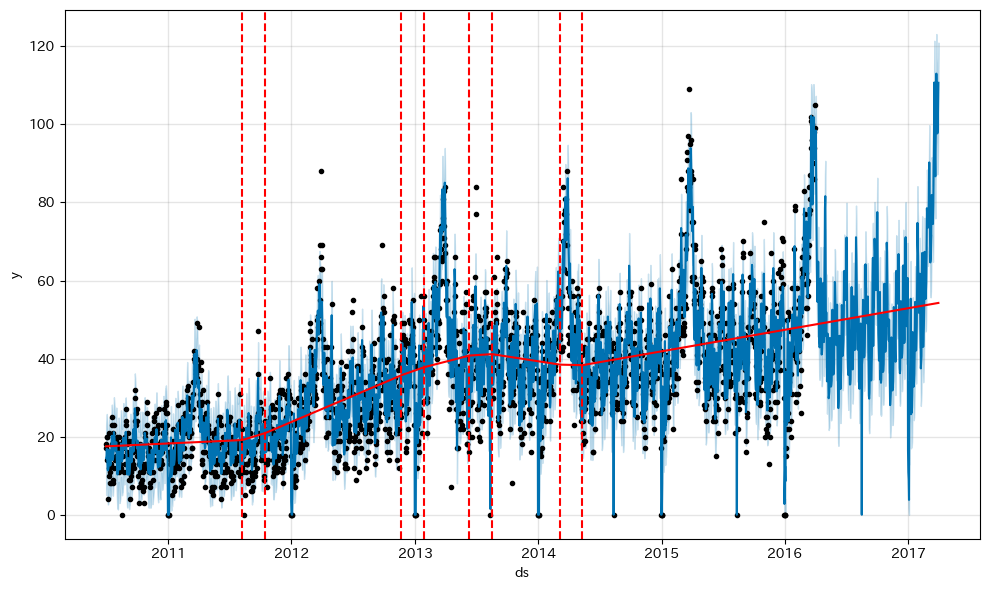

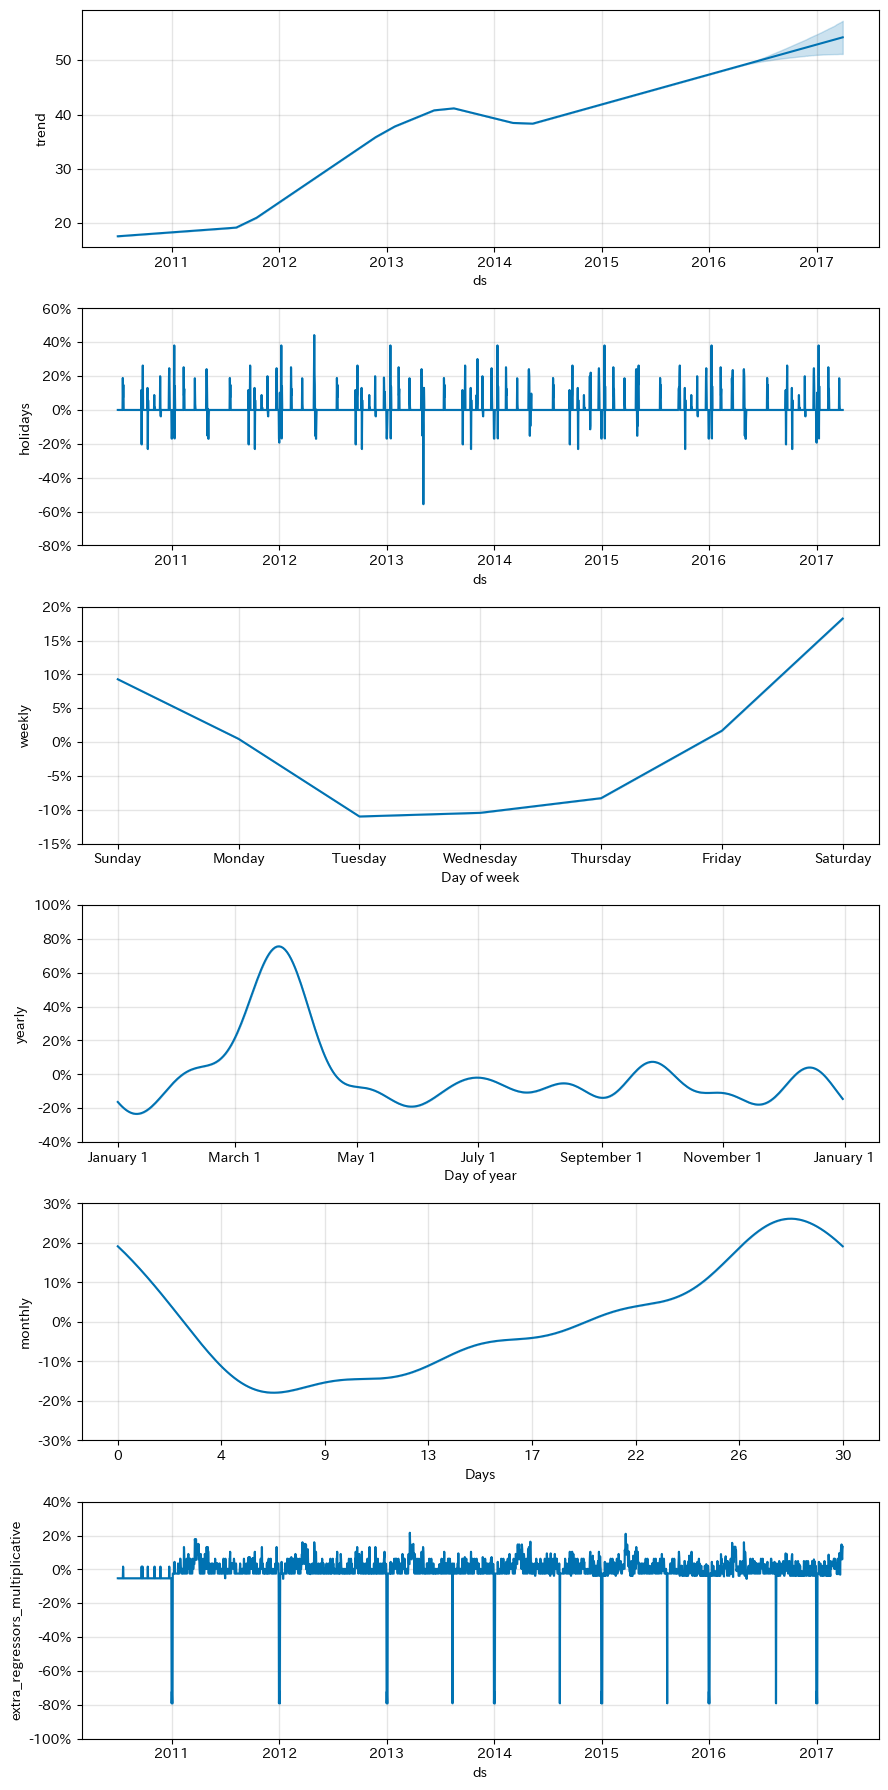

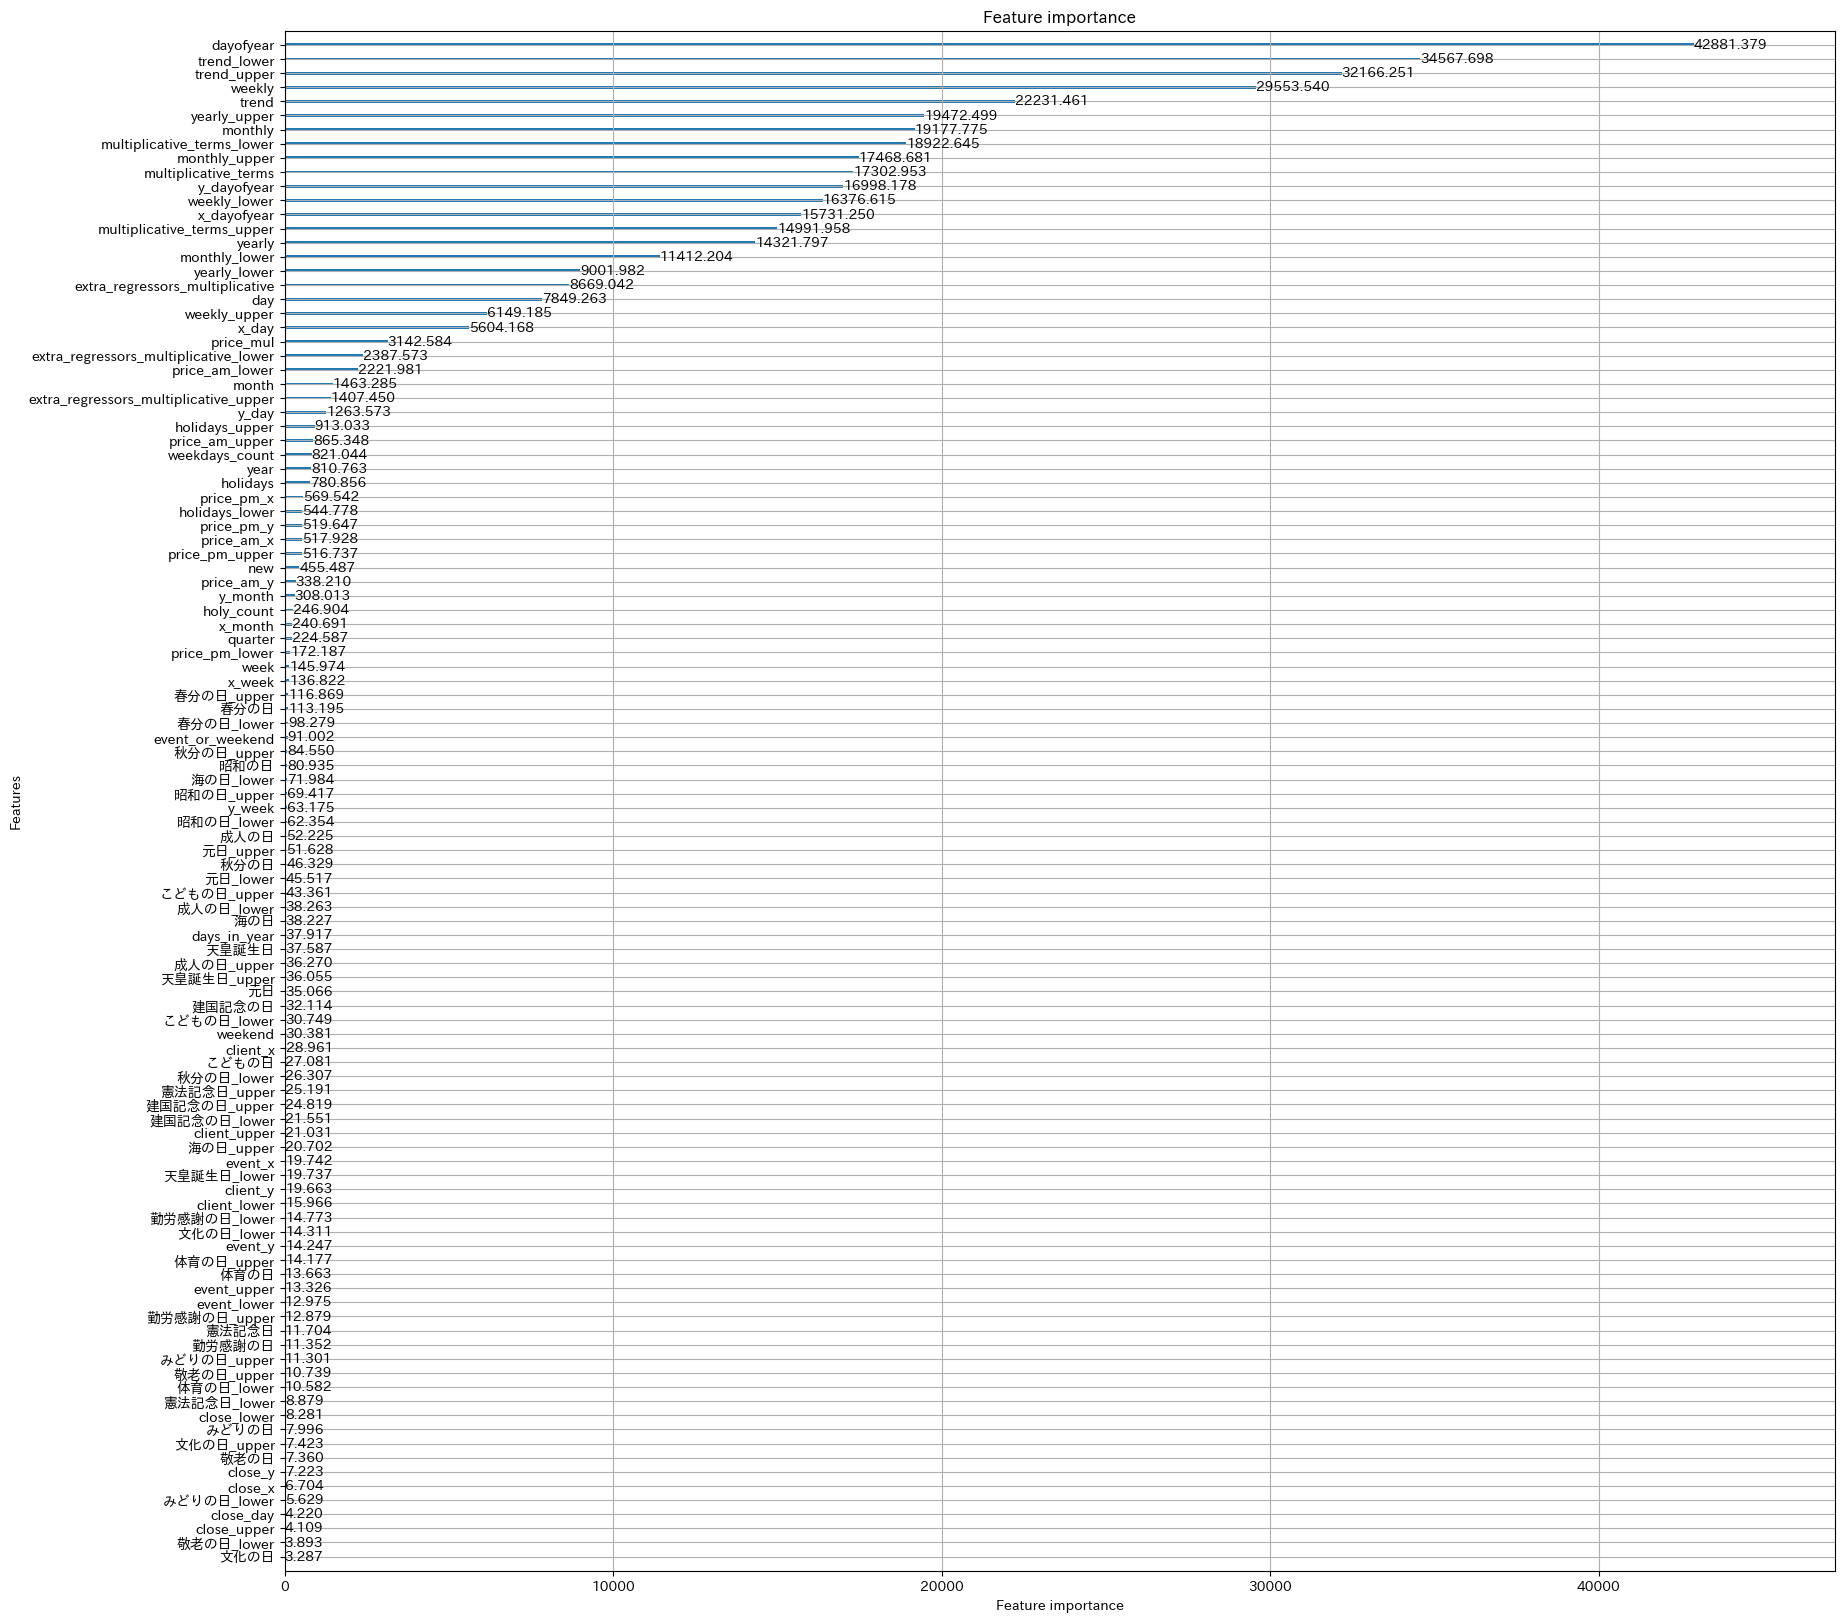

            ds  client_x  close_x  price_am_x  price_pm_x  event_x  year  \
351 2011-06-17         0        0           1           1        0  2011   
352 2011-06-18         0        0           2           2        0  2011   
353 2011-06-19         0        0           2           2        0  2011   
354 2011-06-20         0        0           1           1        0  2011   
355 2011-06-21         0        0           1           1        0  2011   

     month  day  quarter  ...  海の日_upper  秋分の日  秋分の日_lower  秋分の日_upper  \
351      6   17        2  ...        0.0   0.0         0.0         0.0   
352      6   18        2  ...        0.0   0.0         0.0         0.0   
353      6   19        2  ...        0.0   0.0         0.0         0.0   
354      6   20        2  ...        0.0   0.0         0.0         0.0   
355      6   21        2  ...        0.0   0.0         0.0         0.0   

     additive_terms  additive_terms_lower  additive_terms_upper  close_day  \
351             0.0 

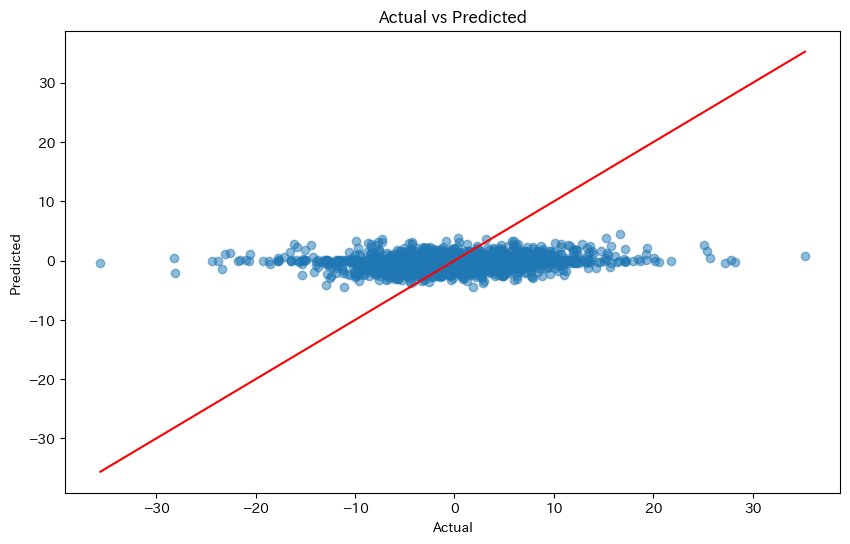

             ds  client_x  close_x  price_am_x  price_pm_x  event_x  year  \
1368 2014-03-30         0        0           6           6        0  2014   
635  2012-03-27         0        0           4           3        0  2012   
1367 2014-03-29         0        0           6           6        0  2014   
1722 2015-03-19         0        0           2           2        0  2015   
1720 2015-03-17         0        0           2           2        0  2015   
1727 2015-03-24         0        0           6           3        0  2015   
1021 2013-04-17         0        0           1           1        0  2013   
816  2012-09-24         0        0           2           1        0  2012   
1963 2015-11-15         1        0           1           1        0  2015   
1370 2014-04-01         0        0           5           5        0  2014   

      month  day  quarter  ...  秋分の日  秋分の日_lower  秋分の日_upper  additive_terms  \
1368      3   30        1  ...   0.0         0.0         0.0            

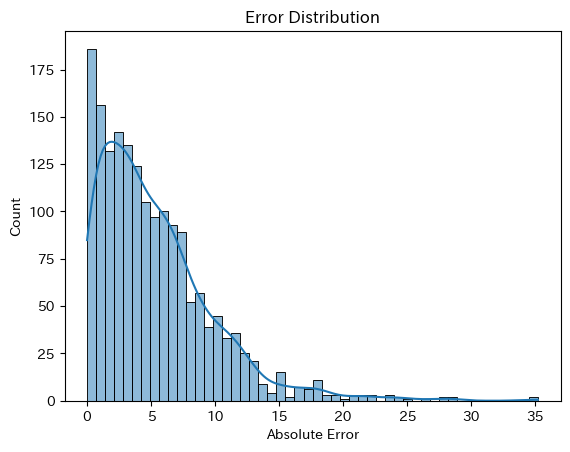

        client_x  close_x  price_am_x  price_pm_x    event_x         year  \
count  88.000000     88.0   88.000000   88.000000  88.000000    88.000000   
mean    0.204545      0.0    2.284091    2.147727   0.056818  2014.034091   
std     0.405681      0.0    1.461765    1.426673   0.232822     1.290539   
min     0.000000      0.0    1.000000    1.000000   0.000000  2011.000000   
25%     0.000000      0.0    1.000000    1.000000   0.000000  2013.000000   
50%     0.000000      0.0    2.000000    2.000000   0.000000  2014.000000   
75%     0.000000      0.0    3.000000    3.000000   0.000000  2015.000000   
max     1.000000      0.0    6.000000    6.000000   1.000000  2016.000000   

           month        day    quarter       week  ...  秋分の日  秋分の日_lower  \
count  88.000000  88.000000  88.000000  88.000000  ...  88.0        88.0   
mean    6.545455  17.829545   2.431818   4.147727  ...   0.0         0.0   
std     3.853373  10.025510   1.257579   2.014544  ...   0.0         0.0   
mi

In [16]:
ensemble_class=Ensemble(df_train,df_test)
ensemble_class.process_data_prophet()
ensemble_class.process_data_lightgbm()
ensemble_class.prophet_()
ensemble_class.trend_adjusted2()
tree,prp,df_train_tree,df_test_tree,df_all_tree=ensemble_class.features_for_ensemble_data()
#df_ensamble=ensemble_class.lightgbm_prophet()
df_,lightgbm_model,df_1217,oof_df=ensemble_class.lightgbm_prophet2()
#importance = lightgbm_model.feature_importances_
# 特徴量名と重要度をデータフレームにまとめる
#importance_df = pandas.DataFrame({"feature_name": lightgbm_model.feature_name_, "importance": importance})
# 重要度の昇順でソートする
#importance_df = importance_df.sort_values("importance", ascending=True)

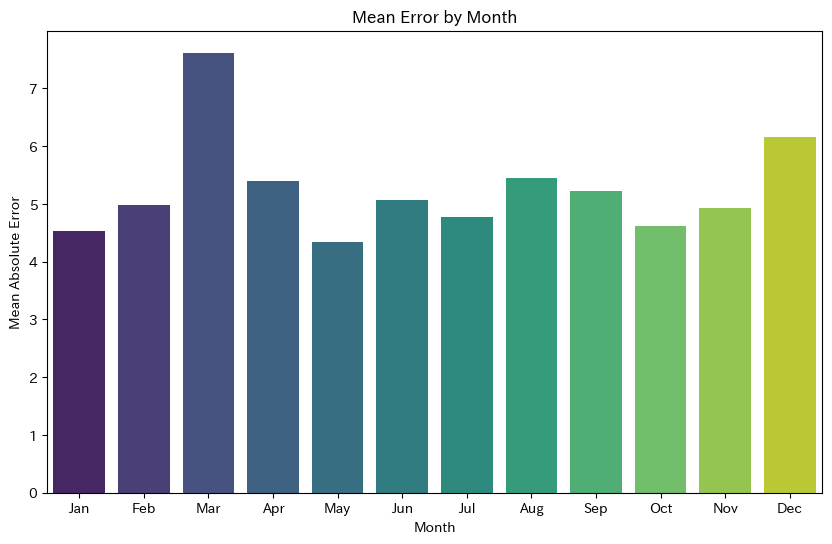

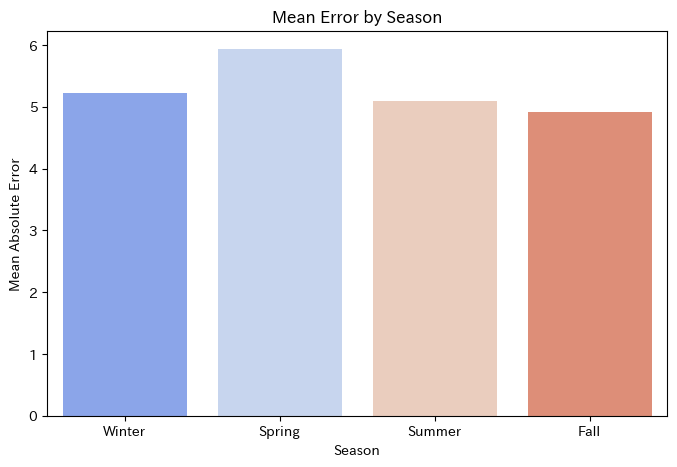

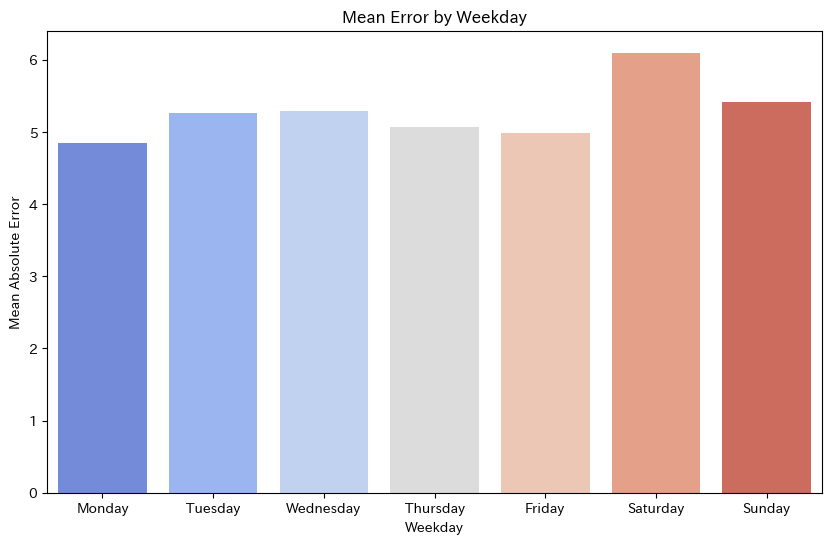

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# dsカラムから月を抽出
oof_df['month'] = pd.to_datetime(oof_df['ds']).dt.month

# 月ごとの誤差の平均を計算
monthly_error = oof_df.groupby('month')['error'].mean().reset_index()

# 可視化（棒グラフ）
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='error', data=monthly_error, palette='viridis')
plt.title('Mean Error by Month')
plt.xlabel('Month')
plt.ylabel('Mean Absolute Error')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

#----------------------------------------------------------------
# dsカラムから季節を抽出
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

oof_df['season'] = oof_df['month'].apply(get_season)

# 季節ごとの誤差の平均を計算
seasonal_error = oof_df.groupby('season')['error'].mean().reset_index()

# 可視化（棒グラフ）
plt.figure(figsize=(8, 5))
sns.barplot(x='season', y='error', data=seasonal_error, order=['Winter', 'Spring', 'Summer', 'Fall'], palette='coolwarm')
plt.title('Mean Error by Season')
plt.xlabel('Season')
plt.ylabel('Mean Absolute Error')
plt.show()

#----------------------------------------------------------------
# 曜日の抽出（0: 月曜日, ..., 6: 日曜日）
oof_df['weekday'] = pd.to_datetime(oof_df['ds']).dt.weekday

# 曜日ごとの誤差の平均を計算
weekday_error = oof_df.groupby('weekday')['error'].mean().reset_index()

# 曜日名に変換
weekday_error['weekday_name'] = weekday_error['weekday'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 
    3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

# 可視化（棒グラフ）
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='weekday_name', y='error', data=weekday_error, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
], palette='coolwarm')
plt.title('Mean Error by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Mean Absolute Error')
plt.show()



In [18]:
#graph=CompareCharts(df_compare)
#graph.compare_graph()

In [19]:
df_test_prophet=df_test.copy()
df_test_lightgbm=df_test.copy()
df_test_catboost=df_test.copy()

df_test_lightgbm=df_test_lightgbm.rename(columns={"datetime":"ds","y":"y"})
df_test_catboost=df_test_catboost.rename(columns={"datetime":"ds","y":"y"})

now_str=submisson_datetime()
#df_my_submisson_prophet=df_result[["ds","yhat"]]
#df_my_submisson_prophet["y"]=numpy.exp(df_my_submisson_prophet["y"])-1
#df_my_submisson_prophet=df_my_submisson_prophet.query("ds>='2016-04-01'")
#df_my_submisson_prophet["ds"]=df_my_submisson_prophet["ds"].apply(lambda x:x.strftime('%Y-%m-%d'))
#df_my_submisson_prophet.to_csv(rf"C:\Users\yuto2\OneDrive\ドキュメント\Pythonフォルダ\Signate\アップル 引越し需要予測\output\prophet_test{now_str}.csv",index=False,header=False)


#df_my_submisson_neuralprophet=df_result[["ds","yhat1"]]
#df_my_submisson_neuralprophet=df_my_submisson_neuralprophet.query("ds>='2016-04-01'")
#df_my_submisson_neuralprophet["ds"]=df_my_submisson_neuralprophet["ds"].apply(lambda x:x.strftime('%Y-%m-%d'))
#df_my_submisson_neuralprophet.to_csv(rf"C:\Users\yuto2\OneDrive\ドキュメント\Pythonフォルダ\Signate\アップル 引越し需要予測\output\neuralprophet_test{now_str}.csv",index=False,header=False)

#df_my_submisson_greykite=df_result[["ts","forecast"]]
#df_my_submisson_greykite=df_my_submisson_greykite.query("ts>='2016-04-01'")
#df_my_submisson_greykite["ts"]=df_my_submisson_greykite["ts"].apply(lambda x:x.strftime('%Y-%m-%d'))
#df_my_submisson_greykite=df_my_submisson_greykite.rename(columns={"ts":"ds","forecast":"y"})
#df_my_submisson_greykite.to_csv(rf"C:\Users\yuto2\OneDrive\ドキュメント\Pythonフォルダ\Signate\アップル 引越し需要予測\output\greykite_test{now_str}.csv",index=False,header=False)


##df_test_lightgbm_ds=df_test_tree["ds"]
#df_test_lightgbm=df_test_tree.drop(["ds","y"],axis=1)#1で使用
##df_test_lightgbm=df_test_tree.drop(["ds"],axis=1)#3,4で使用
##df_test_lightgbm["y"]=lightgbm_model.predict(df_test_lightgbm)
#df_test_lightgbm["y"]=numpy.exp(df_test_lightgbm["y"])-1
##df_test_lightgbm=pandas.concat([df_test_lightgbm_ds,df_test_lightgbm],axis=1)
##df_test_lightgbm=lower_limit_value(df_test_lightgbm)
#df_test_lightgbm=close_limit_value(df_test_lightgbm)
##df_test_lightgbm["y"]=df_test_lightgbm["y"].where(df_test_lightgbm["close_day"]!=1,0)
#df_my_submisson_lightgbm=df_test_lightgbm[["ds","y"]]
#df_my_submisson_lightgbm.to_csv(rf"C:\Users\yuto2\OneDrive\ドキュメント\Pythonフォルダ\Signate\アップル 引越し需要予測\output\test_lightgbm{now_str}.csv",index=False,header=False)

##df_test_catboost_ds=df_test_tree["ds"]
#df_test_catboost=df_test_catboost.drop(["ds","y"],axis=1)
##df_test_catboost=df_test_tree.drop(["ds"],axis=1)
##df_test_catboost["y"]=catboost_model.predict(df_test_catboost)
##print(df_test_catboost)
##df_test_catboost=pandas.concat([df_test_catboost_ds,df_test_catboost],axis=1)
##print(df_test_catboost)
##df_my_submisson_catboost=df_test_catboost[["ds","y"]]
##print(df_my_submisson_catboost)
##df_my_submisson_catboost.to_csv(rf"C:\Users\yuto2\OneDrive\ドキュメント\Pythonフォルダ\Signate\アップル 引越し需要予測\output\test_catboost{now_str}.csv",index=False,header=False)

#アンサンブル用
###df_test_lightgbm_ds=df_test_tree["ds"]
#df_test_lightgbm=df_test_tree.drop(["ds","y"],axis=1)#1で使用

df_test_lightgbm=lower_limit_value_cn(df_,"y_pred")
#df_test_lightgbm=close_limit_value(df_test_lightgbm)
df_test_lightgbm["y_pred"]=df_test_lightgbm["y_pred"].where(df_test_lightgbm["close_day"]!=1,0)
df_my_submisson_lightgbm=df_test_lightgbm[["ds","y_pred"]]
df_my_submisson_lightgbm["ds"]=df_my_submisson_lightgbm["ds"].apply(lambda x:x.strftime('%Y-%m-%d'))
df_my_submisson_lightgbm.to_csv(rf"/content/drive/MyDrive/portfolio/Signate/引越し需要予測/output/test_ensemble{now_str}.csv",index=False,header=False)

C:\Users\yuto2\AppData\Local\Temp\ipykernel_39148\2381997012.py:59: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



OSError: Cannot save file into a non-existent directory: '\content\drive\MyDrive\portfolio\Signate\引越し需要予測\output'

In [18]:
#任意の予測結果を呼び出す
header_names=["ds","y"]
df_prophet_limit20240220_130045=pandas.read_csv(r"/content/drive/MyDrive/portfolio/Signate/引越し需要予測/output/test_prophet_limit20240220_130045.csv",header=None,names=header_names)
df_prophet_limit20240220_130045=pandas.concat([df_test,df_prophet_limit20240220_130045],axis=1)
df_prophet_limit20240220_130045.drop("datetime",axis=1)
df_prophet_limit20240220_130045["ds"]=pandas.to_datetime(df_prophet_limit20240220_130045["ds"],format="%Y-%m-%d")

df_test_ensemble20240302_133152=pandas.read_csv(r"/content/drive/MyDrive/portfolio/Signate/引越し需要予測/output/test_ensemble20240302_133152.csv",header=None,names=header_names)
df_test_ensemble20240302_133152=pandas.concat([df_test,df_test_ensemble20240302_133152],axis=1)
df_test_ensemble20240302_133152.drop("datetime",axis=1)
df_test_ensemble20240302_133152["ds"]=pandas.to_datetime(df_test_ensemble20240302_133152["ds"],format="%Y-%m-%d")
#df_prophet_test20240129_152223=close_limit_value(df_prophet_test20240129_152223)
#df_limit_=df_prophet_test20240129_152223[["ds","y"]]
#df_limit_.to_csv(rf"C:\Users\yuto2\OneDrive\ドキュメント\Pythonフォルダ\Signate\アップル 引越し需要予測\output\test_prophet_limit{now_str}.csv",index=False,header=False)

In [19]:
#graph_pred_limit20240220_13004=CompareCharts(df_prophet_limit20240220_130045)
#graph_pred_limit20240220_13004.compare_graph()
#check_dataframe_elements(df_prophet_limit20240220_130045)

In [20]:
#LightGBMを比較できる形に整形
##df_my_submisson_=df_my_submisson_lightgbm
#df_my_submisson_=df_my_submisson_.rename(columns={"y":"y_pred"})
##df_my_submisson_["ds"]=pandas.to_datetime(df_my_submisson_["ds"],format="%Y-%m-%d")
##df_my_submisson_compare=pandas.merge(df_test_ensemble20240302_133152,df_my_submisson_,on="ds")

#Catboostを比較できる形に整形
#df_my_submisson_=df_my_submisson_catboost
#df_my_submisson_=df_my_submisson_.rename(columns={"y":"y_pred"})
#df_my_submisson_compare=pandas.merge(df_prophet_limit20240220_130045,df_my_submisson_,on="ds")


#Greykiteを比較できる形に整形
#df_my_submisson_=df_my_submisson_greykite
#df_my_submisson_=df_my_submisson_.rename(columns={"y":"y_pred"})
#check_dataframe_elements(df_my_submisson_)
#df_my_submisson_["ds"]=pandas.to_datetime(df_my_submisson_["ds"],format="%Y-%m-%d")
#df_my_submisson_compare=pandas.merge(df_prophet_limit20240220_130045,df_my_submisson_,on="ds")

#Prophetを比較できる形に整形
#df_test_copy=df_test_
#df_test_copy=df_test_copy.drop("y",axis=1)
df_my_submisson_=df_my_submisson_lightgbm
df_my_submisson_=df_my_submisson_.rename(columns={"yhat":"y_pred"})
df_my_submisson_["ds"]=pandas.to_datetime(df_my_submisson_["ds"],format="%Y-%m-%d")
df_my_submisson_compare=pandas.merge(df_prophet_limit20240220_130045,df_my_submisson_,on="ds")

In [21]:
#学習データを比較できる形に整形
#df_past=df_train
#df_past=df_past.rename(columns={"datetime":"ds","y":"y"})
#df_past["ds"]=pandas.to_datetime(df_past["ds"],format="%Y-%m-%d")
#df_past=df_past.query('ds >= "2015-04-01" and ds <= "2016-03-31"')

### ここから先は実測や予測の比較

In [ ]:
graph_compare=CompareCharts(df_my_submisson_compare)
graph_compare.compare_graph()